# Proyecto Mucosimbandes
Hoja de exploración

## Importar recursos y configurar directorios

In [1]:
import music21
import sys
import os
import numpy as np
from IPython.display import Image, Audio
import pandas as pd
os.path.supports_unicode_filenames

True

In [3]:
#import path # to change the jupyter notebook working directory
sys.path.insert(0, 'C:\\Users\\ferna\\Documents\\Desarrollo\\Python\\melodic-similarity\\src')
#from mtc_to_seqs import *
#Configurar rutas de music21
us = music21.environment.UserSettings()
# get environment
env = music21.environment.Environment()

# check the path
print('Environment settings:')
print('musicXML:  ', env['musicxmlPath'])
print('musescore: ', env['musescoreDirectPNGPath'])
os.path.exists(env['musescoreDirectPNGPath'])

# set path if necessary
env['directoryScratch'] = r'C:\tmp' 
# env['musicxmlPath'] = 'path/to/your/musicXmlApplication'
# env['musescoreDirectPNGPath'] = 'path/to/your/museScore'
us['musescoreDirectPNGPath'] = r'C:\Program Files\MuseScore 3\bin\MuseScore3.exe' 
#us['musicxmlPath'] = r'C:\Program Files\MuseScore 3\bin\MuseScore3.exe'
us['localCorpusPath'] = r'G:\Unidades compartidas\MUCOSIMBANDES\Corpus\Archivos MusicXML'

#Configurar directorio de trabajo
dataDirectory = 'G:/Unidades compartidas/MUCOSIMBANDES/Corpus/'
#Imprimir listado de archivos
dir=sorted(os.listdir(dataDirectory))
print(len(dir), " archivos")
print(dir)

Environment settings:
musicXML:   C:\Program Files\MuseScore 4\bin\MuseScore4.exe
musescore:  C:\Program Files\MuseScore 3\bin\MuseScore3.exe
5  archivos
['Archivos MusicXML', 'Archivos en software de notación', 'Corpus.gsheet', 'Documentos de análisis de patrones', 'Textos originales']


## Crear dataframes

In [4]:
#Simply change de URL from Google Drive using uc?id=, and then pass it to the read_csv function. In this example:
sheet_url = 'https://docs.google.com/spreadsheets/d/1xBZdHDgRIFzIPSxU4yeLvYYvHZ75DxBg3sYRAks1y5g/edit#gid=0'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
dfCorpus = pd.read_csv(csv_export_url)
df_obj = dfCorpus.select_dtypes(['object'])
dfCorpus[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
dfCorpus=dfCorpus.drop(['Patrones', 'Digitador','MODA', 'Observaciones','Fuente (APA)'], axis=1)
dfCorpus.sample(5)

Título   SS   Género Tonalidad        Compositor  Período  \
8                 Colón  NaN  Pasillo         E  Carlos Escamilla        1   
66               El Ney  NaN  Bambuco        Am    Antonio Lozano        1   
95  Fiesta en Sutatenza  NaN  Bambuco        Em     Jorge Mendoza        2   
88       La gata golosa  NaN  Pasillo         G  Fulgencio García        1   
69          Ojo al toro  NaN  Bambuco        Em  Cantalicio Rojas        1   

   Fecha de composición  
8                   NaN  
66                  NaN  
95                  NaN  
88          1880 - 1945  
69                  NaN

In [6]:
#Simply change de URL from Google Drive using uc?id=, and then pass it to the read_csv function. In this example:
sheet_url = 'https://docs.google.com/spreadsheets/d/1xBZdHDgRIFzIPSxU4yeLvYYvHZ75DxBg3sYRAks1y5g/edit#gid=831749707'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
dfValoracion = pd.read_csv(csv_export_url)
df_obj = dfValoracion.select_dtypes(['object'])
dfValoracion[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
#dfCorpus=dfCorpus.drop(['SS', 'Patrones', 'Digitador','MODA', 'Observaciones','Fuente (APA)'], axis=1)
dfValoracion.sample(5)

Título  ARMONÍA  FORMA  TEXTURA  FORMAS MELÓDICAS  \
95          Pasillo      1.0    1.0      1.0               1.0   
5          Ancestro      3.0    2.0      1.0               2.0   
68    Fita chiquita      1.0    1.0      1.0               2.0   
96       Pasillo Cm      3.0    3.0      1.0               3.0   
0   A pesar de Todo      2.0    2.0      3.0               3.0   

    CONSONANCIA Y DISONANCIA  ESTRUCTURA RÍTMICA  CRONOLOGÍA  CONTEXTO  \
95                       1.0                 1.0         1.0       1.0   
5                        3.0                 2.0         2.0       3.0   
68                       1.0                 2.0         2.0       2.0   
96                       3.0                 3.0         3.0       3.0   
0                        3.0                 2.0         3.0       3.0   

    SONORIDAD  MODA  
95        1.0   1.0  
5         3.0   3.0  
68        2.0   2.0  
96        3.0   3.0  
0         3.0   3.0

In [7]:
# Restablecer los valores de índice a la segunda __DataFrame__ adjunta correctamente
dfCorpus=dfCorpus.reset_index(drop=True)
#Incluir los que no están en una de los dos datasets ,how = 'outer'
merged_inner = pd.merge(left=dfCorpus,right=dfValoracion, left_on='Título', right_on='Título')
merged_inner.sample(5)
#merged_inner.describe()

Título   SS   Género Tonalidad                    Compositor  \
11      Ricitos de Oro  NaN  Pasillo        Am                 Emilio Sierra   
107          Bandolita  NaN  Pasillo         D              Luis Uribe Bueno   
7                Colón  NaN  Pasillo         E              Carlos Escamilla   
40   Por qué te fuiste  NaN  Pasillo        Dm                  Rosita Rocha   
39        Pasillo Rojo  NaN  Pasillo         G  Pedro Pablo Santamaría Vasco   

     Período Fecha de composición  ARMONÍA  FORMA  TEXTURA  FORMAS MELÓDICAS  \
11         2                  NaN      1.0    1.0      1.0               1.0   
107        2                  NaN      2.0    2.0      1.0               2.0   
7          1                  NaN      2.0    2.0      1.0               2.0   
40         1                  NaN      2.0    2.0      2.0               2.0   
39         2                  NaN      1.0    1.0      1.0               1.0   

     CONSONANCIA Y DISONANCIA  ESTRUCTURA RÍTMICA  CRONOLOGÍA  CONTEXTO  \
11                        1.0                 1.0         2.0       2.0   
107                       2.0                 2.0         2.0       2.0   
7                         1.0                 1.0         1.0       1.0   
40                        2.0                 2.0         2.0       2.0   
39                        1.0                 1.0         2.0       2.0   

     SONORIDAD  MODA  
11         2.0   1.0  
107        3.0   2.0  
7          1.0   1.0  
40         2.0   2.0  
39         2.0   1.0

In [7]:
#Eliminar columnas
merged_inner=merged_inner.drop(['Fecha de composición'], axis=1)

In [8]:
#Filtros
#Recordar que cada condición va entre paréntesis
#merged_inner[(merged_inner['Compositor'].str.contains('Bueno', case=False)) & (merged_inner['Género'].str.contains('pasillo', case=False))]
#merged_inner[merged_inner['Período'] == 2]
#merged_inner[(merged_inner['Período'] == 3)&(merged_inner['ARMONÍA']==3)]
merged_inner[(merged_inner['SS'] =='x')]


Título SS   Género Tonalidad                  Compositor  Período  \
18          Enigma  x  Bambuco        Am         Hector Fabio Torres        3   
54        Minimito  x  Bambuco        Eb  Germán Darío Pérez Salazar        3   
55  Toña la blanca  x  Pasillo        Bb  Germán Darío Pérez Salazar        3   
70     Estudio N.1  x  Pasillo        Cm               Diego Caicedo        3   
94          Michín  x  Pasillo         D             José A. Morales        2   

    ARMONÍA  FORMA  TEXTURA  FORMAS MELÓDICAS  CONSONANCIA Y DISONANCIA  \
18      3.0    3.0      3.0               3.0                       3.0   
54      2.0    2.0      1.0               2.0                       2.0   
55      NaN    NaN      NaN               NaN                       NaN   
70      3.0    3.0      3.0               3.0                       3.0   
94      2.0    1.0      1.0               2.0                       2.0   

    ESTRUCTURA RÍTMICA  CRONOLOGÍA  CONTEXTO  SONORIDAD  MODA  
18                 3.0         3.0       3.0        3.0   3.0  
54                 2.0         2.0       2.0        2.0   2.0  
55                 NaN         NaN       NaN        NaN   NaN  
70                 3.0         3.0       3.0        3.0   3.0  
94                 2.0         2.0       2.0        2.0   2.0

In [9]:
# Function to convert  
def listToString(s): 
    
    # initialize an empty string
    str1 = "" 
    
    # traverse in the string  
    for ele in s: 
        str1 += str(ele)+"," 
    
    # return string  
    return str1 

In [10]:
#Función para calcular las features e incluirlas en el DataFrame
def calcular_features( titulo,df):
    f = music21.corpus.getWork(titulo)
    s=parseMelody(f)
    i=df.index[(df['Título'] == titulo)]

    pitch=m21TOMidiPitch(s)
    newDf=merged_inner.assign(Pitch=np.nan)
    newDf.at[i[0], 'Pitch'] = listToString(pitch)

    melodicContour=midipitch2contour3(pitch, undef='=')
    newDf=newDf.assign(melodicContour=np.nan)
    newDf.at[i[0], 'melodicContour'] = listToString(melodicContour)

    scaleDegrees=m21TOscaledegrees(s)
    newDf=newDf.assign(Degrees=np.nan)
    newDf.at[i[0], 'Degrees'] = listToString(scaleDegrees)

    duration= m21TODurations(s)
    newDf=newDf.assign(Duraciones=np.nan)
    newDf.at[i[0], 'Duraciones'] = listToString(duration)
    return newDf

In [58]:
df=calcular_features('A un ancestro',merged_inner)
df2=df[df['Título'].str.contains('A un ancestro', case=False)]
pd.options.display.max_colwidth = 200
df2[["Título", "melodicContour","Pitch","Degrees","Duraciones"]]

Título  \
56  A un ancestro   

                                                                                                                                                                                             melodicContour  \
56  =,+,+,-,-,+,-,+,+,-,-,-,-,-,+,+,+,+,+,+,-,-,+,-,+,+,=,-,-,+,+,+,-,+,-,-,-,+,-,+,+,-,+,-,+,+,+,+,=,-,+,+,+,+,-,+,=,=,=,+,=,=,-,+,=,=,=,-,+,-,-,+,-,+,+,+,+,+,-,+,-,+,-,-,+,+,-,+,+,+,+,+,-,+,=,-,+,+,...   

                                                                                                                                                                                                      Pitch  \
56  71,74,76,71,67,69,67,69,71,69,67,66,64,63,64,66,67,71,74,76,71,67,69,67,69,71,71,70,69,75,79,81,78,79,76,74,71,72,64,66,71,67,69,67,69,71,74,76,76,69,71,72,76,79,74,76,76,76,76,77,77,77,71,76,76,7...   

                                                                                                                                                                                                    Degrees  \
56  5,7,1,5,3,4,3,4,5,4,3,2,1,7,1,2,3,5,7,1,5,3,4,3,4,5,5,5,4,7,3,4,2,3,1,7,5,6,1,2,5,3,4,3,4,5,7,1,1,4,5,6,1,2,7,1,1,1,1,2,2,2,5,1,1,1,1,5,2,1,6,3,4,5,6,6,7,1,5,2,1,4,2,4,5,2,4,5,6,6,7,1,7,1,1,5,1,5,...   

                                                                                                                                                                                                 Duraciones  
56  Eighth,Dotted Quarter,Dotted Quarter,Half,16th,16th,16th,16th,Half,16th,16th,16th,16th,Half,16th,16th,16th,16th,Dotted Quarter,Dotted Quarter,Half,16th,16th,16th,16th,Dotted Half,16th,16th,Eighth,...

In [11]:
merged_inner= merged_inner[merged_inner['SS'] != "x"]
merged_inner

Título   SS   Género Tonalidad  \
0                     Bambuco  NaN  Bambuco        Am   
1                  Pasillo Cm  NaN  Pasillo        Cm   
2                   Pasillo D  NaN  Pasillo         D   
3    Pasillo in Moto Perpetuo  NaN  Pasillo         F   
4                       Dical  NaN  Bambuco        Am   
..                        ...  ...      ...       ...   
121                  Sueñitos  NaN  Bambuco         D   
122        Que lo toque Nacho  NaN  Bambuco         C   
123                Pasillisco  NaN  Pasillo         D   
124            Aroma de cielo  NaN  Bambuco         D   
125          Gelica y Peranza  NaN  Bambuco        Em   

                   Compositor  Período  ARMONÍA  FORMA  TEXTURA  \
0                Adolfo Mejía        1      1.0    2.0      1.0   
1                Adolfo Mejía        1      3.0    3.0      1.0   
2                Adolfo Mejía        1      1.0    1.0      1.0   
3    Alfonso Garavito Wheeler        1      1.0    1.0      1.0   
4               Alvaro Romero        2      1.0    2.0      1.0   
..                        ...      ...      ...    ...      ...   
121        Pedro Nel Martínez        2      1.0    1.0      1.0   
122   Rubén Darío Gómez Prada        3      3.0    3.0      1.0   
123       Samuel Ibarra Conde        3      3.0    3.0      2.0   
124     Yeison Bedoya Álvarez        3      3.0    3.0      1.0   
125     Yeison Bedoya Álvarez        3      3.0    2.0      1.0   

     FORMAS MELÓDICAS  CONSONANCIA Y DISONANCIA  ESTRUCTURA RÍTMICA  \
0                 1.0                       1.0                 1.0   
1                 3.0                       3.0                 3.0   
2                 1.0                       1.0                 1.0   
3                 2.0                       2.0                 2.0   
4                 2.0                       1.0                 2.0   
..                ...                       ...                 ...   
121               1.0                       2.0                 2.0   
122               3.0                       3.0                 3.0   
123               3.0                       3.0                 3.0   
124               3.0                       3.0                 2.0   
125               3.0                       3.0                 3.0   

     CRONOLOGÍA  CONTEXTO  SONORIDAD  MODA  
0           1.0       1.0        1.0   1.0  
1           3.0       3.0        3.0   3.0  
2           1.0       1.0        1.0   1.0  
3           2.0       2.0        2.0   2.0  
4           2.0       2.0        2.0   2.0  
..          ...       ...        ...   ...  
121         2.0       2.0        2.0   2.0  
122         3.0       3.0        3.0   3.0  
123         3.0       3.0        3.0   3.0  
124         3.0       3.0        3.0   3.0  
125         3.0       3.0        3.0   3.0  

[121 rows x 16 columns]

In [12]:
dir=dir[0:20]
merged_inner.assign(Pitch=np.nan)
merged_inner.assign(features="")
correctas=0
incorrectas=0
errores=[]
#for i in range(0,10):
for i in merged_inner.index: 
    song=merged_inner["Título"][i]
    index=merged_inner.index[(merged_inner['Título'] == song)]
    song=merged_inner["Género"][i]+"s/"+merged_inner["Título"][i]
    #print(song)
    try:
        a = music21.corpus.getWork(song)
        s=parseMelody(a)
        try:
            pitch=m21TOMidiPitch(s)
            melodicContour=midipitch2contour3(pitch, undef='=')
            #merged_inner.at[index[0], 'features'] = listToString(pitch)
            merged_inner.at[index[0], 'features'] ='{"pitch":['+listToString(pitch)+']}'
        except Exception as e:
            exc_type, exc_value, exc_traceback = sys.exc_info()
            print(song)
            print(exc_value)
        correctas=correctas+1
    except:
        incorrectas=incorrectas+1
        errores.append(song)
        continue
print(correctas, " correctas")
print(incorrectas, " incorrectas")
print(errores)

119  correctas
2  incorrectas
['Bambucos/Bochica', 'Pasillos/Rocío']


In [13]:
import traceback
correctas=0
incorrectas=0
dfExc = pd.DataFrame(columns=['Exception'])
for i in errores:
    try:
        a = music21.corpus.getWork(i)
        #f=music21.converter.parse(a)
        s=parseMelody(a)
        correctas=correctas+1
        print(i)
    #f.show()
    except Exception as e:
        exc_type, exc_value, exc_traceback = sys.exc_info()
        #print(exc_value)
        dfExc.loc[i]=[exc_value]
        incorrectas=incorrectas+1
print(correctas, " correctas")
print(incorrectas, " incorrectas")
dfExc

0  correctas
2  incorrectas


Exception
Bambucos/Bochica  list index out of range
Pasillos/Rocío    list index out of range

In [14]:
#pd.options.display.max_colwidth
pd.options.display.max_colwidth = 200
merged_inner[["Título", "features"]].head(5)

Título  \
0                   Bambuco   
1                Pasillo Cm   
2                 Pasillo D   
3  Pasillo in Moto Perpetuo   
4                     Dical   

                                                                                                                                                                                                  features  
0  {"pitch":[76,76,72,74,76,76,77,74,76,72,74,76,76,77,76,74,72,74,74,74,72,71,69,68,71,69,59,60,64,67,71,76,72,74,76,76,77,74,76,72,74,76,76,72,72,71,69,71,72,71,69,71,71,69,68,69,71,69,68,64,71,76,...  
1  {"pitch":[70,72,70,65,68,67,62,65,63,62,60,65,72,74,72,67,70,68,64,67,65,62,70,70,72,70,65,68,67,68,67,71,74,77,75,72,75,74,72,70,75,67,68,67,65,63,63,70,63,72,67,65,63,60,63,60,63,65,67,73,67,65,...  
2  {"pitch":[74,76,78,81,83,85,83,85,86,85,88,86,83,79,78,76,79,81,83,73,74,76,78,79,81,85,83,81,78,74,71,69,74,76,78,81,83,85,83,85,86,85,88,86,83,79,78,76,79,81,83,73,74,76,78,74,74,74,57,61,65,69,...  
3  {"pitch":[76,74,73,74,76,74,73,74,76,74,73,74,76,74,73,74,76,74,72,71,70,71,72,71,74,72,71,72,74,72,71,69,68,69,71,69,67,66,65,66,67,66,66,64,63,64,66,64,64,62,61,62,64,62,64,68,69,72,74,74,67,62,...  
4  {"pitch":[75,76,72,69,73,74,71,67,71,72,69,65,74,76,68,75,76,81,81,73,74,79,79,71,72,77,77,79,77,76,75,76,72,69,64,75,76,72,69,75,76,81,76,72,74,69,72,71,73,74,71,68,64,63,64,65,64,63,64,68,71,74,...

In [15]:
import io
with io.open('prueba3.jsonl','w',encoding='utf-8') as f:
    f.write(merged_inner.to_json(orient="records", lines=True, force_ascii=False))

Midi note numbers

In [16]:
midiPitch=m21TOMidiPitch(s)
print(midiPitch)

[71, 67, 64, 71, 67, 64, 71, 67, 64, 71, 67, 64, 71, 67, 64, 71, 67, 64, 71, 67, 64, 71, 67, 64, 78, 79, 83, 78, 79, 83, 74, 79, 83, 74, 79, 83, 78, 79, 83, 78, 79, 83, 79, 83, 88, 79, 83, 88, 78, 79, 83, 78, 79, 83, 84, 69, 67, 69, 78, 79, 83, 71, 76, 78, 83, 83, 71, 76, 79, 83, 83, 71, 76, 78, 83, 76, 78, 81, 79, 81, 73, 74, 69, 67, 69, 64, 71, 73, 74, 76, 78, 83, 71, 76, 79, 83, 78, 79, 83, 78, 79, 78, 79, 74, 76, 78, 79, 76, 83, 85, 81, 79, 81, 74, 76, 82, 81, 82, 74, 76, 77, 74, 76, 77, 76, 77, 79, 76, 77, 79, 77, 79, 81, 76, 76, 76, 81, 81, 83, 85, 81, 81, 83, 85, 86, 85, 83, 85, 81, 78, 79, 81, 83, 81, 79, 81, 74, 74, 76, 78, 79, 78, 79, 78, 79, 74, 71, 78, 76, 73, 74, 76, 78, 79, 79, 78, 79, 78, 76, 69, 73, 76, 74, 74, 73, 74, 73, 74, 78, 76, 73, 72, 73, 72, 73, 76, 74, 83, 81, 83, 81, 83, 85, 83, 85, 83, 85, 85, 84, 85, 84, 85, 88, 90, 86, 74, 73, 74, 73, 74, 78, 76, 73, 72, 73, 72, 73, 76, 74, 83, 81, 83, 81, 83, 85, 83, 85, 83, 85, 85, 84, 85, 84, 85, 88, 86, 83, 88, 83, 85,

In [18]:
melodicContour=midipitch2contour3(pitch, undef='=')
print(melodicContour)

['=', '-', '-', '+', '-', '-', '+', '-', '-', '+', '-', '-', '+', '-', '-', '+', '-', '-', '+', '-', '-', '+', '-', '-', '+', '+', '+', '-', '+', '+', '-', '+', '+', '-', '+', '+', '-', '+', '+', '-', '+', '+', '-', '+', '+', '-', '+', '+', '-', '+', '+', '-', '+', '+', '+', '-', '-', '+', '+', '+', '+', '-', '+', '+', '+', '=', '-', '+', '+', '+', '=', '-', '+', '+', '+', '-', '+', '+', '-', '+', '-', '+', '-', '-', '+', '-', '+', '+', '+', '+', '+', '+', '-', '+', '+', '+', '-', '+', '+', '-', '+', '-', '+', '-', '+', '+', '+', '-', '+', '+', '-', '-', '+', '-', '+', '+', '-', '+', '-', '+', '+', '-', '+', '+', '-', '+', '+', '-', '+', '+', '-', '+', '+', '-', '=', '=', '+', '=', '+', '+', '-', '=', '+', '+', '+', '-', '-', '+', '-', '-', '+', '+', '+', '-', '-', '+', '-', '=', '+', '+', '+', '-', '+', '-', '+', '-', '-', '+', '-', '-', '+', '+', '+', '+', '=', '-', '+', '-', '-', '-', '+', '+', '-', '=', '-', '+', '-', '+', '+', '-', '-', '-', '+', '-', '+', '+', '-', '+', '-', '+',

In [19]:
scaleDegrees=m21TOscaledegrees(s)
print(scaleDegrees)

[5, 3, 1, 5, 3, 1, 5, 3, 1, 5, 3, 1, 5, 3, 1, 5, 3, 1, 5, 3, 1, 5, 3, 1, 2, 3, 5, 2, 3, 5, 7, 3, 5, 7, 3, 5, 2, 3, 5, 2, 3, 5, 3, 5, 1, 3, 5, 1, 2, 3, 5, 2, 3, 5, 6, 4, 3, 4, 2, 3, 5, 5, 1, 2, 5, 5, 5, 1, 3, 5, 5, 5, 1, 2, 5, 1, 2, 4, 3, 4, 6, 7, 4, 3, 4, 1, 5, 6, 7, 1, 2, 5, 5, 1, 3, 5, 2, 3, 5, 2, 3, 2, 3, 7, 1, 2, 3, 1, 5, 6, 4, 3, 4, 7, 1, 5, 4, 5, 7, 1, 2, 7, 1, 2, 1, 2, 3, 1, 2, 3, 2, 3, 4, 1, 1, 1, 4, 4, 5, 6, 4, 4, 5, 6, 7, 6, 5, 6, 4, 2, 3, 4, 5, 4, 3, 4, 7, 7, 1, 2, 3, 2, 3, 2, 3, 7, 5, 2, 1, 6, 7, 1, 2, 3, 3, 2, 3, 2, 1, 4, 6, 1, 7, 7, 6, 7, 6, 7, 2, 1, 6, 5, 6, 5, 6, 1, 7, 5, 4, 5, 4, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 1, 2, 7, 7, 6, 7, 6, 7, 2, 1, 6, 5, 6, 5, 6, 1, 7, 5, 4, 5, 4, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 1, 7, 5, 1, 5, 6, 7, 7, 6, 5, 4, 7, 1, 2, 3, 1, 5, 6, 4, 3, 4, 5, 4, 7, 6, 7, 1, 2, 3, 1, 2, 3, 2, 3, 4, 2, 3, 4, 3, 4, 5, 2, 2, 2, 7, 7, 6, 5, 4, 7, 1, 2, 3, 1, 2, 3, 4, 3, 4, 7, 1, 5, 4, 5, 7, 1, 2, 7, 1, 2, 1, 2, 3, 1, 2, 3, 2, 3, 4, 1, 2, 3, 1, 2, 3, 2, 3, 4, 2, 

In [20]:
def countDifferentValues(values,operation):
    kinds=[]
    count=[]
    porcentajes=[]
    for i in values:
        if(i not in kinds):
            kinds.append(i)
            count.append(0)
            porcentajes.append(0)
        j= kinds.index(i)
        count[j]=count[j]+1
        total=sum(count)
        porcentajes[j]=count[j]*100/total
    if(operation=='duration'):
        label='Figura'
    df = pd.DataFrame(list(zip(kinds, count,porcentajes)),
               columns =[label, 'Conteo','Porcentaje'])
    return df

In [21]:
def countDifferentValuesinSet(df,genero,operacion):
    filtred=df[(merged_inner['Género'].str.contains(genero, case=False))]
    a=pd.unique(filtred['Título'])
    merged_inner
    a=a[0:20]
    durationSum=[]
    procesedFiles=0
    errors=0
    for i in a:
        try:
            s = music21.corpus.getWork(i)
            #source=music21.converter.parse(s)
            source=parseMelody(s)
            #source.measures(2,5).show()
            if operacion=='duration': 
                duration= m21TODurations(source)
                durationSum=durationSum+duration
                fig=countDifferentValues(durationSum,'duration')
                procesedFiles+=1
            elif operacion=='pitch':
                pitch=m21TOMidiPitch(source)
                pitchSum=pitchSum+pitch
                fig=countDifferentValues(pitchSum,'pitch')
        except:
            errors+=1
            pass
    print("Procesadas: ", procesedFiles, "errores: ", errors)
    fig=fig.assign(Genero=genero)
    return fig

In [22]:
pasillos=countDifferentValuesinSet(merged_inner,"Pasillo",'duration')
bambucos=countDifferentValuesinSet(merged_inner,"Bambuco",'duration')
totalFiguras=pd.concat([pasillos,bambucos])

Procesadas:  18 errores:  2
Procesadas:  18 errores:  2


In [23]:
#Organizar y agrupar
totalFiguras2 = totalFiguras.sort_values('Conteo', ascending=False)
totalFiguras2=totalFiguras[totalFiguras.Conteo > 130]
totalFiguras2

Figura  Conteo  Porcentaje   Genero
0           Eighth    3487   47.007280  Pasillo
1          Quarter     790   10.646900  Pasillo
2             Half     131    1.774827  Pasillo
4   Dotted Quarter     164    2.246575  Pasillo
10            16th    1864   25.629039  Pasillo
11            32nd     782   12.925620  Pasillo
0           Eighth    3386   60.453490  Bambuco
1   Dotted Quarter     361    6.433791  Bambuco
2          Quarter     938   16.741032  Bambuco
5      Dotted Half     152    2.708482  Bambuco
6             16th     570   10.921632  Bambuco

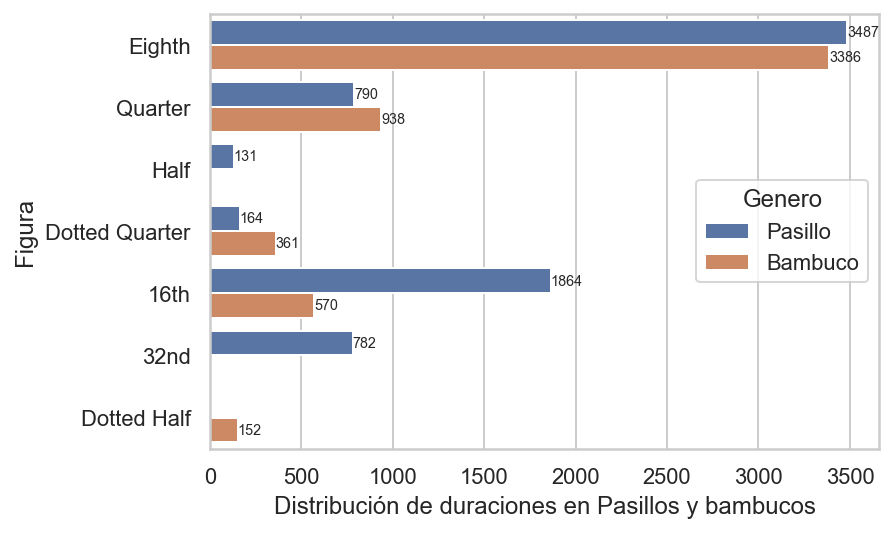

In [24]:
import seaborn as sns
sns.set_theme(style="whitegrid")
#ax = sns.barplot(x="Figura", y="Conteo", data=vf2)
#ax = sns.barplot(x="Conteo", y="Figura", data=totalFiguras2)
ax = sns.barplot(x="Conteo", y="Figura", hue="Genero", data=totalFiguras2)
ax.set_xlabel('Distribución de duraciones en Pasillos y bambucos')
sns.set(font_scale = 0.6)
for i in ax.containers:
    ax.bar_label(i,)
sns.set(rc = {'figure.figsize':(10,8)})

In [25]:
# output: M: major, m: minor, P: perfect, A: augmented, d: diminished
a = music21.corpus.getWork('A un ancestro')
s=parseMelody(a)
scaleSpecifiers= m21TOscaleSpecifiers(s)
print(scaleSpecifiers)

['P', 'm', 'P', 'P', 'm', 'P', 'm', 'P', 'P', 'P', 'm', 'M', 'P', 'M', 'P', 'M', 'm', 'P', 'm', 'P', 'P', 'm', 'P', 'm', 'P', 'P', 'P', 'd', 'P', 'M', 'm', 'P', 'M', 'm', 'P', 'm', 'P', 'm', 'P', 'M', 'P', 'm', 'P', 'm', 'P', 'P', 'm', 'P', 'P', 'P', 'P', 'm', 'P', 'A', 'm', 'P', 'P', 'P', 'P', 'm', 'm', 'm', 'P', 'P', 'P', 'P', 'P', 'P', 'M', 'P', 'M', 'm', 'A', 'P', 'm', 'M', 'm', 'P', 'P', 'M', 'P', 'P', 'M', 'A', 'P', 'M', 'P', 'P', 'm', 'M', 'm', 'P', 'm', 'P', 'P', 'P', 'P', 'P', 'P', 'm', 'P', 'm', 'P', 'M', 'P', 'P', 'm', 'M', 'P', 'm', 'P', 'P', 'P', 'P', 'm', 'P', 'P', 'M', 'P', 'P', 'P', 'P', 'm', 'P', 'P', 'P', 'P', 'P', 'P', 'm', 'P', 'P', 'm', 'P', 'M', 'P', 'm', 'P', 'P', 'P', 'P', 'P', 'P', 'm', 'P', 'P', 'm', 'P', 'M', 'P', 'm', 'm', 'P', 'm', 'P', 'P', 'M', 'P', 'P', 'm', 'm', 'm', 'P', 'P', 'P', 'm', 'm', 'P', 'P', 'M', 'm', 'P', 'm', 'm', 'P', 'm', 'P', 'P', 'M', 'P', 'M', 'm', 'P', 'P', 'M', 'M', 'P', 'M', 'm', 'P', 'M', 'M', 'M', 'P', 'm', 'P', 'P', 'P', 'P', 'P',

In [26]:
diatonicPitches=m21TOdiatonicPitches(s)
print(diatonicPitches)

[32, 34, 35, 32, 30, 31, 30, 31, 32, 31, 30, 29, 28, 27, 28, 29, 30, 32, 34, 35, 32, 30, 31, 30, 31, 32, 32, 32, 31, 34, 37, 38, 36, 37, 35, 34, 32, 33, 28, 29, 32, 30, 31, 30, 31, 32, 34, 35, 35, 31, 32, 33, 35, 36, 34, 35, 35, 35, 35, 36, 36, 36, 32, 35, 35, 35, 35, 32, 36, 35, 33, 37, 31, 32, 33, 33, 34, 35, 32, 36, 35, 38, 36, 31, 32, 36, 31, 32, 33, 33, 34, 35, 34, 35, 35, 32, 35, 39, 38, 41, 39, 40, 35, 34, 39, 38, 37, 36, 35, 30, 31, 32, 35, 32, 30, 31, 32, 36, 32, 32, 35, 28, 30, 32, 35, 39, 35, 38, 28, 30, 32, 35, 37, 35, 36, 28, 30, 32, 35, 39, 35, 38, 28, 30, 32, 35, 37, 35, 36, 32, 33, 34, 35, 36, 31, 35, 30, 31, 32, 34, 33, 34, 35, 31, 32, 33, 34, 35, 28, 29, 30, 35, 34, 27, 28, 30, 31, 32, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 36, 36, 36, 32, 34, 35, 32, 35, 39, 38, 37, 36, 32, 34, 35, 32, 35, 39, 38, 41, 40, 39, 38, 39, 37, 36, 37, 35, 35, 35, 35, 35, 33, 32, 31, 30, 29, 30, 31, 32, 35, 37, 38, 36, 37, 36, 35, 36]


In [76]:
diatonicIntervals=toDiatonicIntervals(s)
print(diatonicIntervals)

[0, 2, 1, -3, -2, 1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 2, 2, 1, -3, -2, 1, -1, 1, 1, 0, 0, -1, 3, 3, 1, -2, 1, -2, -1, -2, 1, -5, 1, 3, -2, 1, -1, 1, 1, 2, 1, 0, -4, 1, 1, 2, 1, -2, 1, 0, 0, 0, 1, 0, 0, -4, 3, 0, 0, 0, -3, 4, -1, -2, 4, -6, 1, 1, 0, 1, 1, -3, 4, -1, 3, -2, -5, 1, 4, -5, 1, 1, 0, 1, 1, -1, 1, 0, -3, 3, 4, -1, 3, -2, 1, -5, -1, 5, -1, -1, -1, -1, -5, 1, 1, 3, -3, -2, 1, 1, 4, -4, 0, 3, -7, 2, 2, 3, 4, -4, 3, -10, 2, 2, 3, 2, -2, 1, -8, 2, 2, 3, 4, -4, 3, -10, 2, 2, 3, 2, -2, 1, -4, 1, 1, 1, 1, -5, 4, -5, 1, 1, 2, -1, 1, 1, -4, 1, 1, 1, 1, -7, 1, 1, 5, -1, -7, 1, 2, 1, 1, -5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -2, 0, 0, -4, 2, 1, -3, 3, 4, -1, -1, -1, -4, 2, 1, -3, 3, 4, -1, 3, -1, -1, -1, 1, -2, -1, 1, -2, 0, 0, 0, 0, -2, -1, -1, -1, -1, 1, 1, 1, 3, 2, 1, -2, 1, -1, -1, 1]


In [77]:
chromaticIntervals=toChromaticIntervals(s)
print(chromaticIntervals)

[0, 3, 2, -5, -4, 2, -2, 2, 2, -2, -2, -1, -2, -1, 1, 2, 1, 4, 3, 2, -5, -4, 2, -2, 2, 2, 0, -1, -1, 6, 4, 2, -3, 1, -3, -2, -3, 1, -8, 2, 5, -4, 2, -2, 2, 2, 3, 2, 0, -7, 2, 1, 4, 3, -5, 2, 0, 0, 0, 1, 0, 0, -6, 5, 0, 0, 0, -5, 7, -2, -3, 6, -9, 1, 1, 1, 1, 2, -5, 7, -2, 5, -3, -8, 1, 7, -9, 2, 1, 1, 1, 2, -2, 2, 0, -5, 5, 7, -2, 5, -3, 1, -8, -1, 8, -2, -2, -1, -2, -9, 2, 2, 5, -5, -4, 2, 2, 7, -7, 0, 5, -12, 3, 4, 5, 7, -7, 5, -17, 3, 4, 5, 3, -3, 2, -14, 3, 4, 5, 7, -7, 5, -17, 3, 4, 5, 3, -3, 2, -7, 1, 2, 2, 1, -8, 7, -8, 1, 2, 3, -2, 2, 2, -7, 2, 1, 2, 2, -12, 2, 1, 9, -2, -12, 2, 3, 2, 2, -8, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, -3, 0, 0, -7, 3, 2, -5, 5, 7, -2, -2, -1, -7, 3, 2, -5, 5, 7, -2, 5, -2, -1, -2, 2, -4, -1, 1, -3, 0, 0, 0, 0, -4, -1, -2, -2, -2, 2, 2, 2, 5, 3, 2, -3, 1, -1, -2, 2]


In [78]:
Pitches=m21TOPitches(s)
print(Pitches)

['B4', 'D5', 'E5', 'B4', 'G4', 'A4', 'G4', 'A4', 'B4', 'A4', 'G4', 'F#4', 'E4', 'D#4', 'E4', 'F#4', 'G4', 'B4', 'D5', 'E5', 'B4', 'G4', 'A4', 'G4', 'A4', 'B4', 'B4', 'B-4', 'A4', 'D#5', 'G5', 'A5', 'F#5', 'G5', 'E5', 'D5', 'B4', 'C5', 'E4', 'F#4', 'B4', 'G4', 'A4', 'G4', 'A4', 'B4', 'D5', 'E5', 'E5', 'A4', 'B4', 'C5', 'E5', 'F##5', 'D5', 'E5', 'E5', 'E5', 'E5', 'F5', 'F5', 'F5', 'B4', 'E5', 'E5', 'E5', 'E5', 'B4', 'F#5', 'E5', 'C#5', 'G5', 'A#4', 'B4', 'C5', 'C#5', 'D5', 'E5', 'B4', 'F#5', 'E5', 'A5', 'F#5', 'A#4', 'B4', 'F#5', 'A4', 'B4', 'C5', 'C#5', 'D5', 'E5', 'D5', 'E5', 'E5', 'B4', 'E5', 'B5', 'A5', 'D6', 'B5', 'C6', 'E5', 'D#5', 'B5', 'A5', 'G5', 'F#5', 'E5', 'G4', 'A4', 'B4', 'E5', 'B4', 'G4', 'A4', 'B4', 'F#5', 'B4', 'B4', 'E5', 'E4', 'G4', 'B4', 'E5', 'B5', 'E5', 'A5', 'E4', 'G4', 'B4', 'E5', 'G5', 'E5', 'F#5', 'E4', 'G4', 'B4', 'E5', 'B5', 'E5', 'A5', 'E4', 'G4', 'B4', 'E5', 'G5', 'E5', 'F#5', 'B4', 'C5', 'D5', 'E5', 'F5', 'A4', 'E5', 'G#4', 'A4', 'B4', 'D5', 'C5', 'D5', 'E5

In [79]:
timeSignature=m21TOTimeSignature(s)
print(timeSignature)

['6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8', '6/8'

In [80]:
Key=m21TOKey(s)
print(Key)

[('E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'

In [81]:
beat_str=m21TOBeat_str(s)
print(beat_str)

(['2', '1', '2', '1', '2', '2', '2', '2', '1', '2', '2', '2', '2', '1', '2', '2', '2', '2', '1', '2', '1', '2', '2', '2', '2', '1', '1', '1', '1', '2', '2', '2', '1', '2', '1', '2', '2', '1', '2', '2', '1', '2', '2', '2', '2', '1', '2', '2', '1', '2', '2', '2', '2', '1', '2', '1', '1', '2', '2', '1', '1', '2', '2', '1', '1', '2', '2', '2', '1', '2', '2', '1', '2', '2', '2', '2', '1', '2', '1', '1', '2', '2', '1', '1', '1', '2', '2', '2', '2', '2', '1', '2', '1', '2', '1', '2', '2', '1', '2', '2', '1', '1', '1', '2', '2', '1', '2', '1', '2', '2', '2', '1', '2', '1', '2', '2', '1', '2', '1', '2', '1', '2', '2', '2', '2', '1', '2', '2', '2', '2', '2', '2', '1', '2', '2', '2', '2', '2', '2', '1', '2', '2', '2', '2', '2', '2', '1', '2', '2', '2', '2', '2', '2', '1', '2', '2', '2', '2', '2', '2', '1', '2', '2', '2', '2', '2', '2', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '1', '1', '2', '2', '1', '2', '2', '2', '1', '2'

In [82]:
beatFloat=m21TOBeat_float(s)
print(beatFloat)

[2.6666666666666665, 1.0, 2.0, 1.0, 2.3333333333333335, 2.5, 2.6666666666666665, 2.8333333333333335, 1.0, 2.3333333333333335, 2.5, 2.6666666666666665, 2.8333333333333335, 1.0, 2.3333333333333335, 2.5, 2.6666666666666665, 2.8333333333333335, 1.0, 2.0, 1.0, 2.3333333333333335, 2.5, 2.6666666666666665, 2.8333333333333335, 1.0, 1.3333333333333333, 1.5, 1.6666666666666667, 2.0, 2.3333333333333335, 2.6666666666666665, 1.0, 2.0, 1.0, 2.6666666666666665, 2.8333333333333335, 1.0, 2.3333333333333335, 2.6666666666666665, 1.0, 2.3333333333333335, 2.5, 2.6666666666666665, 2.8333333333333335, 1.0, 2.0, 2.6666666666666665, 1.0, 2.3333333333333335, 2.5, 2.6666666666666665, 2.8333333333333335, 1.0, 2.0, 1.0, 1.6666666666666667, 2.0, 2.3333333333333335, 1.0, 1.6666666666666667, 2.0, 2.6666666666666665, 1.0, 1.6666666666666667, 2.0, 2.3333333333333335, 2.6666666666666665, 1.0, 2.0, 2.6666666666666665, 1.0, 2.3333333333333335, 2.5, 2.6666666666666665, 2.8333333333333335, 1.0, 2.0, 1.0, 1.0, 2.0, 2.6666666

In [83]:
metricContour=m21TOmetriccontour(s)
print(metricContour)

['+', '+', '-', '+', '-', '-', '+', '-', '+', '-', '-', '+', '-', '+', '-', '-', '+', '-', '+', '-', '+', '-', '-', '+', '-', '+', '-', '-', '+', '+', '-', '=', '+', '-', '+', '-', '-', '+', '-', '=', '+', '-', '-', '+', '-', '+', '-', '-', '+', '-', '-', '+', '-', '+', '-', '+', '-', '+', '-', '+', '-', '+', '-', '+', '-', '+', '-', '=', '+', '-', '-', '+', '-', '-', '+', '-', '+', '-', '+', '=', '-', '-', '+', '-', '=', '+', '-', '-', '+', '-', '+', '-', '+', '-', '+', '-', '-', '+', '-', '-', '+', '-', '=', '+', '-', '+', '-', '+', '-', '-', '-', '+', '-', '+', '-', '-', '+', '-', '+', '-', '+', '-', '-', '+', '-', '+', '-', '-', '=', '-', '+', '-', '+', '-', '-', '=', '-', '+', '-', '+', '-', '-', '=', '-', '+', '-', '+', '-', '-', '=', '-', '+', '-', '+', '-', '-', '=', '-', '+', '-', '+', '-', '-', '=', '-', '+', '-', '+', '-', '-', '+', '-', '+', '=', '-', '+', '-', '+', '=', '-', '+', '-', '+', '-', '+', '-', '+', '-', '+', '-', '+', '-', '+', '-', '+', '-', '-', '=', '+', '-',

Metric analysis
Adds a attribute melodicAccent to each note of a Stream object according to the method postulated in Joseph M. Thomassen, “Melodic accent: Experiments and a tentative model,” ‘’Journal of the Acoustical Society of America’’, Vol. 71, No. 6 (1982) pp. 1598-1605; with, Erratum, ‘’Journal of the Acoustical Society of America’’, Vol. 73, No. 1 (1983) p.373, and in David Huron and Matthew Royal, “What is melodic accent? Converging evidence from musical practice.” ‘’Music Perception’’, Vol. 13, No. 4 (1996) pp. 489-516.

In [27]:
ts = music21.meter.TimeSignature('4/4')
s.insert(0, ts)
n = music21.note.Note(type='eighth')
s.repeatAppend(n, 8)
s.makeMeasures(inPlace=True)
post = music21.analysis.metrical.labelBeatDepth(s)
sOut = []
for n in s.flatten().notes:
    stars = "".join([l.text for l in n.lyrics])
    sOut.append("{0:8s} {1}".format(n.beatStr, stars))
print("\n".join(sOut))


3 1/2    *
4        **
1 1/2    *
3        ***
1        ****
1 1/4    ****
1 1/2    *
1 3/4    *
2        **
4        **
4 1/4    **
4 1/2    *
4 3/4    *
1        ****
3        ***
3 1/4    ***
3 1/2    *
3 3/4    *
4        **
1 1/2    *
3        ***
1        ****
1 1/4    ****
1 1/2    *
1 3/4    *
2        **
1 1/2    *
1 3/4    *
2        **
2 1/2    *
3        ***
3 1/2    *
4        **
1 1/2    *
3        ***
1 1/2    *
1 3/4    *
2        **
4        **
4 1/2    *
1        ****
3        ***
3 1/4    ***
3 1/2    *
3 3/4    *
4        **
1 1/2    *
2 1/2    *
3        ***
1        ****
1 1/4    ****
1 1/2    *
1 3/4    *
2        **
3 1/2    *
1        ****
2        **
2 1/2    *
3        ***
4        **
1        ****
1 1/2    *
2 1/2    *
3        ***
4        **
4 1/2    *
1        ****
1 1/2    *
2        **
3 1/2    *
4 1/2    *
1        ****
3        ***
3 1/4    ***
3 1/2    *
3 3/4    *
4        **
1 1/2    *
3        ***
2        **
3 1/2    *
4 1/2    *
1        ****
1 

## Jmusic values

In [28]:
def calculateJMusicValuesInSet(df,genero):
    filtred=df[(merged_inner['Género'].str.contains(genero, case=False))]
    a=pd.unique(filtred['Título'])
    a=a[1:10]
    procesedFiles=0
    errors=0
    result = pd.DataFrame()
    for i in a:
        try:
            s = music21.corpus.getWork(i)
            source=music21.converter.parse(s)
            source=parseMelody(s)
            fe = music21.features.jSymbolic.AverageMelodicIntervalFeature(source)
            ami = fe.extract()
            #Average duration of notes in seconds
            fe = music21.features.jSymbolic.AverageNoteDurationFeature(source)
            ad =  fe.extract()

            fe = music21.features.jSymbolic.MostCommonMelodicIntervalFeature(source)
            mcmi = fe.extract()

            #Fraction of melodic intervals belong most common interval
            fe = music21.features.jSymbolic.MostCommonMelodicIntervalPrevalenceFeature(s)
            mcipf = fe.extract()

            fe = music21.features.jSymbolic.RangeFeature(source)
            rangest=fe.extract()

            fe = music21.features.jSymbolic.PitchVarietyFeature(source)
            pv=fe.extract()

            fe = music21.features.jSymbolic.StepwiseMotionFeature(source)
            sm = fe.extract()

            insert_row = {
                "Título": i,
                "AMI": round(ami.vector[0], 2),
                "MCMI": mcmi.vector[0],
                "MCIPF": round(mcipf.vector[0], 2),
                "AD": round(ad.vector[0], 2),
                "RANGE": rangest.vector[0],
                "PV": pv.vector[0],
                "TyST": round(sm.vector[0],2),
                "SM": round(sm.vector[0],2),
            }
            result=pd.concat([result, pd.DataFrame([insert_row])])
            procesedFiles+=1
        except:
            errors+=1
            pass
    print("Procesadas: ", procesedFiles, "errores: ", errors)
    result=result.reset_index(drop=True)
    return result

In [29]:
e=calculateJMusicValuesInSet(merged_inner,'Bambuco')
e

Procesadas:  0 errores:  9


Empty DataFrame
Columns: []
Index: []

In [30]:
#Configurar directorio de trabajo
dataDirectory = 'G:/Unidades compartidas/MUCOSIMBANDES/Corpus/Archivos MusicXML/Bambucos'
#Imprimir listado de archivos
dir=sorted(os.listdir(dataDirectory))
print(len(dir), " archivos")
print(dir)

64  archivos
['A pesar de todo.mxl', 'A un ancestro.musicxml', 'Alma Bogotana.musicxml', 'Amaneceres.mxl', 'Ancestro.musicxml', 'Aroma de cielo.mxl', 'Atlanta.mxl', 'Bacatá.xml', 'Bachué.xml', 'Bajo el Signo.xml', 'Bambuco.mxl', 'Bambuquísimo.xml', 'Bochica.mxl', 'Bochicaneando.mxl', 'Buen humor.mxl', 'Calibán.xml', 'Como pa desenguayabar.mxl', 'Cucarrón.mxl', 'Diana.mxl', 'Dical.mxl', 'EPA.mxl', 'El Campesino.xml', 'El Fusagasugueño.mxl', 'El Ney.mxl', 'El Tato.mxl', 'El arenoso.mxl', 'El pataleo.mxl', 'El republicano.xml', 'El solterón.mxl', 'El sotareño.mxl', 'El villetano.mxl', 'Enigma.xml', 'Fandango.mxl', 'Fantasía en 6_8.mxl', 'Fiesta en Sutatenza.mxl', 'Fiesta en la montaña.mxl', 'Gelica y Peranza.mxl', 'Gloria Beatriz.xml', 'Guatavita.xml', 'Hágame el favor, Cleofás.mxl', 'Insigne.mxl', 'Janeth.mxl', 'Joyel.mxl', 'Locuras.mxl', 'Ojo al toro.mxl', 'Optimista.xml', "Pa' Juancho.mxl", "Pa' que me miró.xml", 'Palo negro.xml', 'Paso a Paso.xml', 'Patria.xml', 'Patricia.mxl', 'Pulga

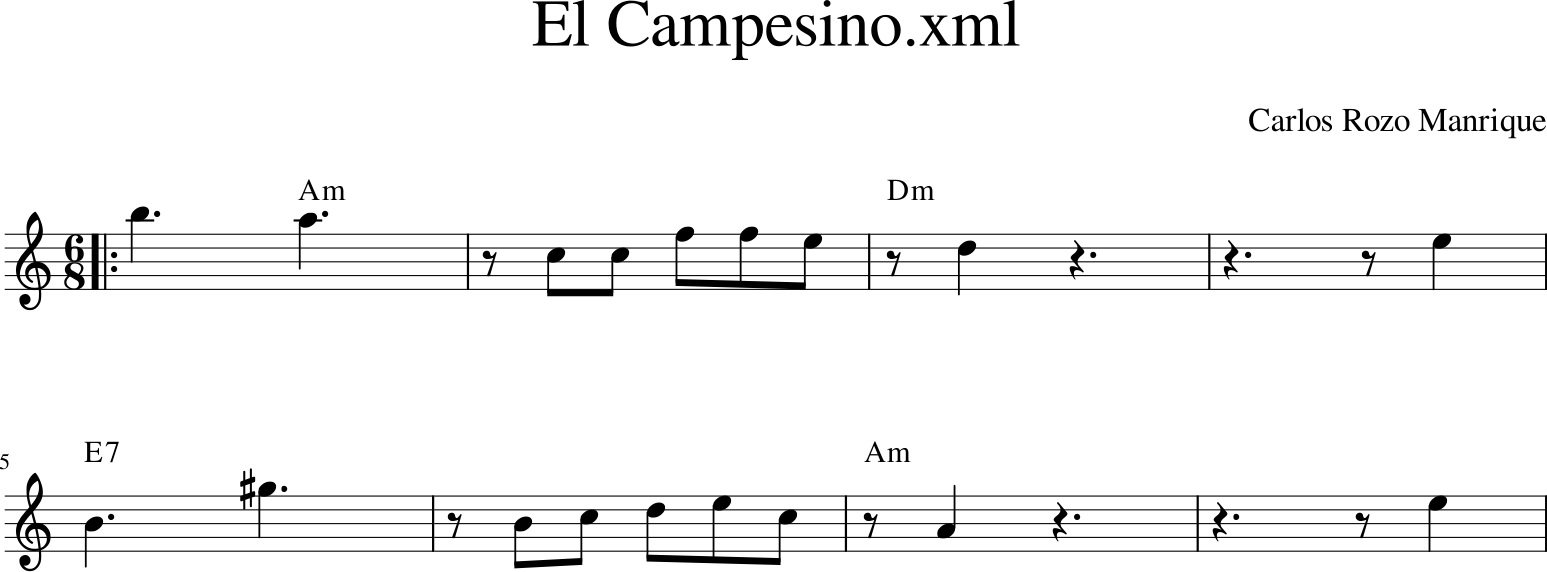

In [31]:
#Mostrar y reproducir un único archivo
from IPython.display import Image, Audio
os.path.supports_unicode_filenames
import sys
#reload(sys)
#sys.setdefaultencoding('utf-8')
#Lilipond
us['lilypondPath'] = 'C:/LilyPond/usr/bin/lilypond.exe'
f = os.path.join(dataDirectory + os.sep, "El Campesino.xml")
f=os.path.normpath(f)
os.path.exists(f)
f=music21.converter.parse(f)
excerpt = f.measures(1,8)
#excerpt.show('text')
#Image(filename=excerpt.write('lily.png'))
excerpt.show()
#excerpt.show('text')
#excerpt.show('midi')
#fp = music21.converter.freeze(f, fmt='None',fastButUnsafe=False, zipType='zlib')
#fp

1


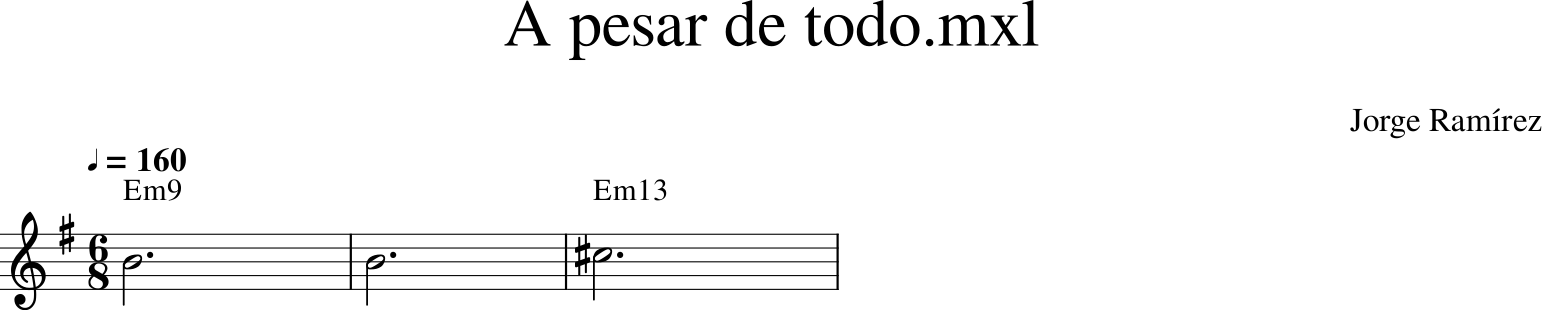

2


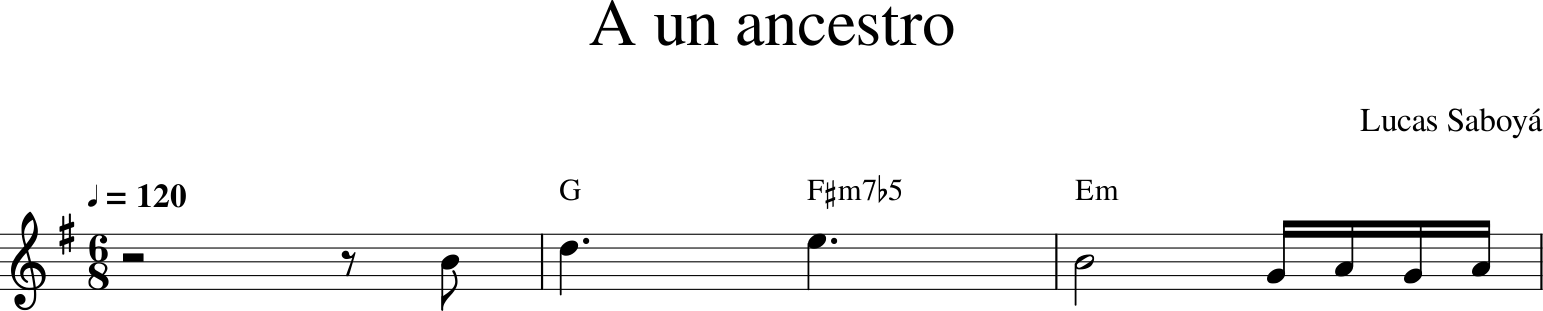

3


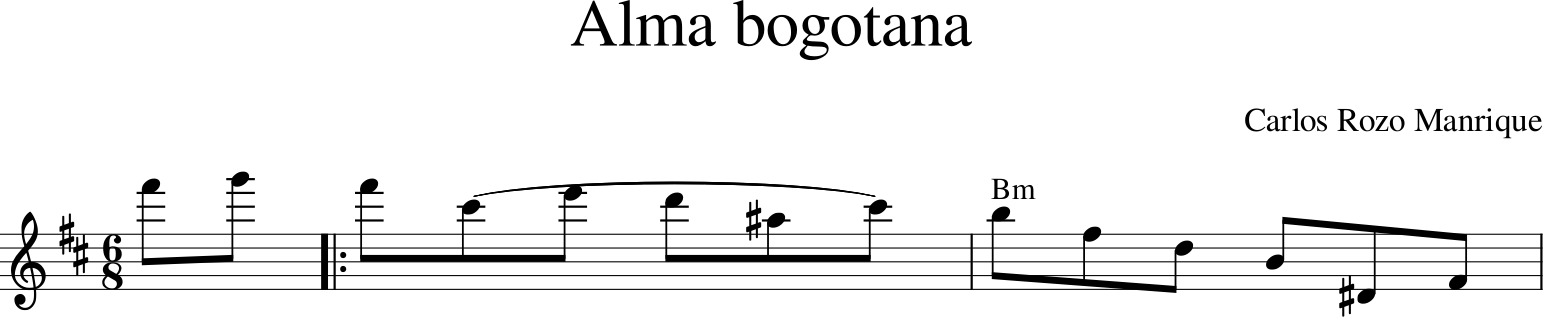

4


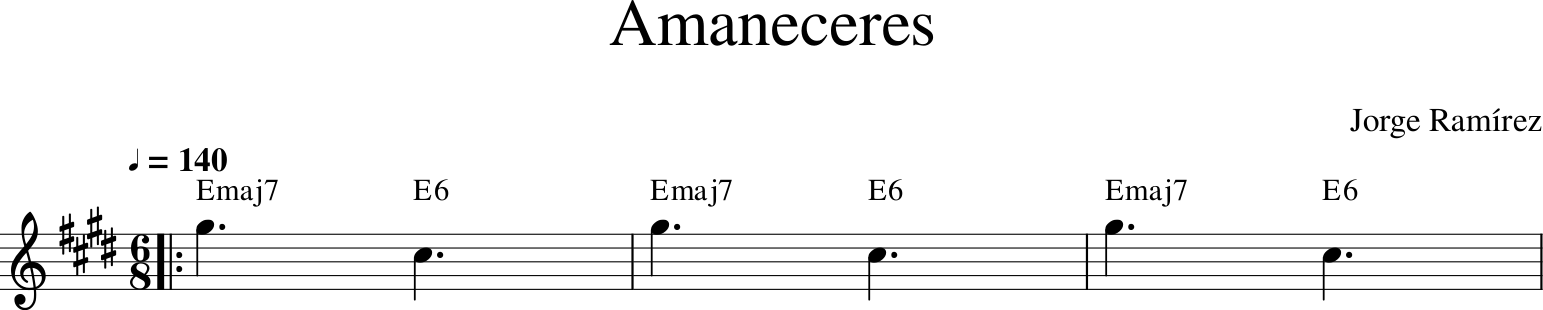

5


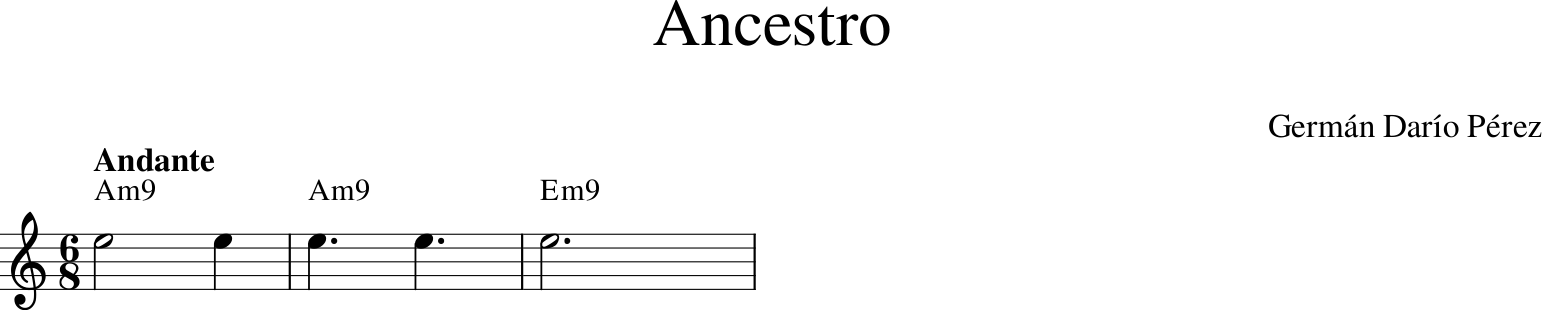

6


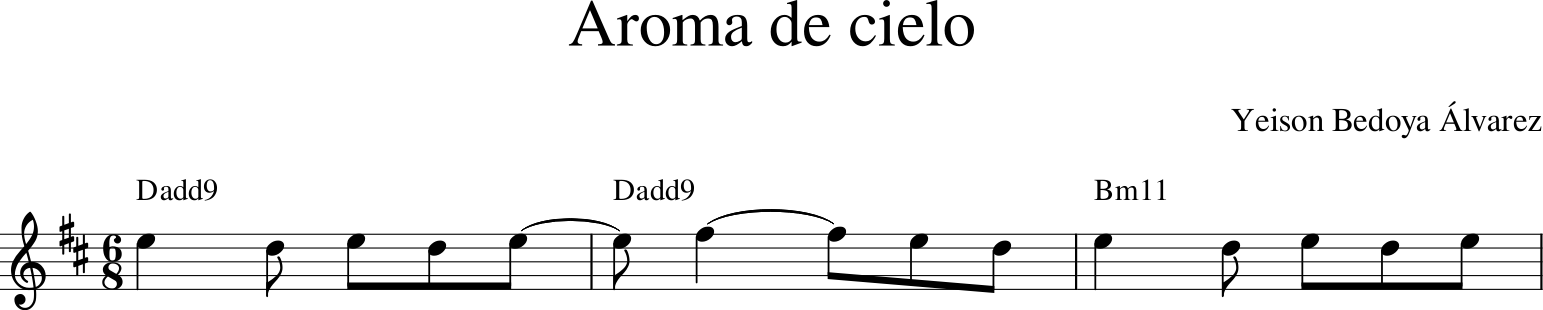

7


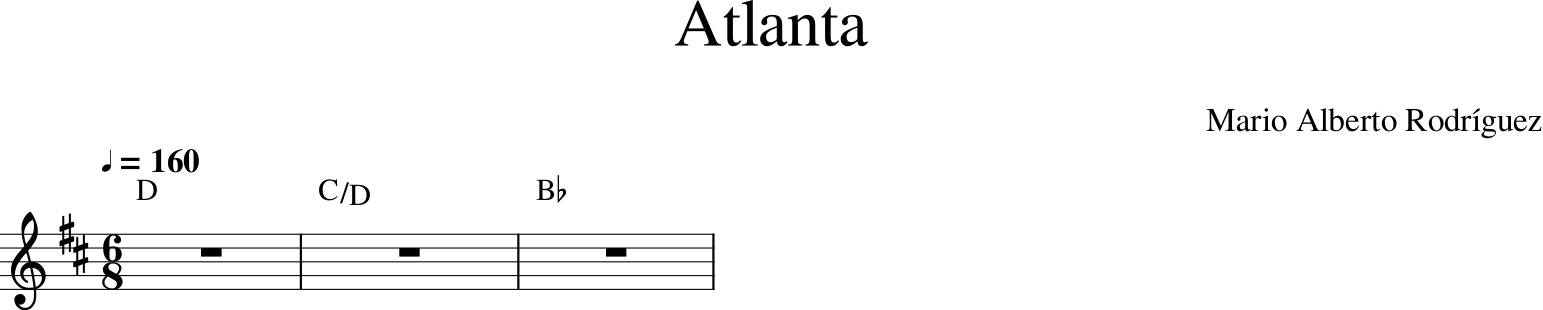

8


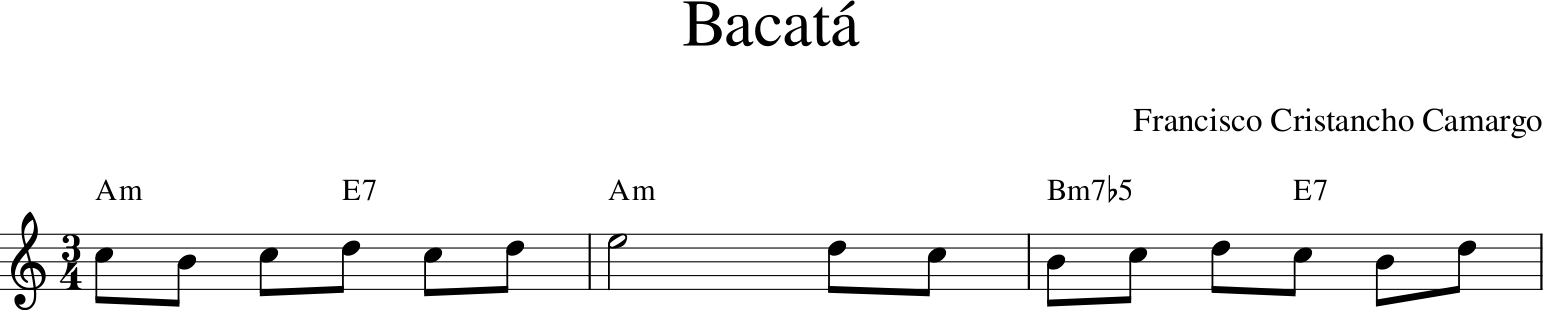

9


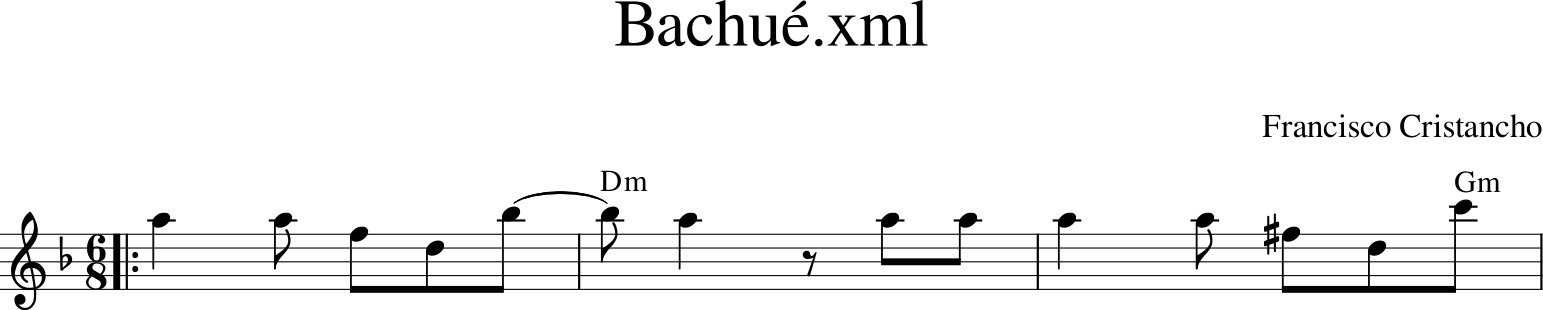

10


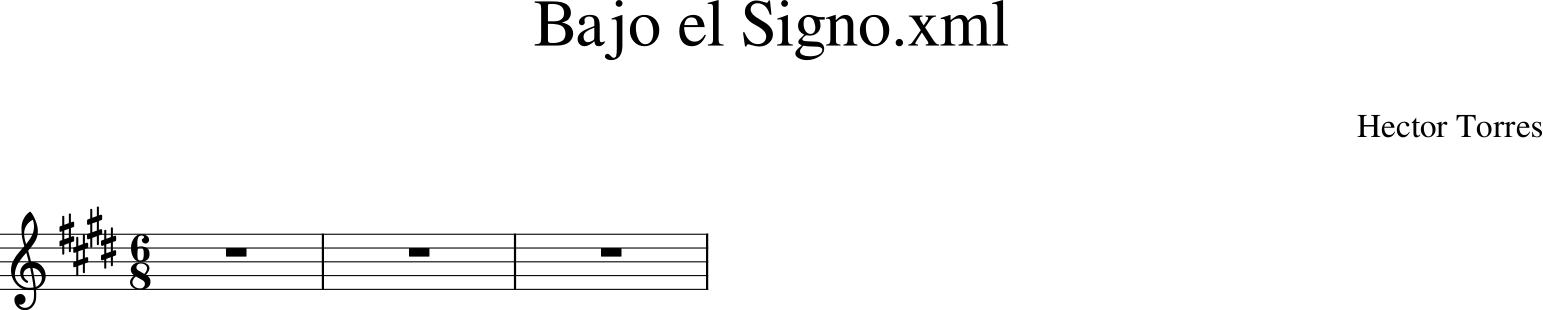

11


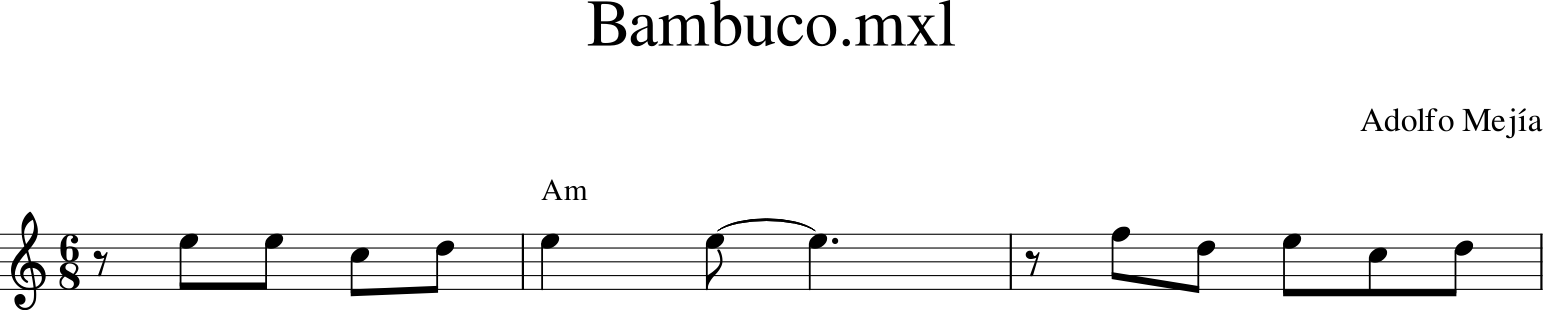

12


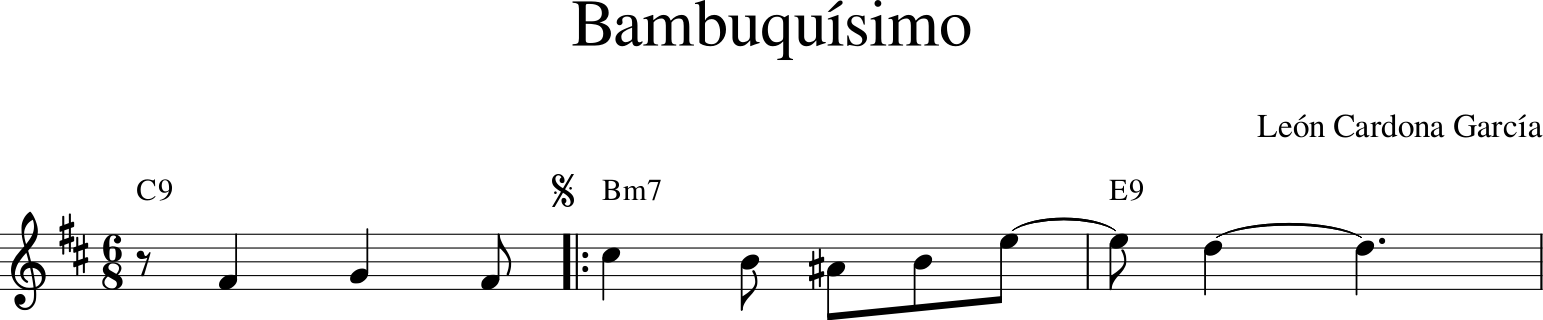

13


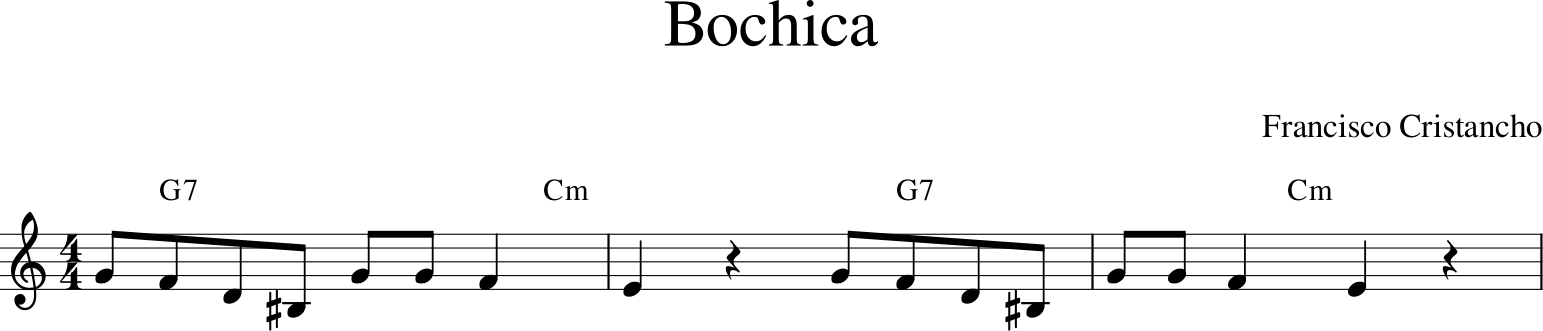

14


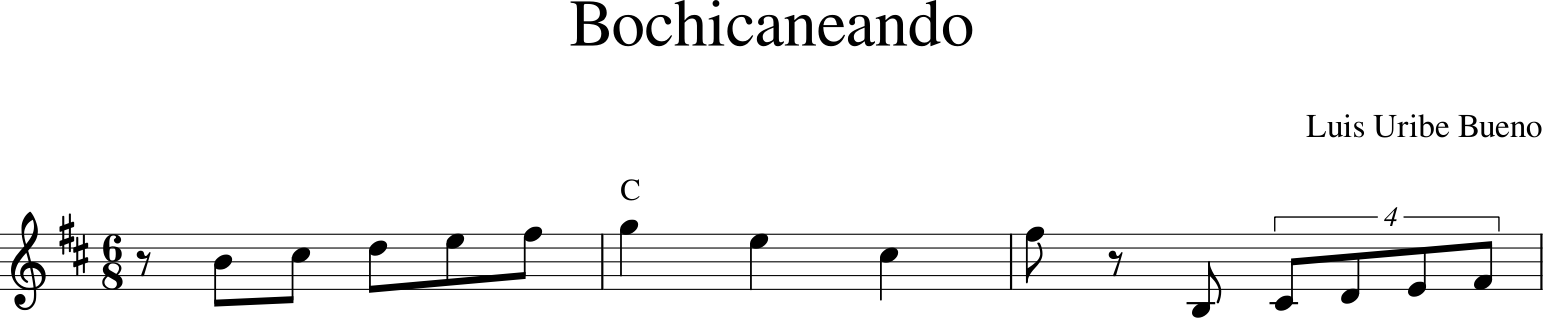

15


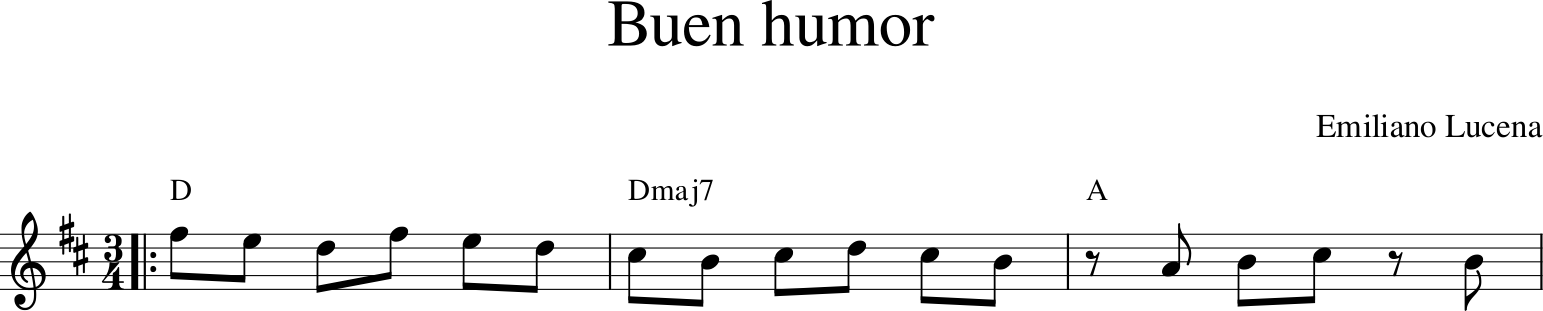

16


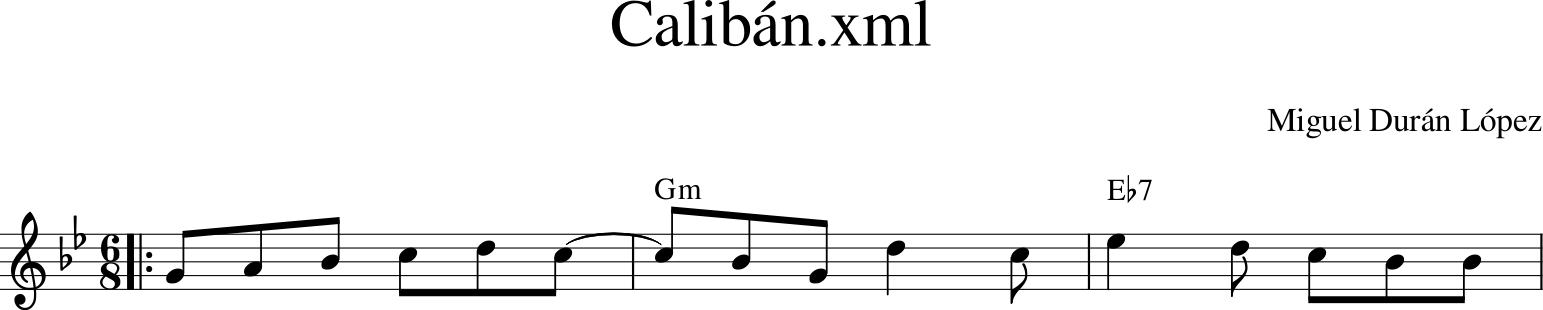

17


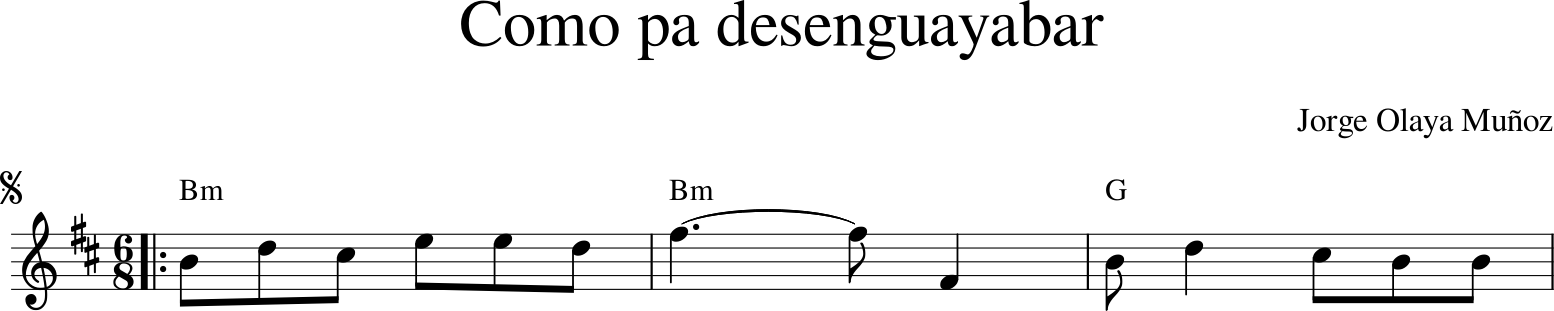

18


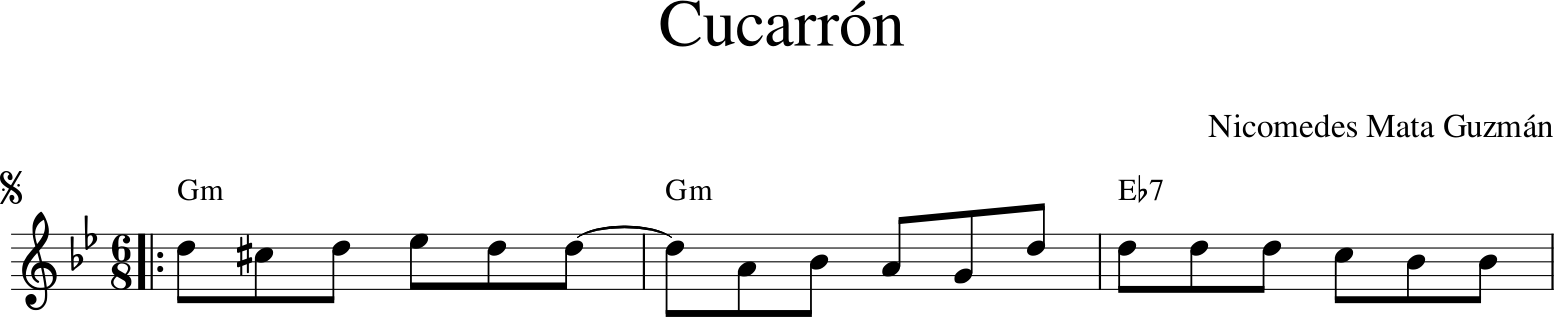

19


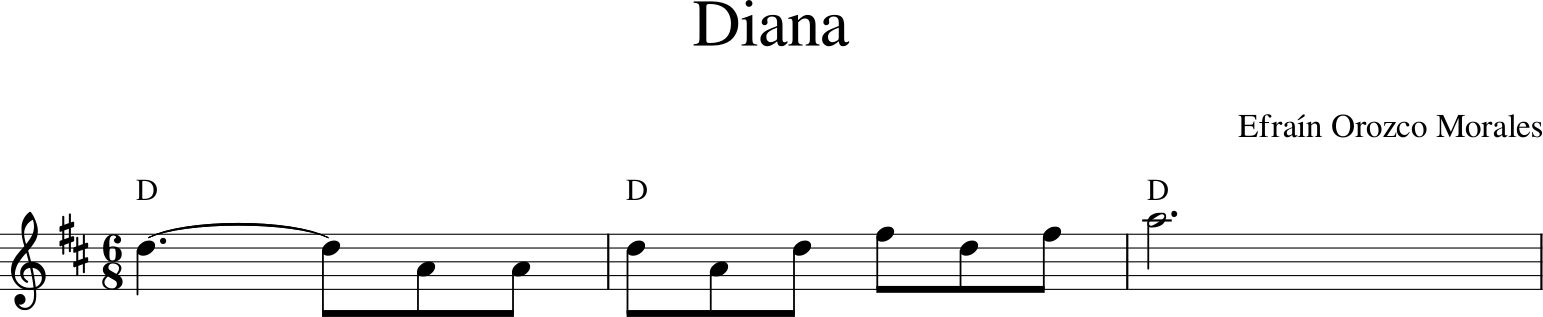

20


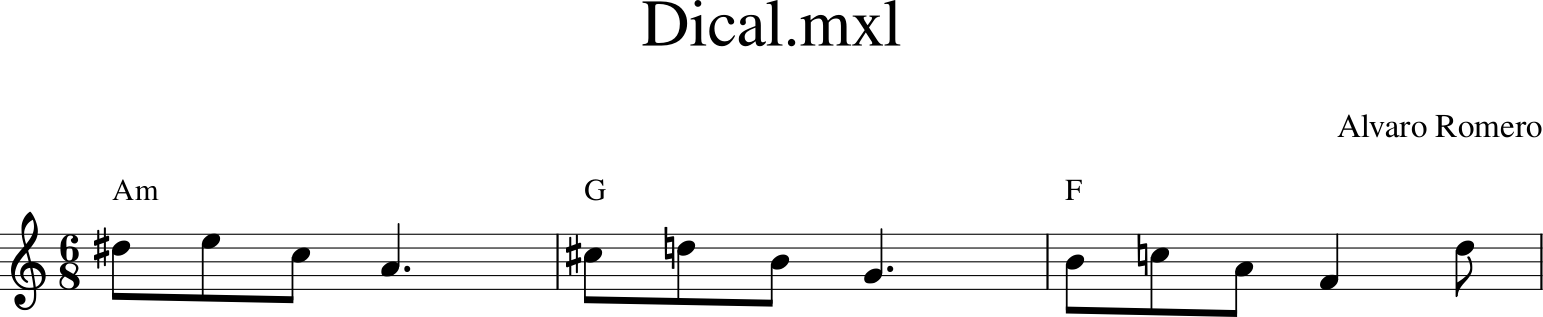

21


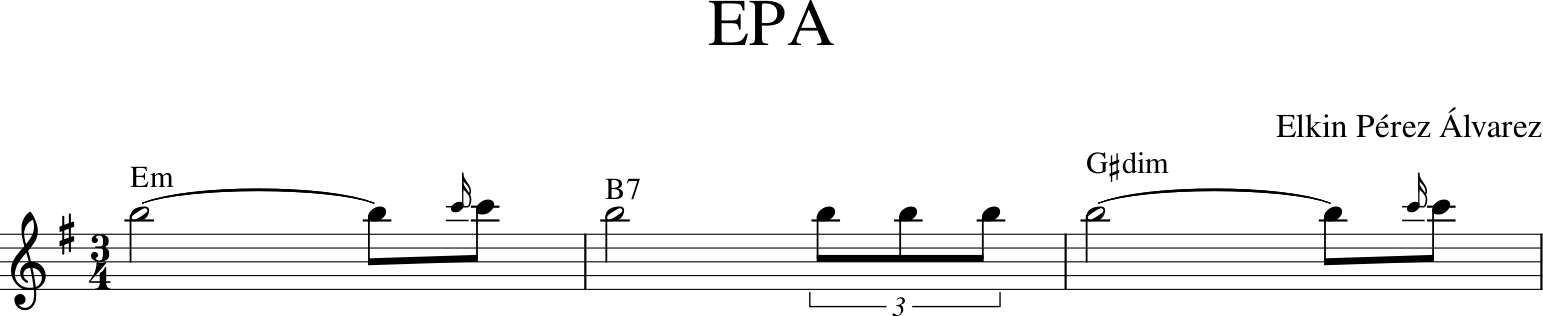

22


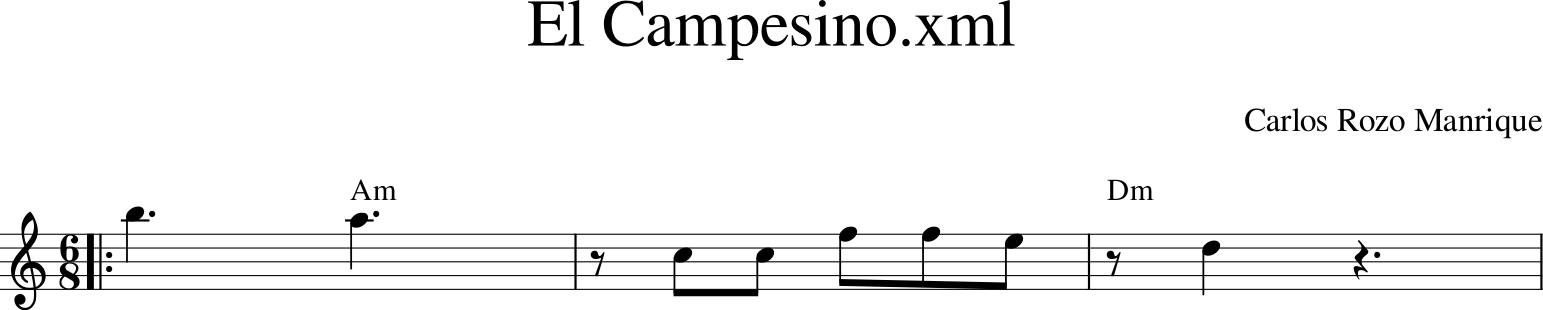

23


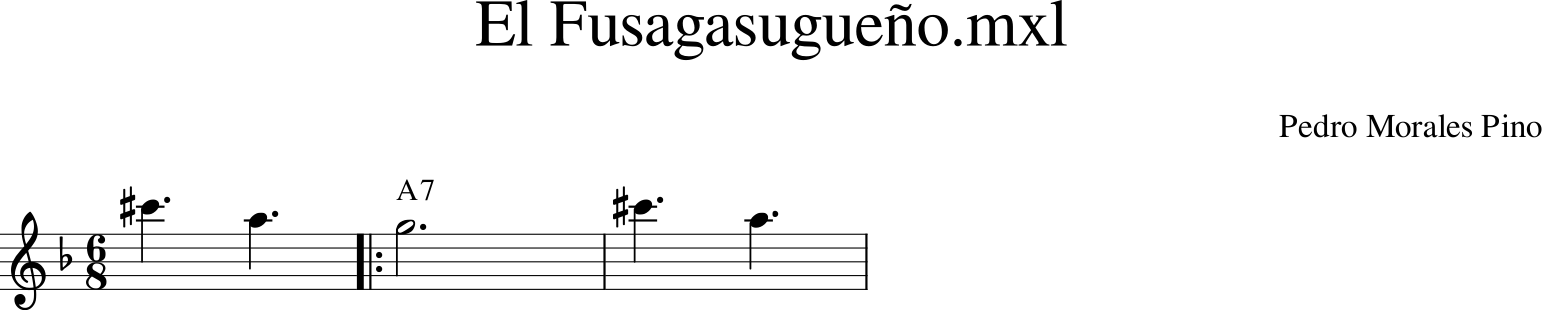

24


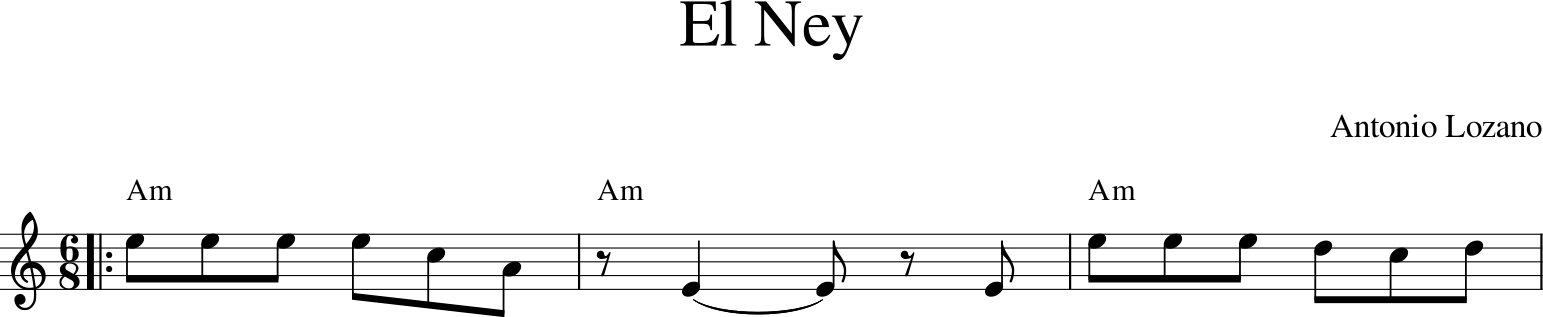

25


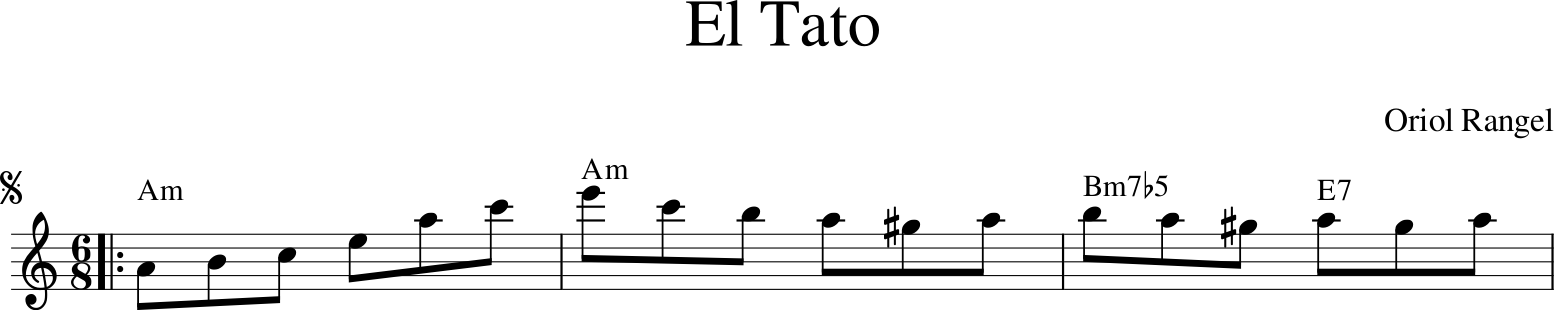

26


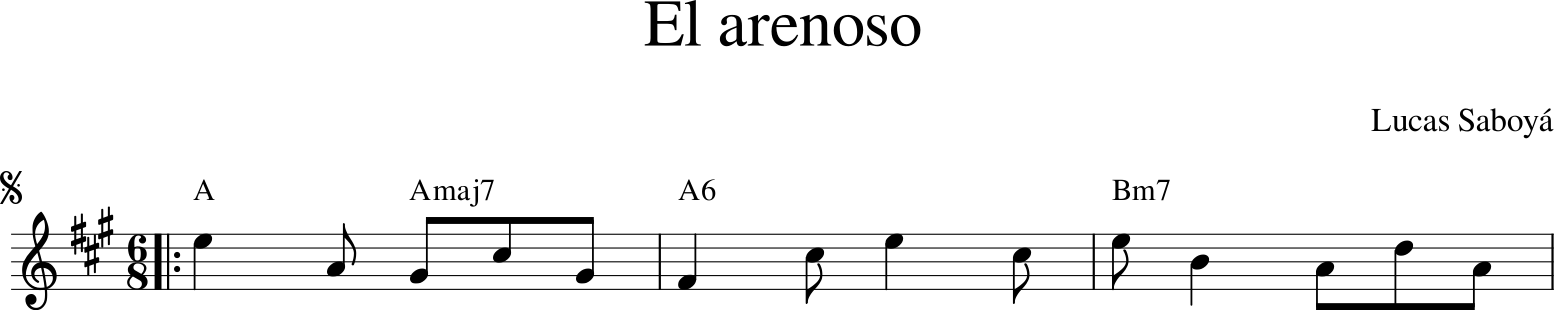

27


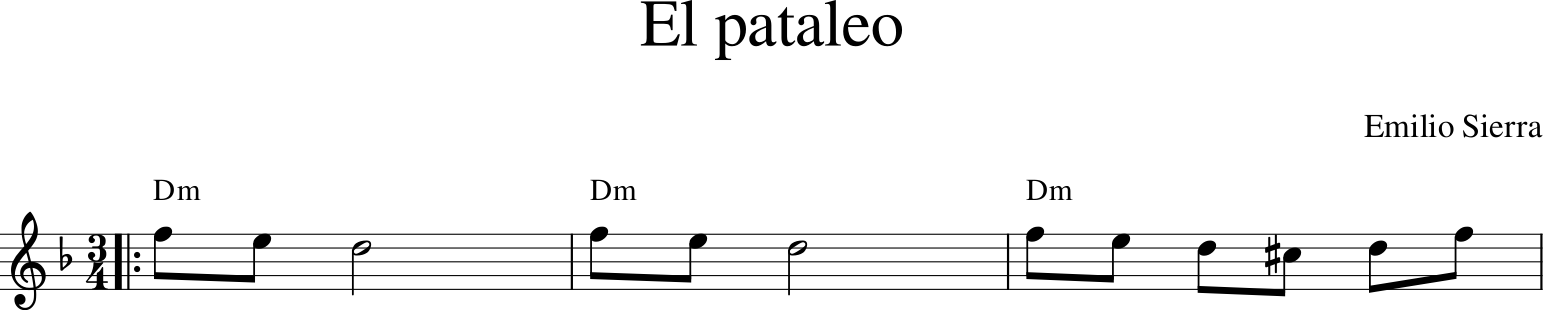

28


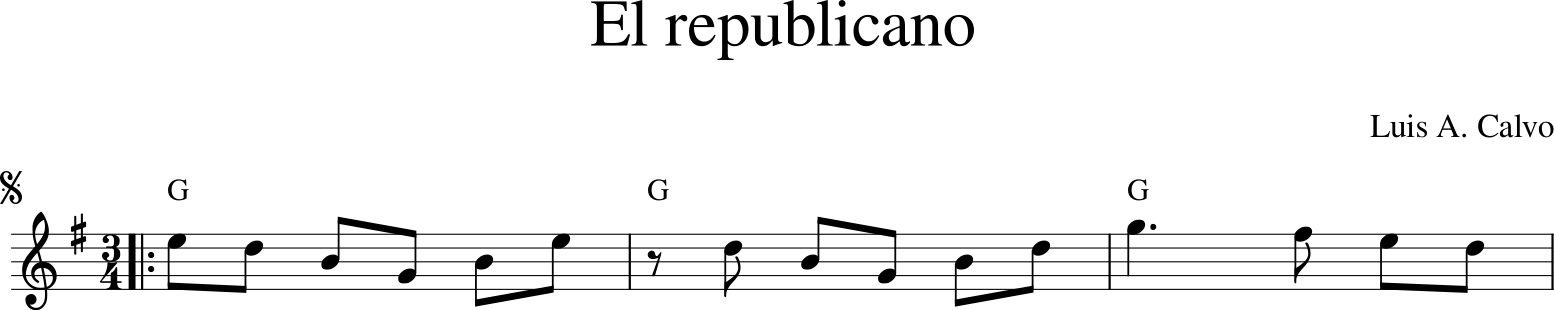

29


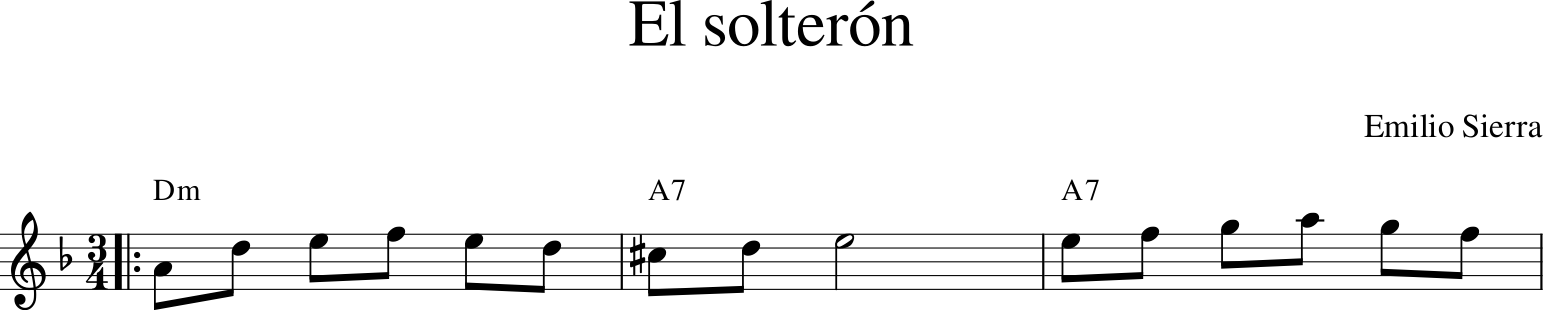

30


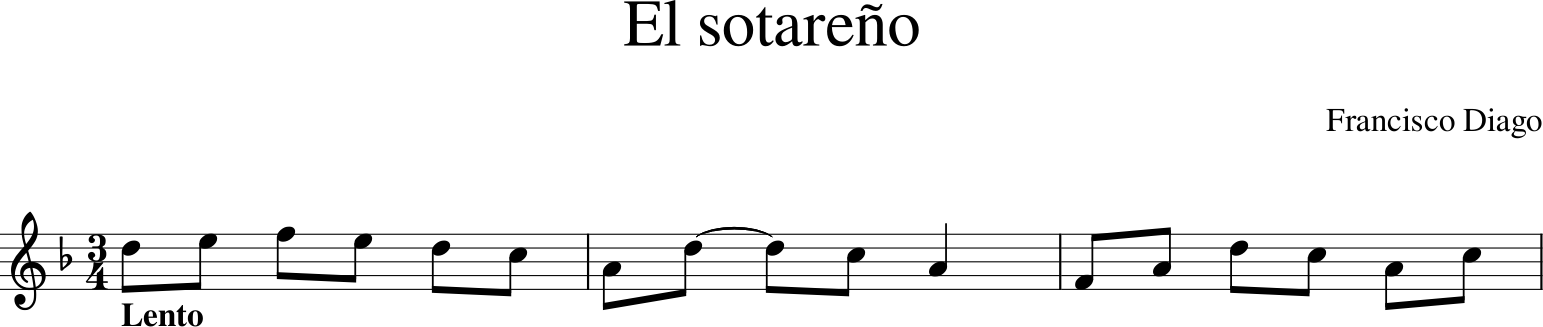

31


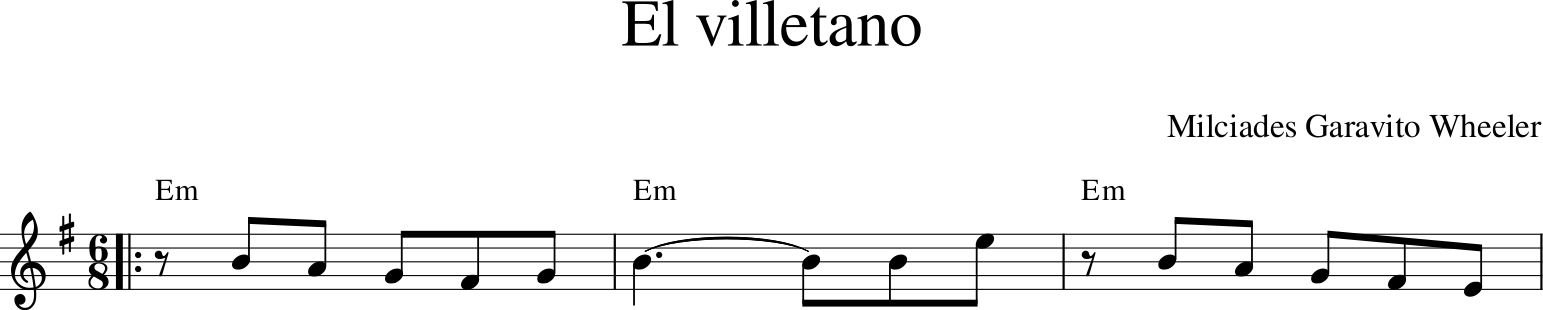

32
Enigma.xml No se pudo imprimir
33


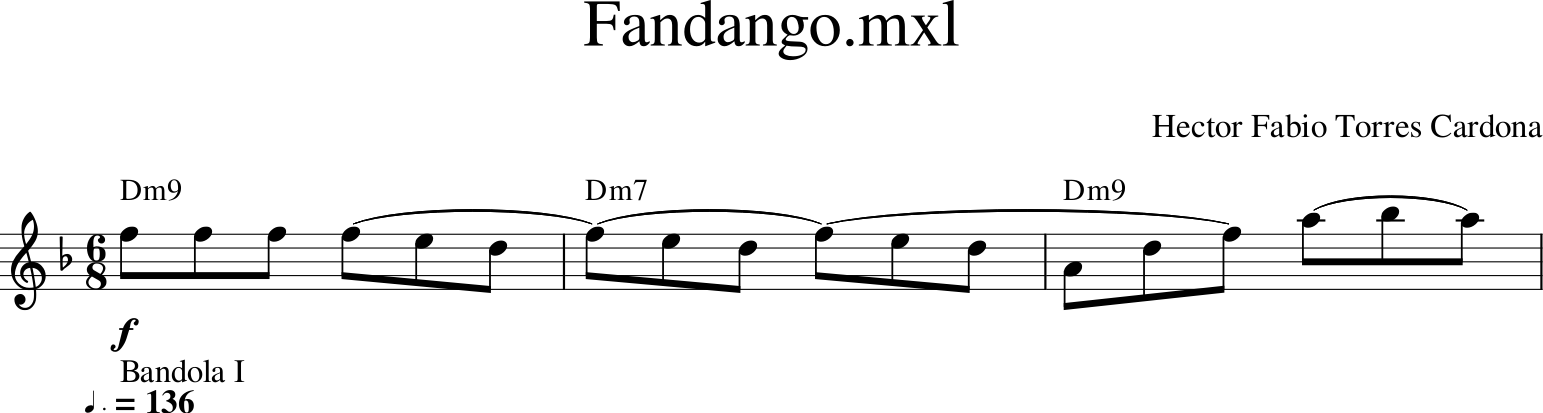

34


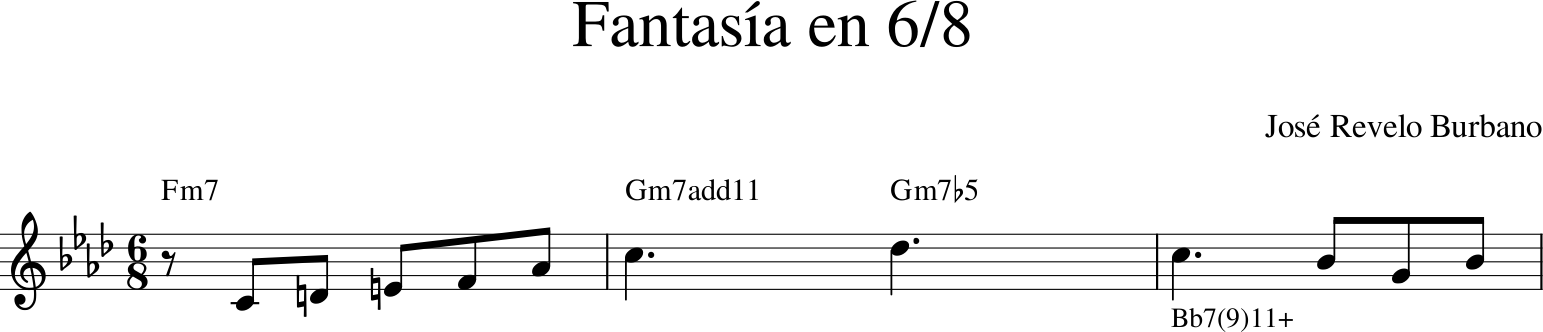

35


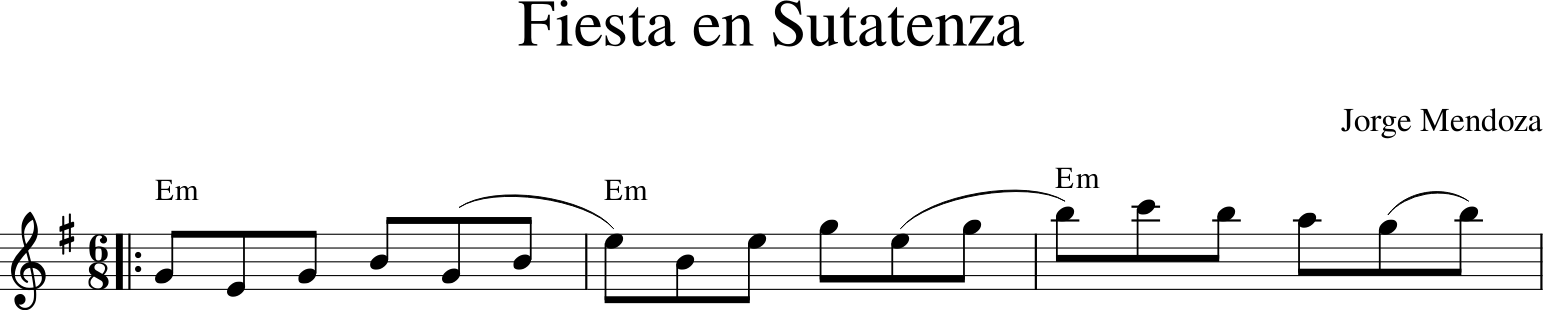

36


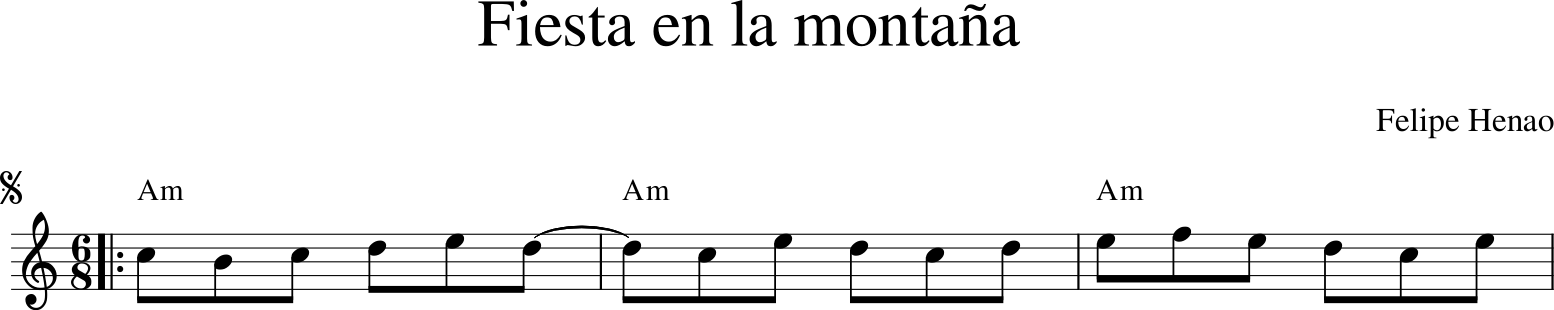

37


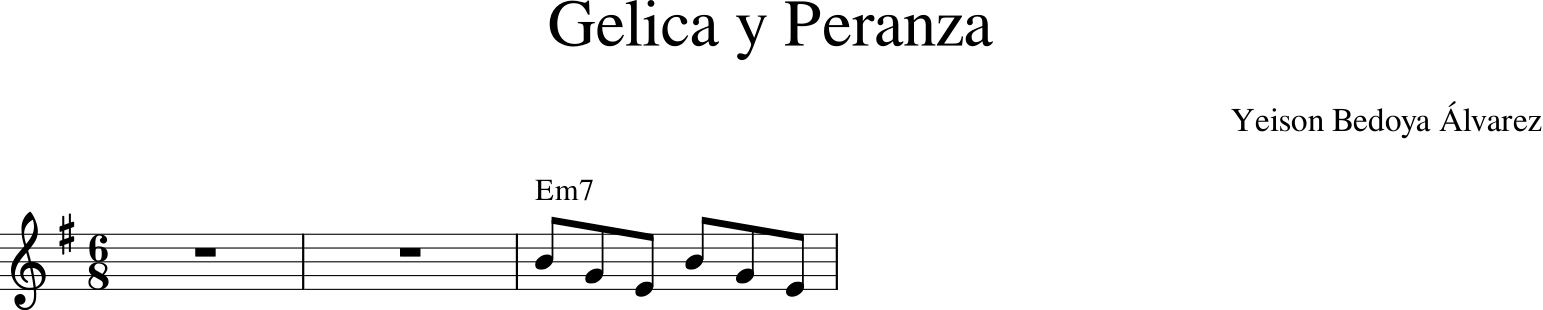

38


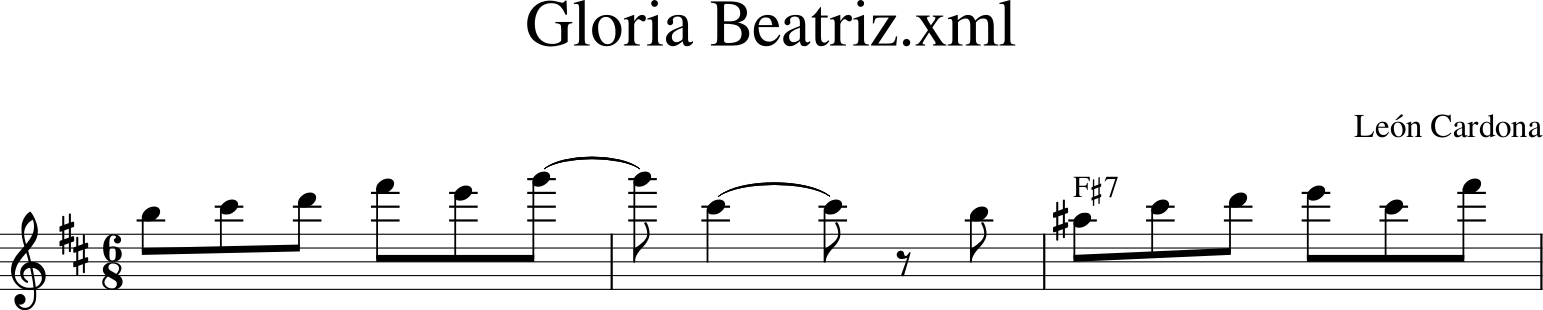

39


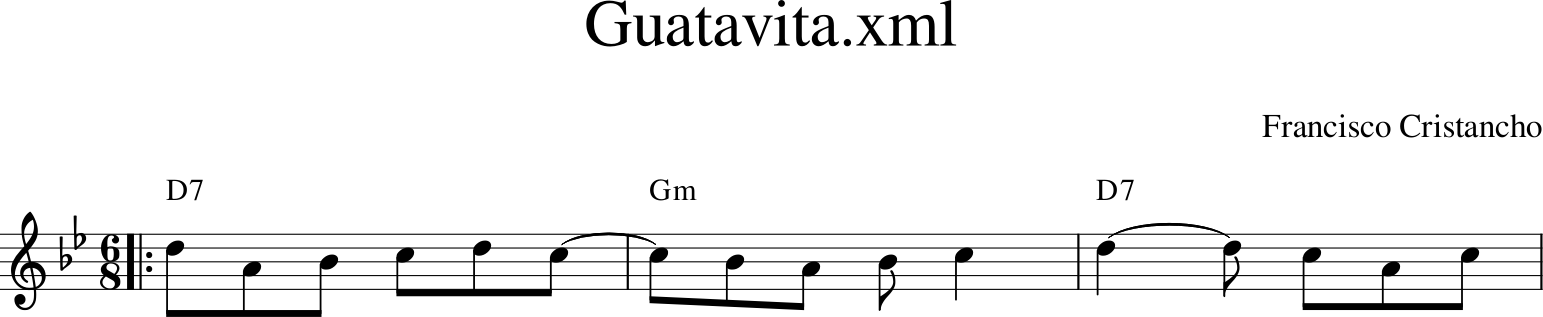

40


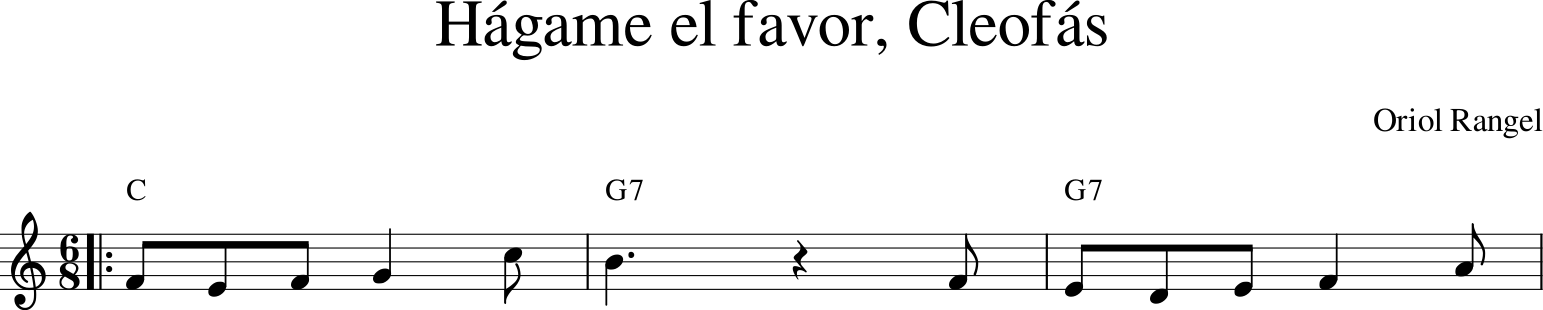

41


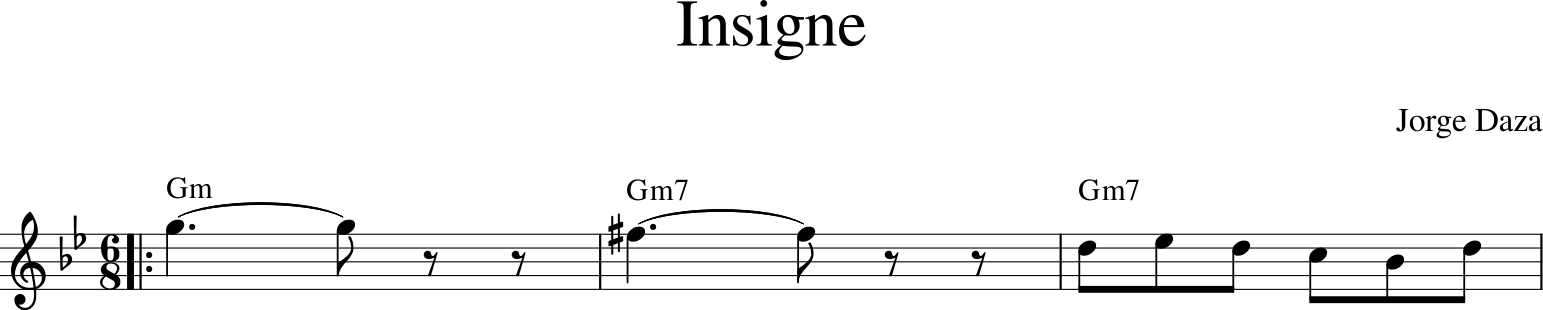

42


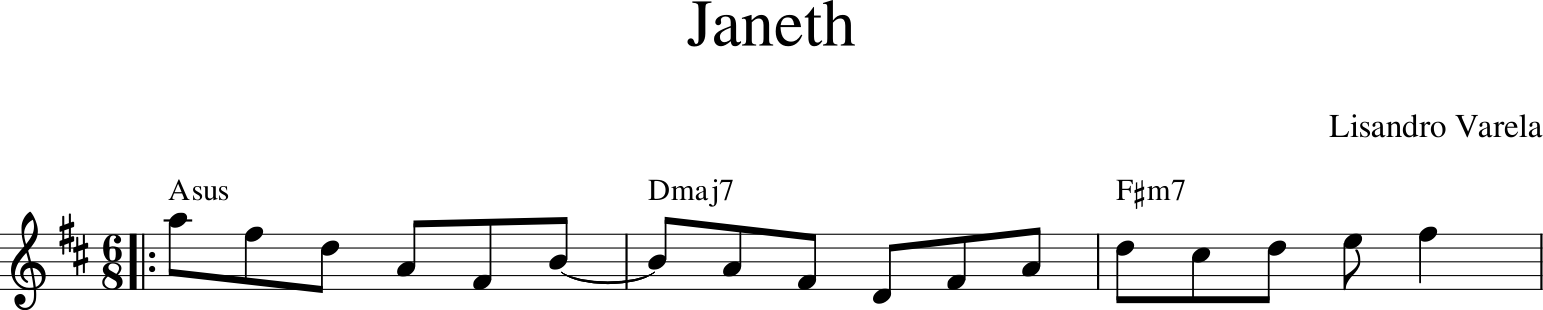

43


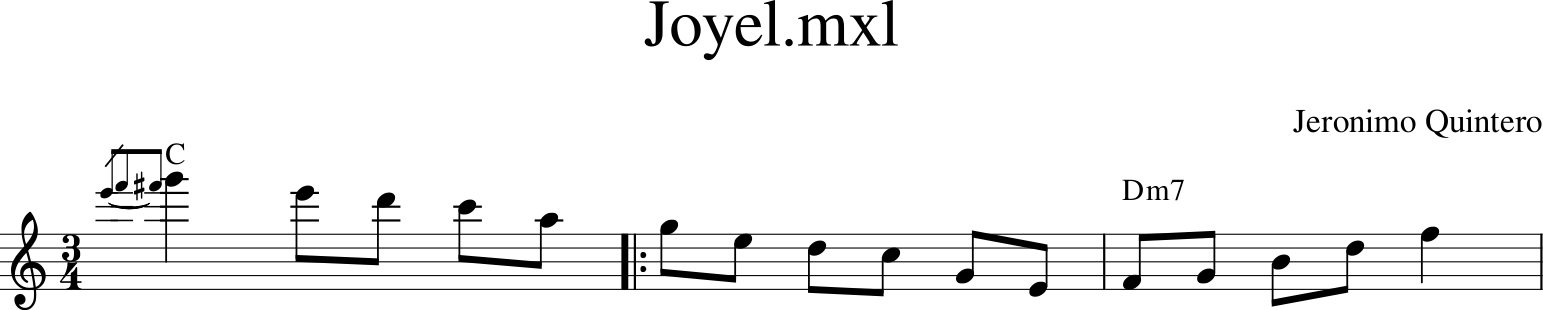

44


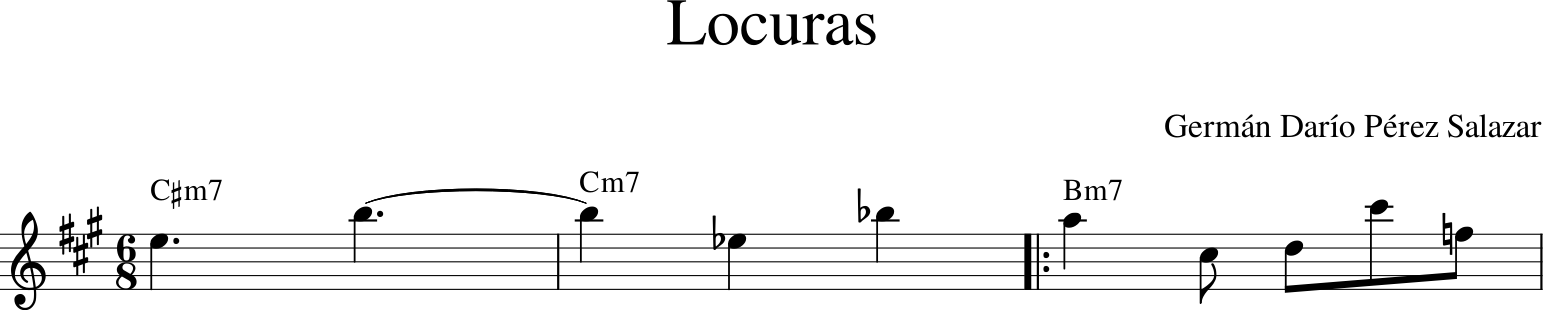

45


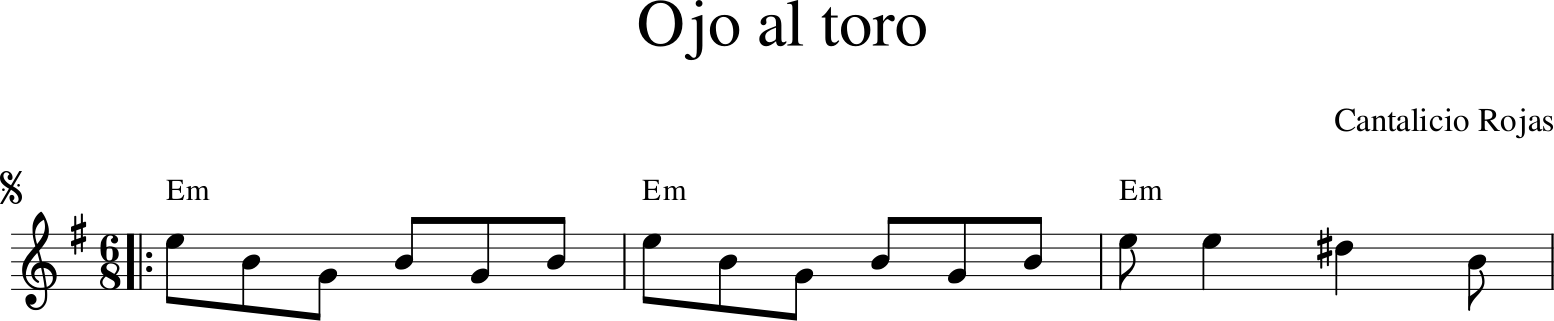

46


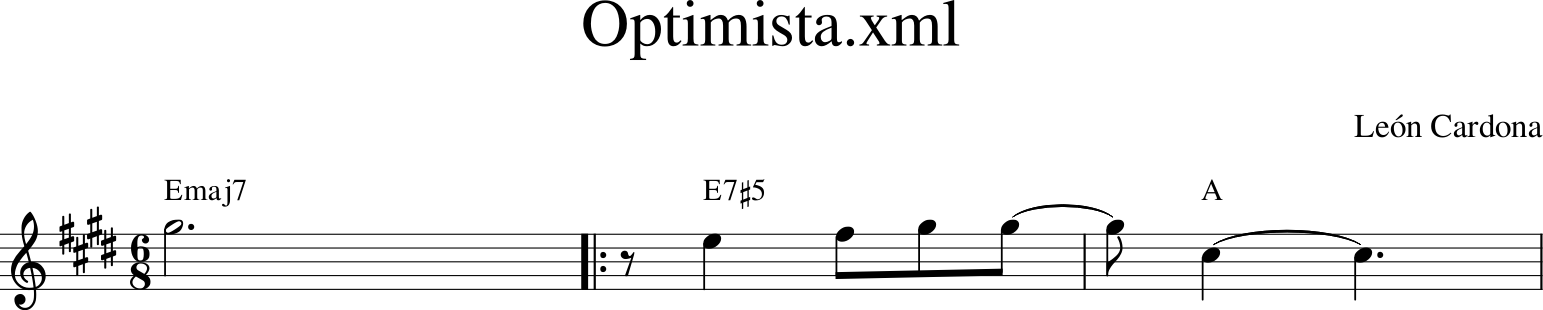

47


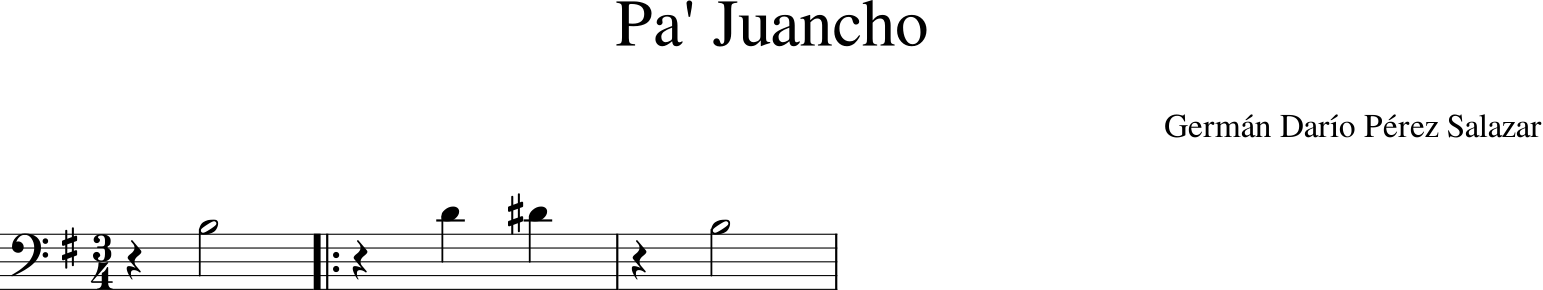

48


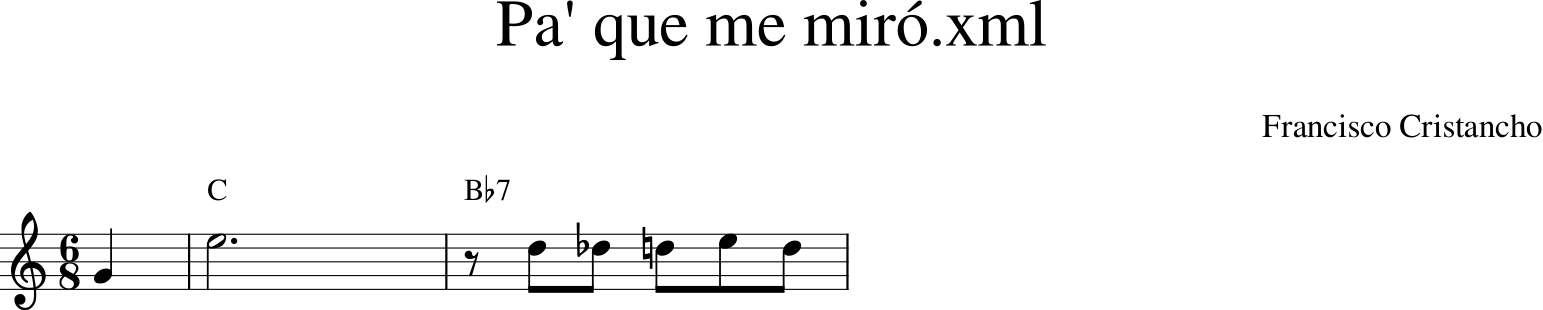

49


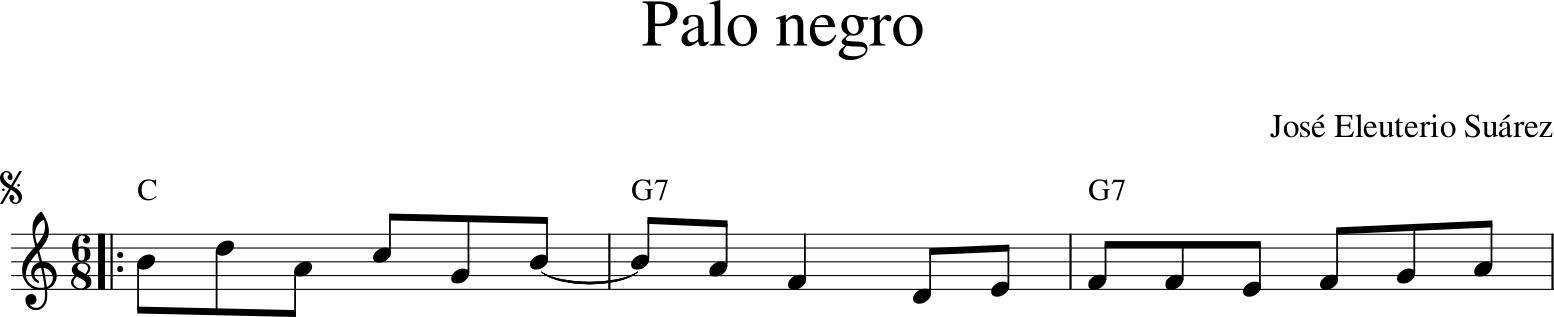

50


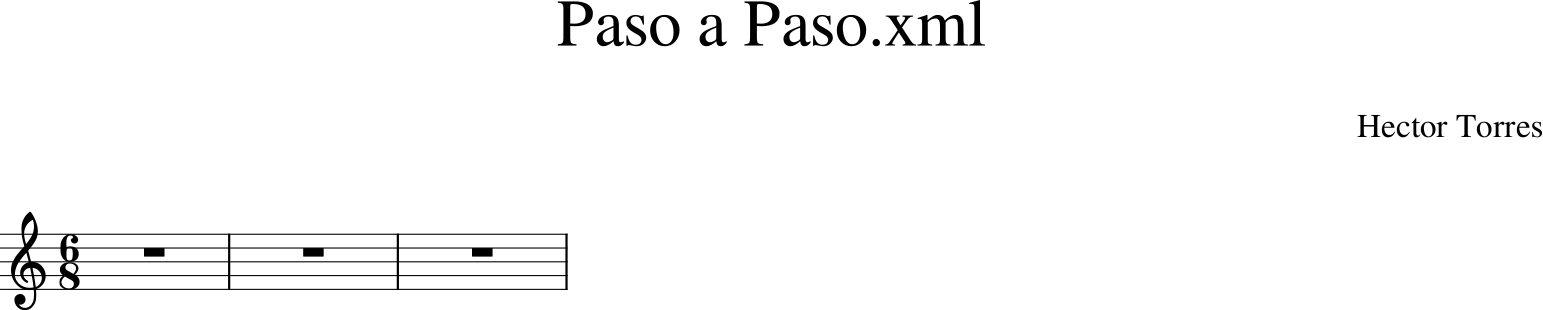

51


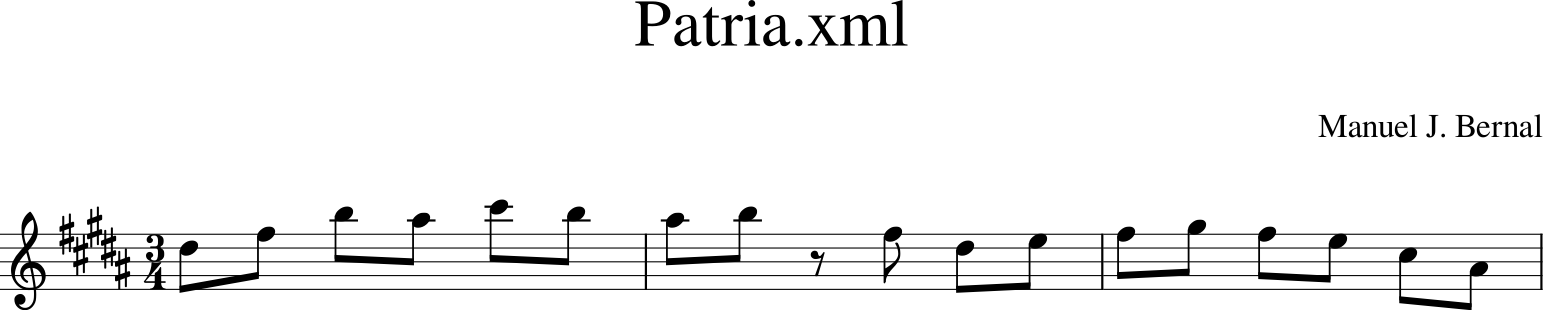

52


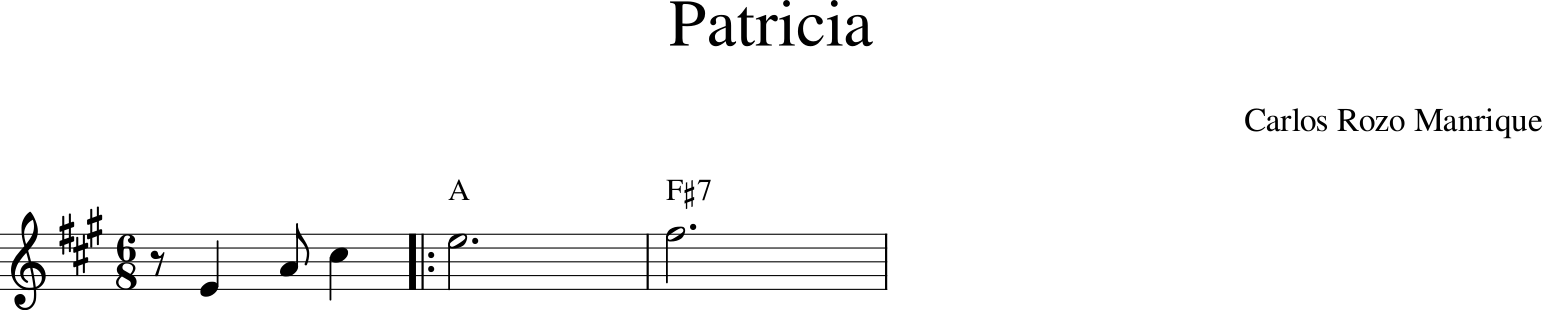

53


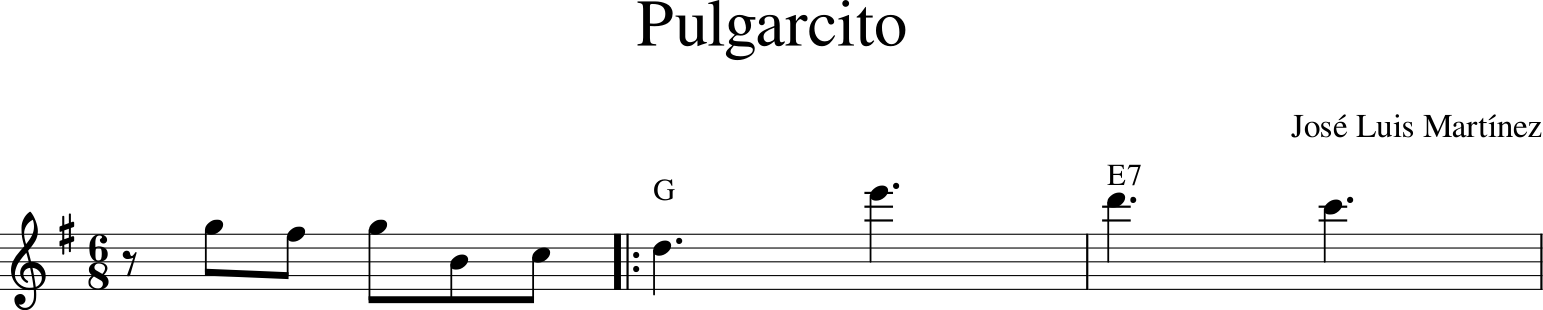

54


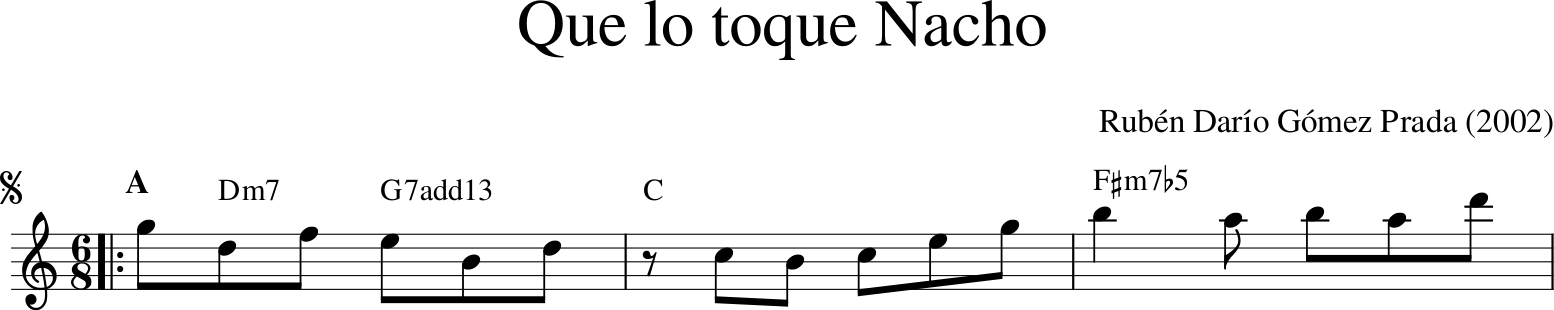

55


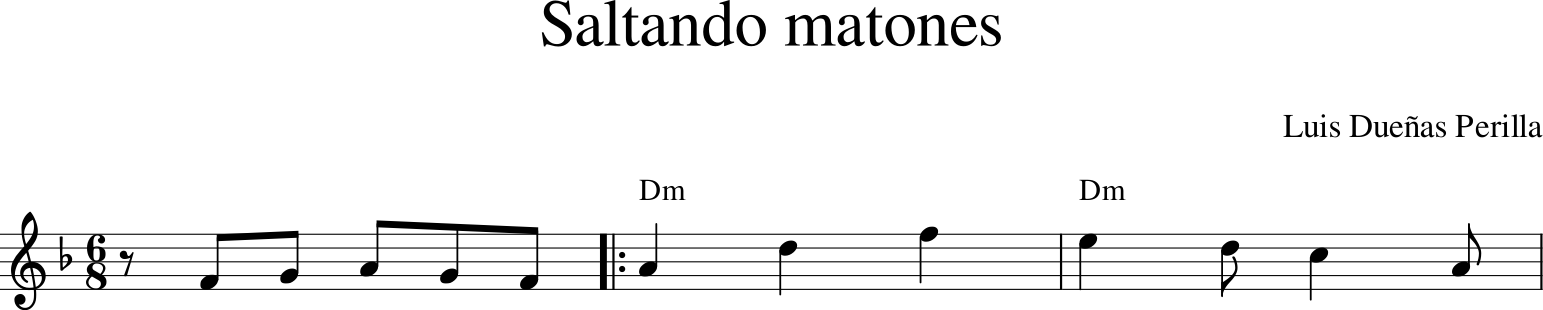

56


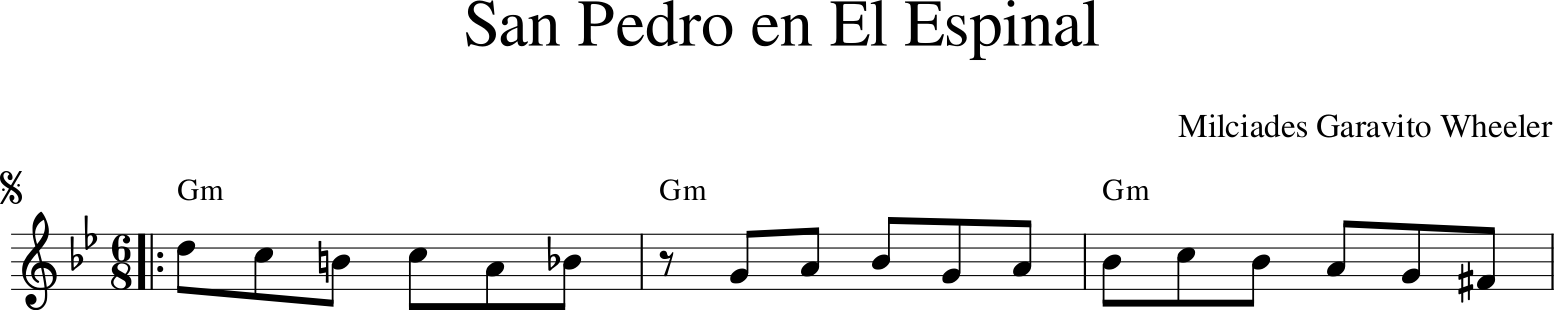

57


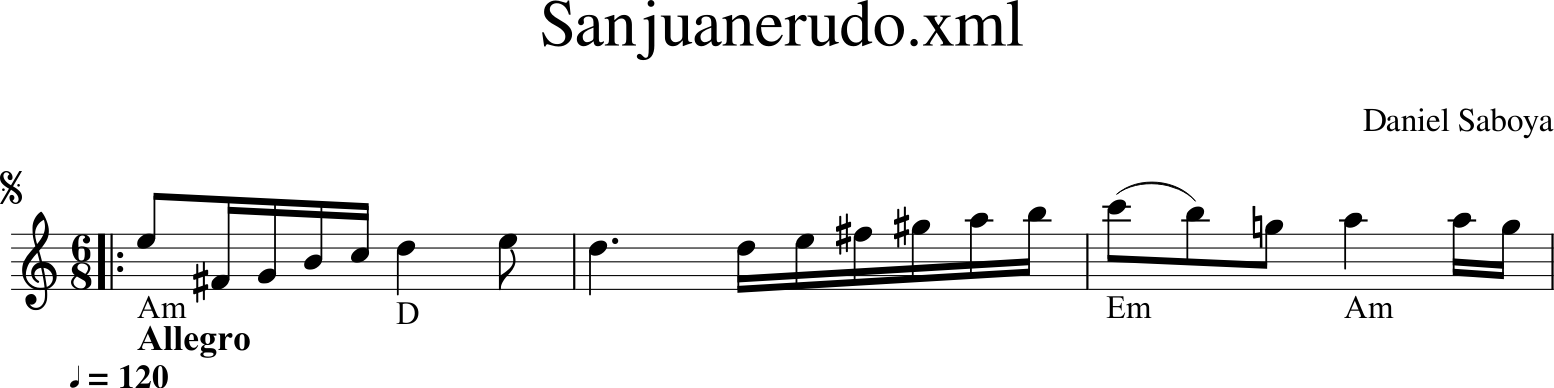

58


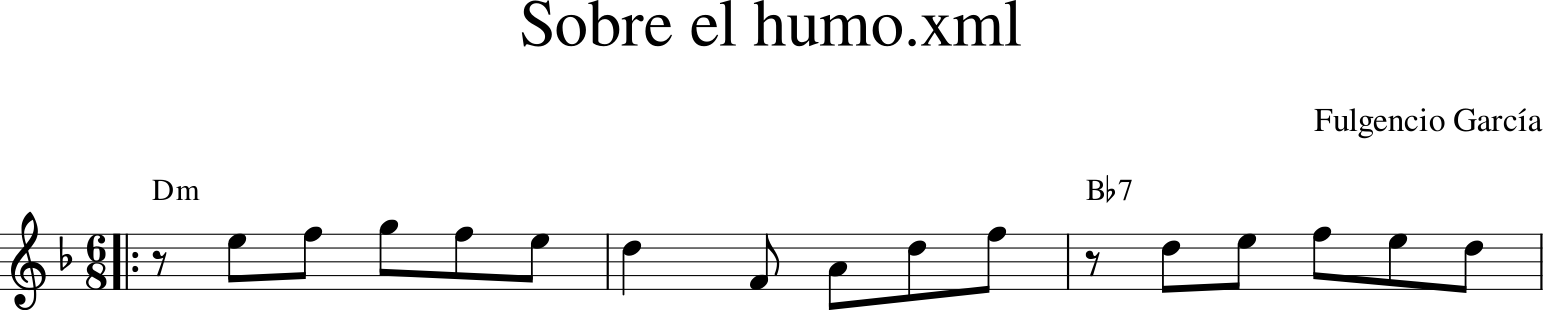

59


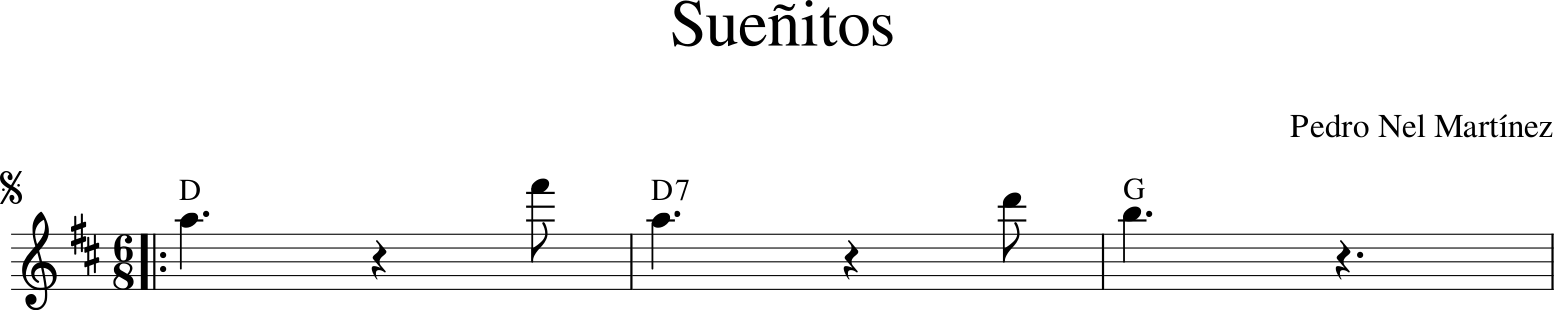

60


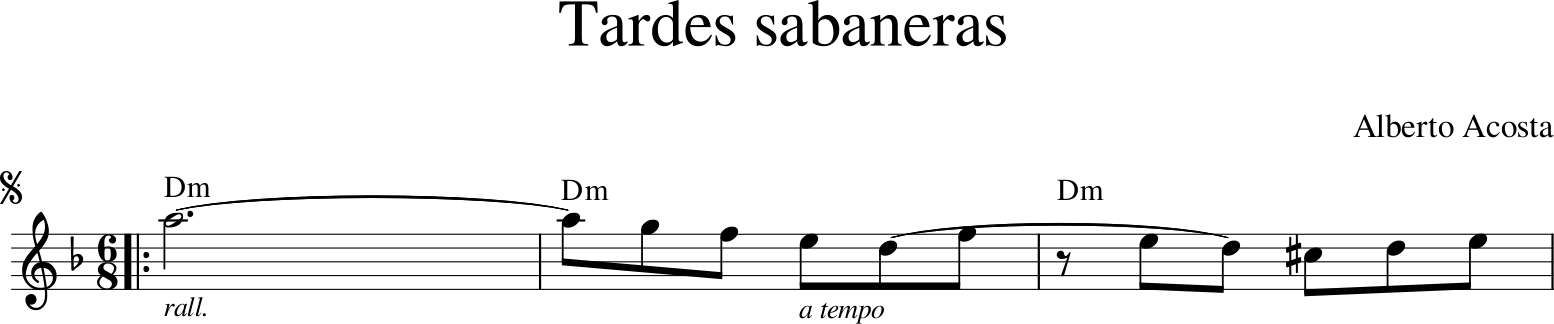

61


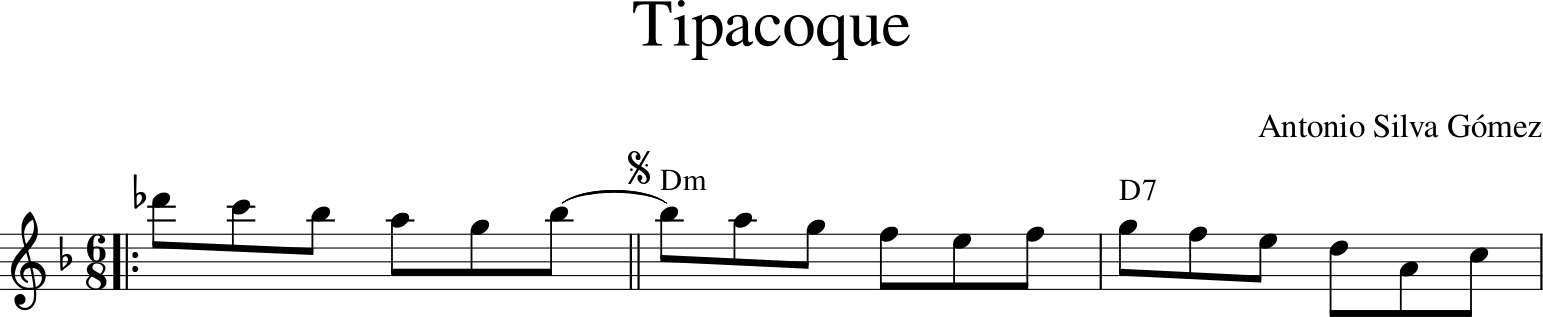

62


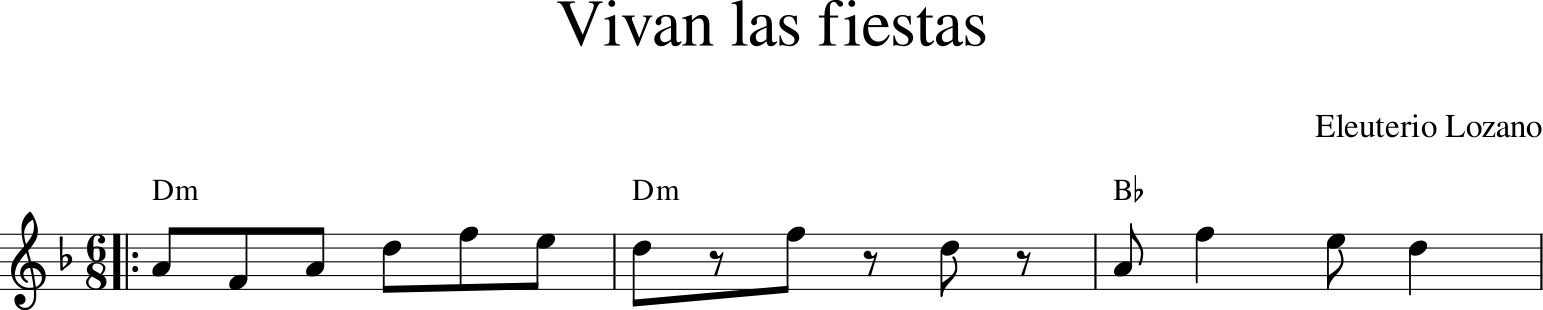

63


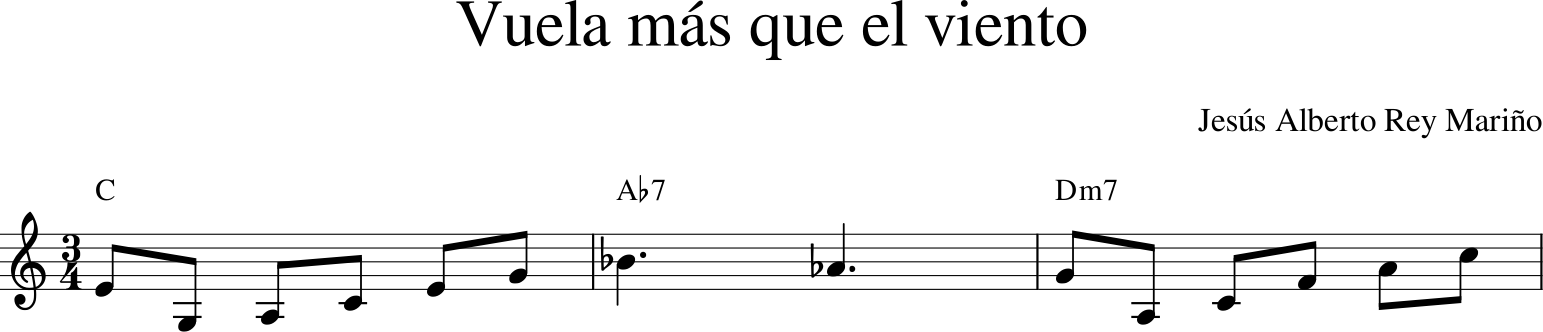

64


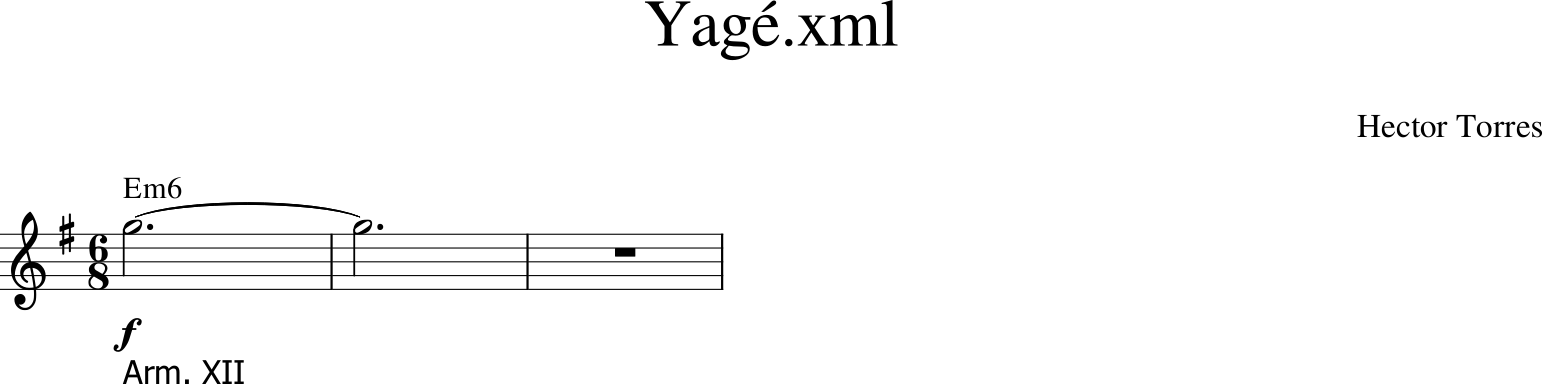

In [32]:
#Imprimir fragmento de cada archivo en el directorio
os.path.supports_unicode_filenames
#dir=dir[20:24]
contador=0
for file in dir:
    f=os.path.join(dataDirectory + os.sep, file)
    f=os.path.normpath(f)
    os.path.exists(f)
    
    try:
        contador=contador+1
        print(contador)
        f=music21.converter.parse(f)
        excerpt = f.measures(1, 3) 
        excerpt.show()
    except:
        print(file+" No se pudo imprimir")

# Helsinki

In [35]:
#import path # to change the jupyter notebook working directory
import sys
import os
import more_itertools
import yaml
sys.path.insert(0, 'C:\\Users\\ferna\\Documents\\Desarrollo\\Python\\patternfinder')
# set path if necessary
env['directoryScratch'] = r'C:\\tmp' 
#Desactiva logging de finder.py (líneas 90-92) y de algorithms.py (líneas98-100)

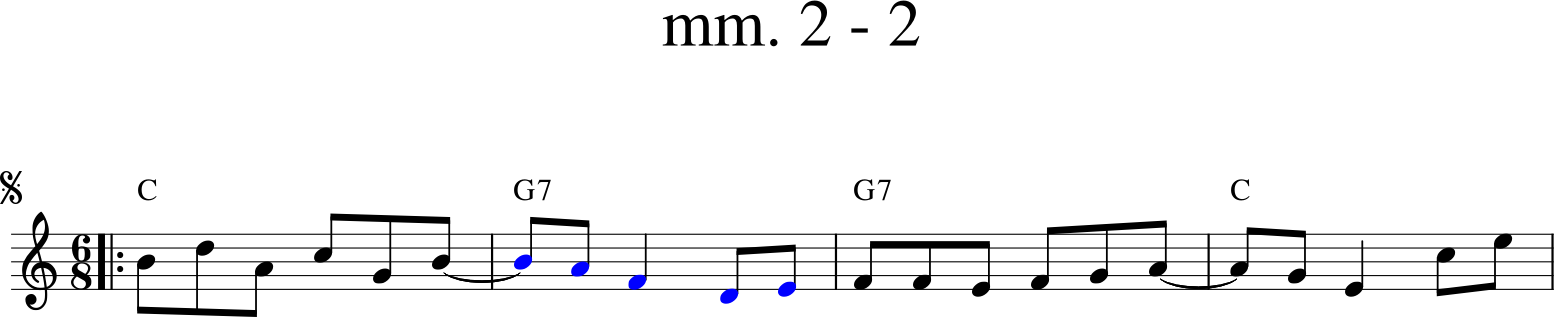

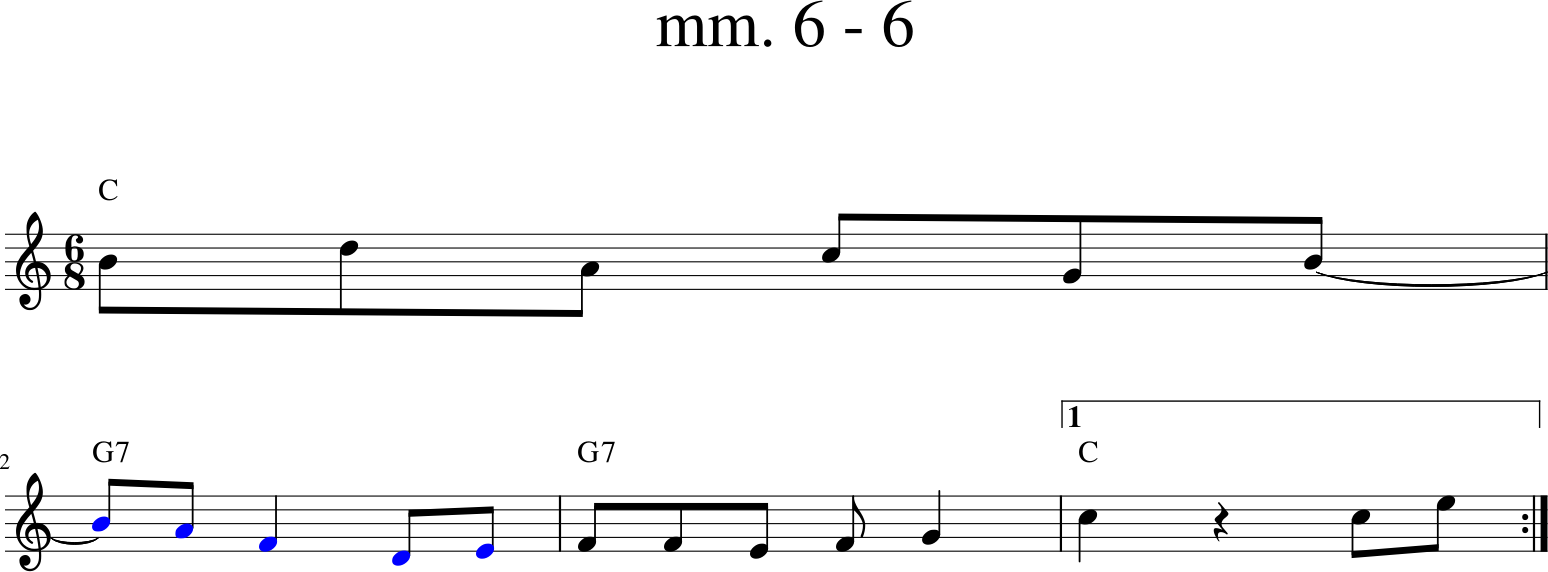

In [36]:
#Buscar patrón en una obra
from patternfinder.geometric_helsinki import Finder
pattern = music21.corpus.getWork('Palo negro')
pattern=music21.converter.parse(pattern)
source = pattern
pattern = pattern.measures(2,2)
#source.show()
#pattern.show()
finder = Finder(pattern, 
source,
#algorithm='P2'
threshold = 0.95
#scale = 'warped',
#Only accepts occurrences of a particular 
#interval_func='generic',
#'semitones'
#pattern_window = 2,
#Similar to 'source_window' but applies to the number of missing notes between any two matched pattern notes.
#source_window = 2
#Limits the search space by limiting the number of intervening notes allowed between any two source notes within the occurrence
)

for occ in finder:
    occ.get_excerpt(left_padding=1, right_padding=2, color='blue').show()

Crear índice

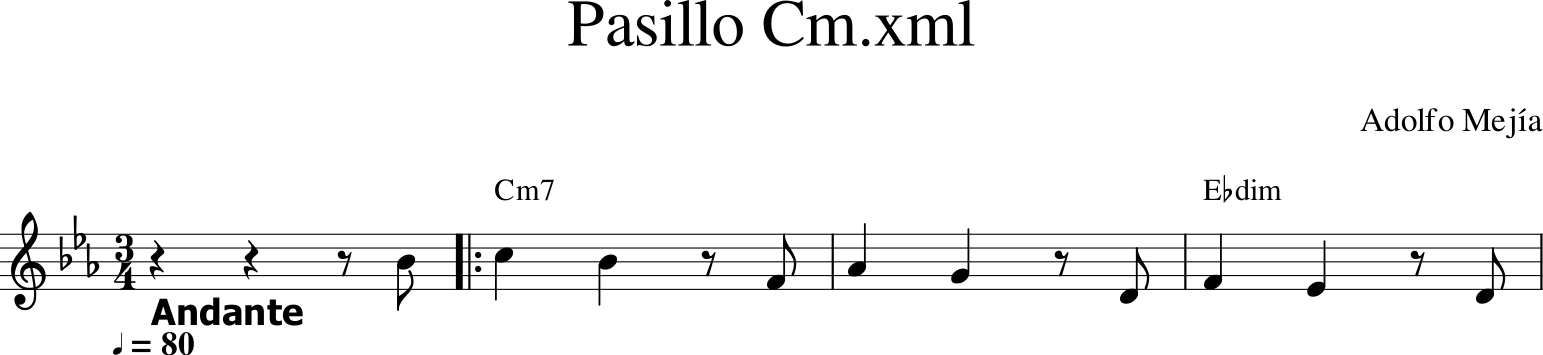

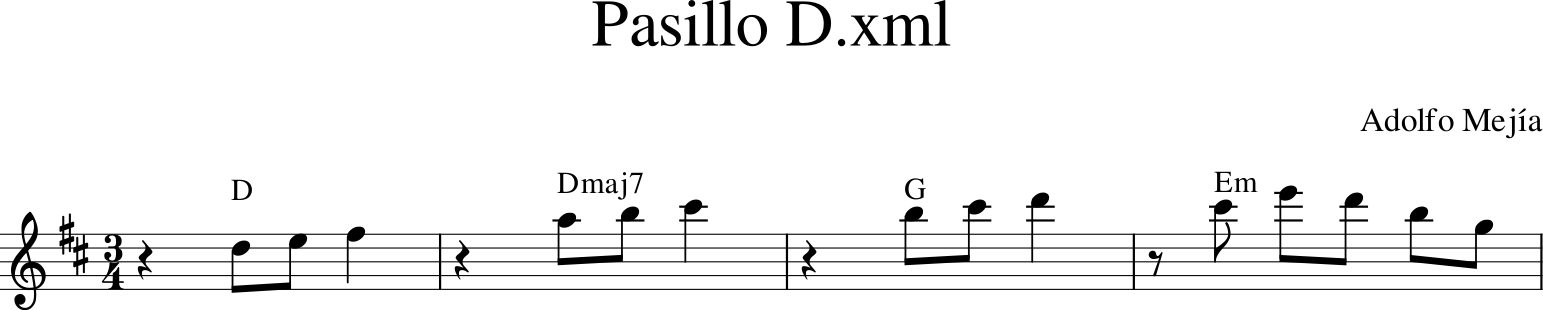

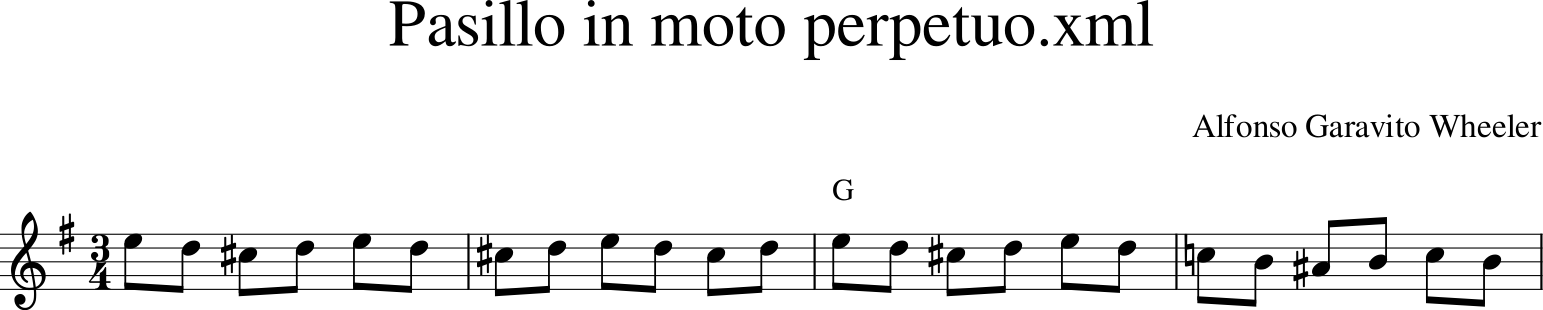

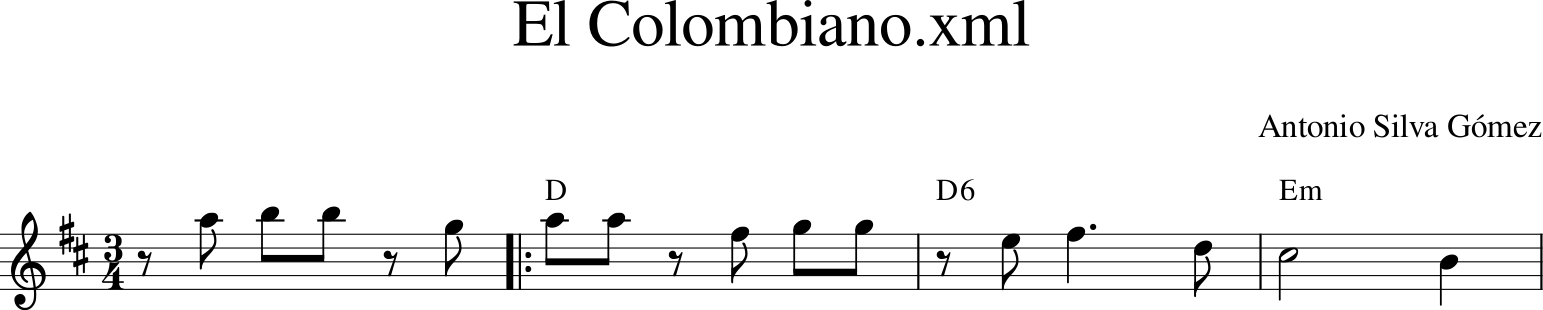

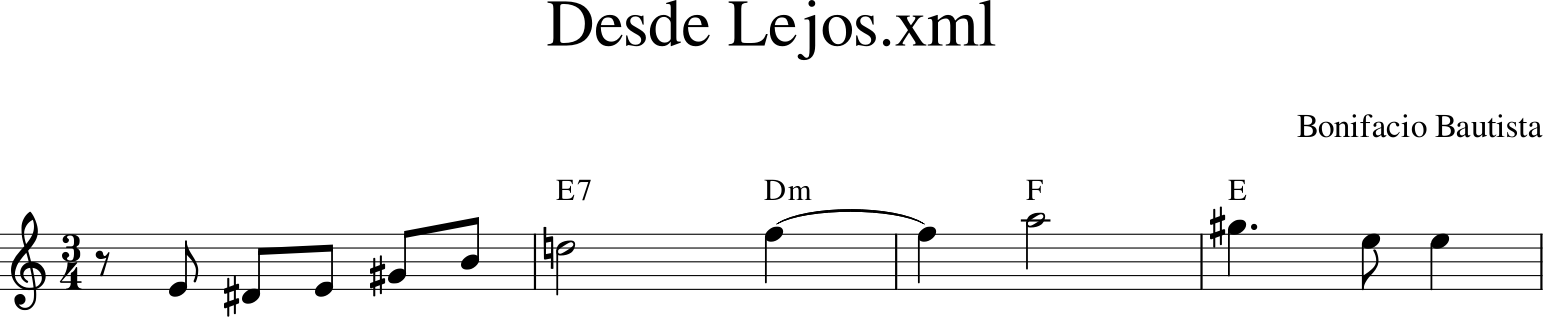

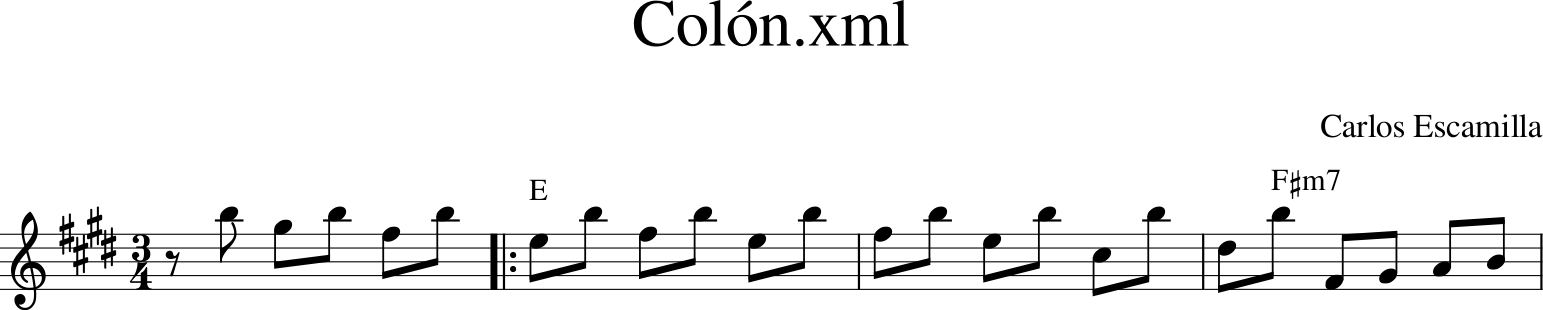

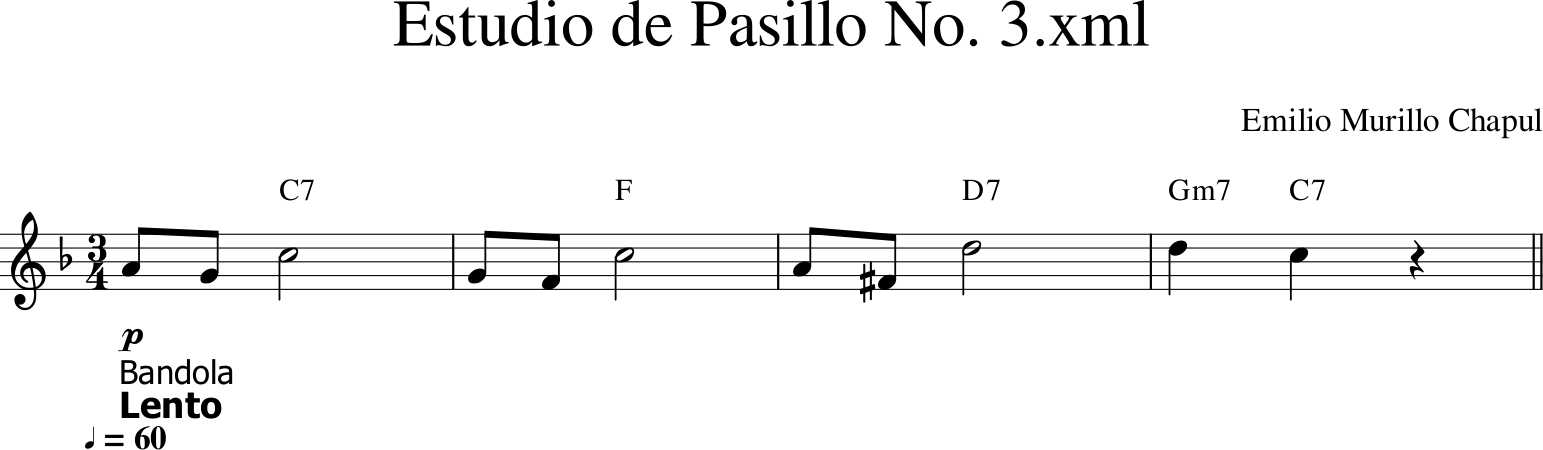

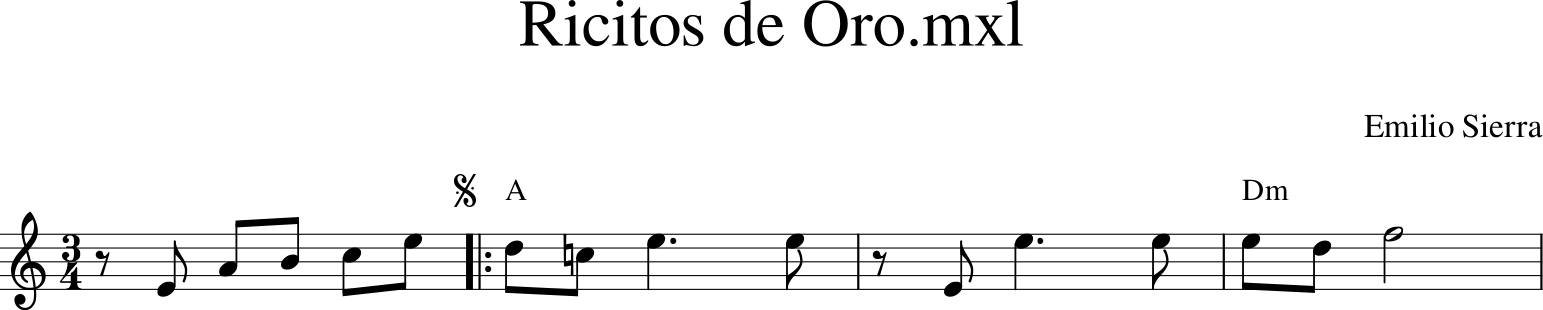

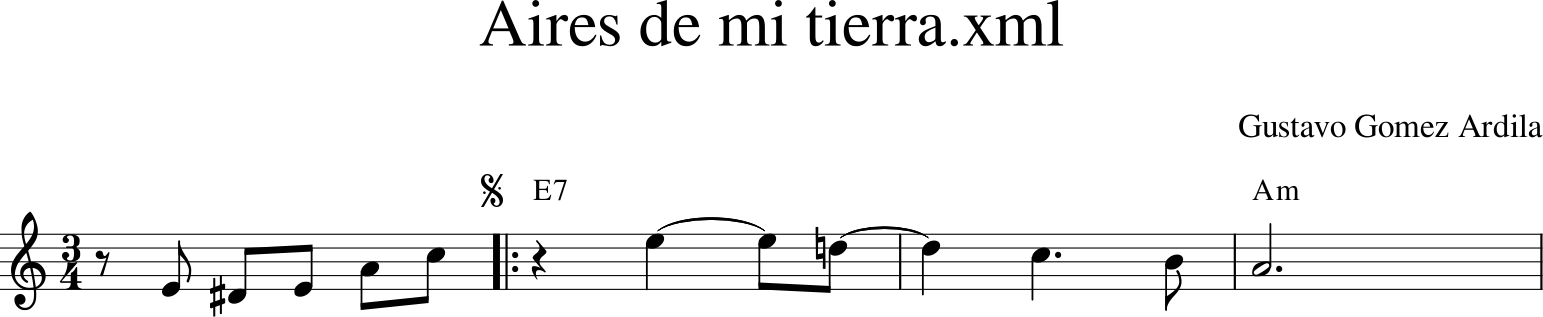

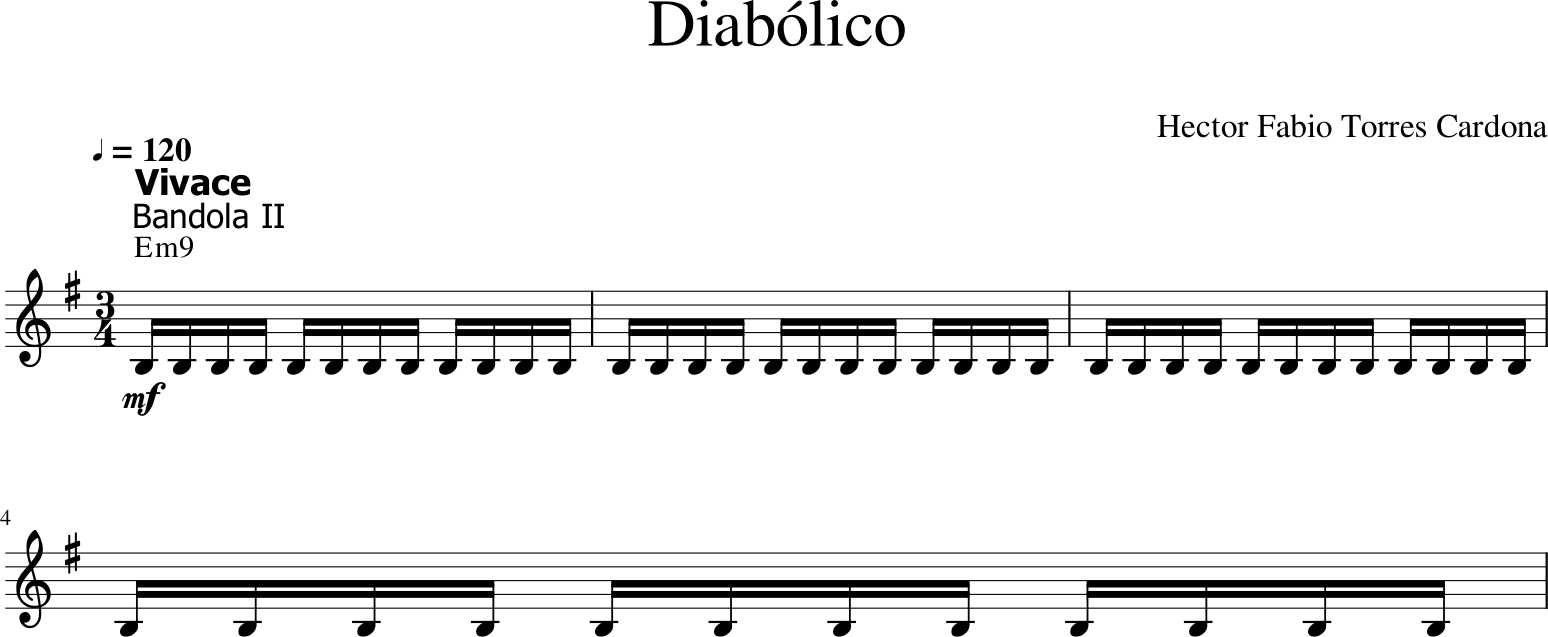

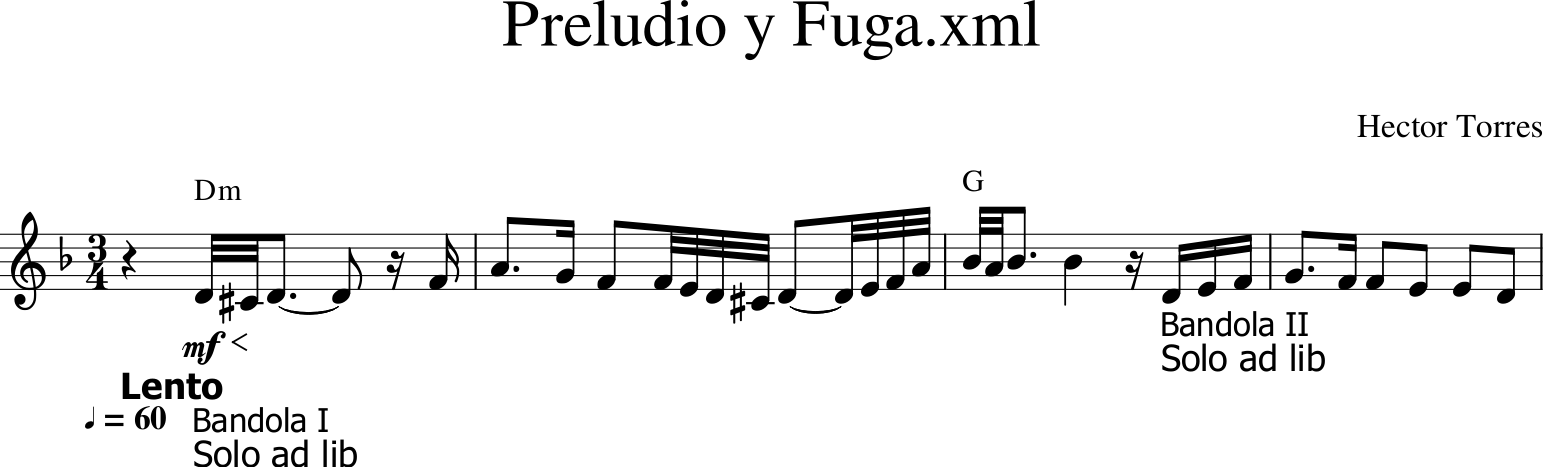

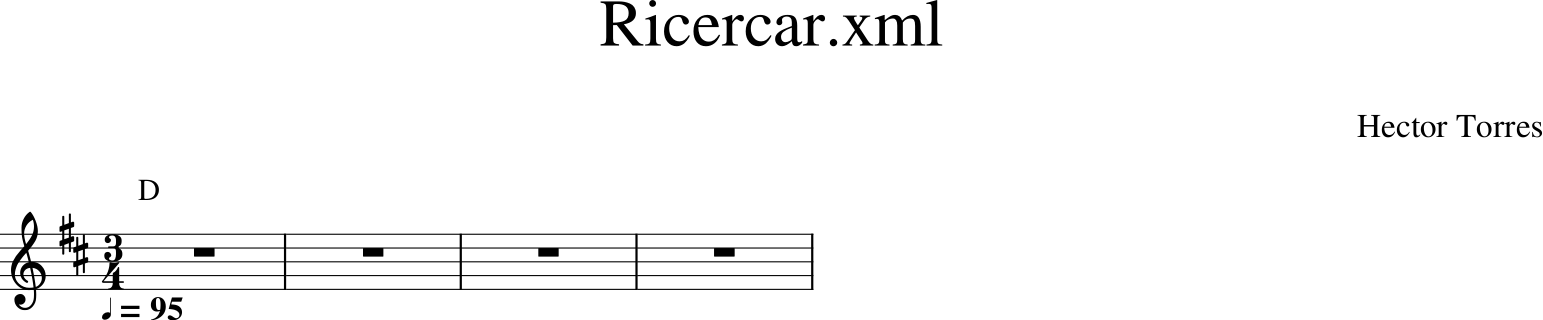

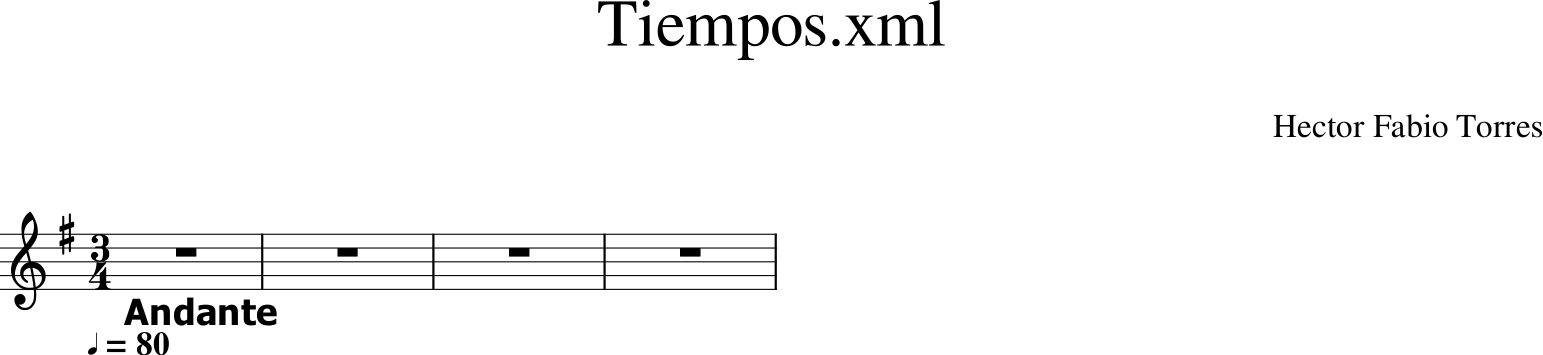

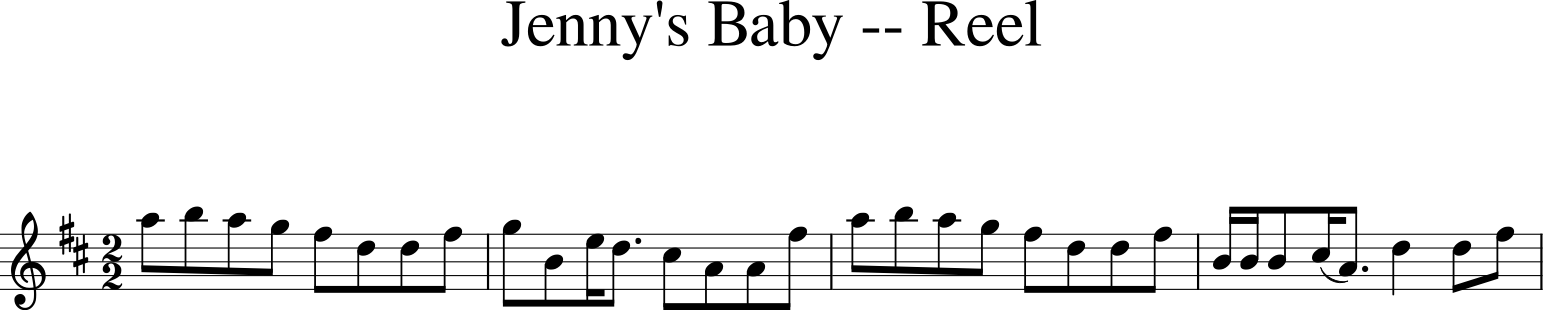

Error en  Joyel


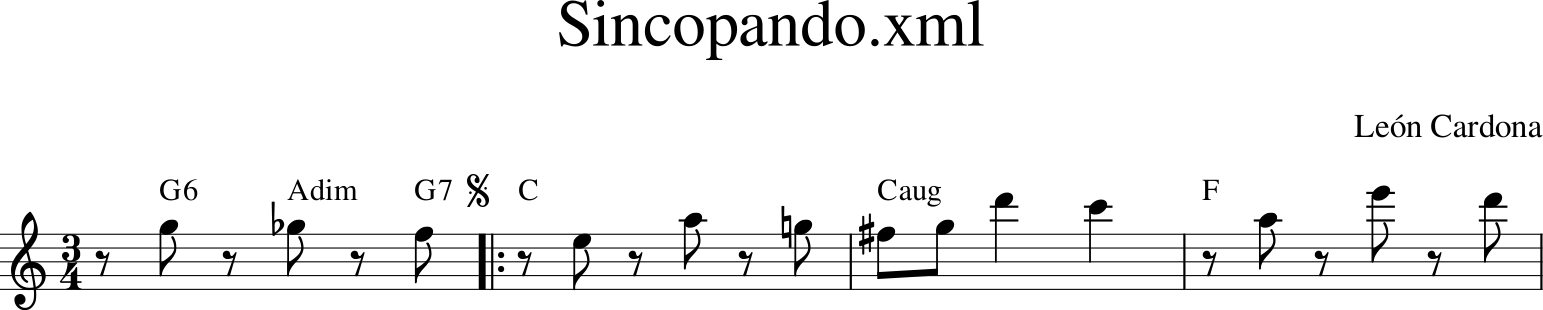

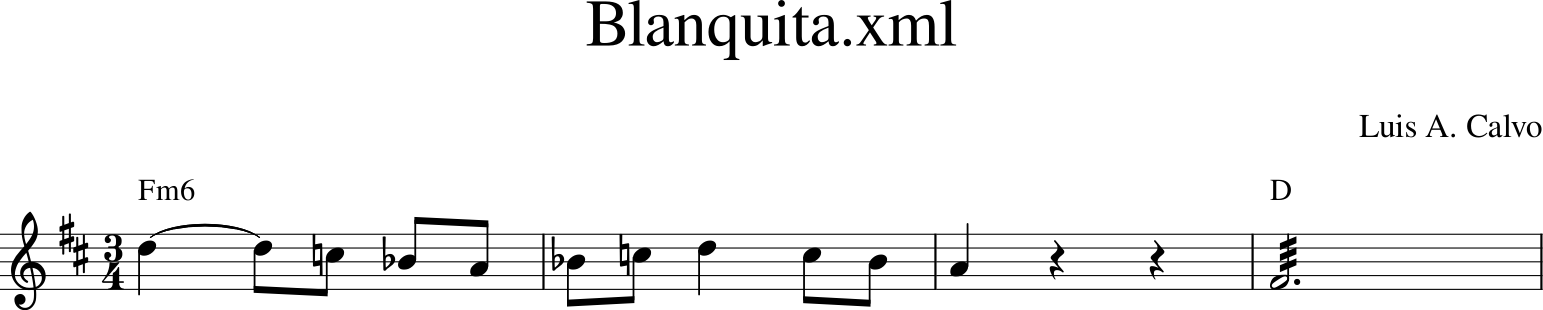

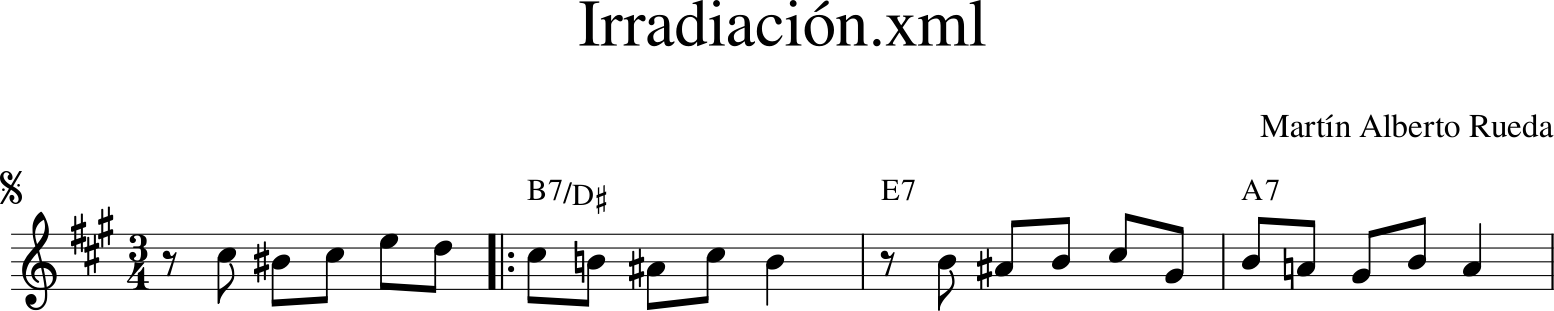

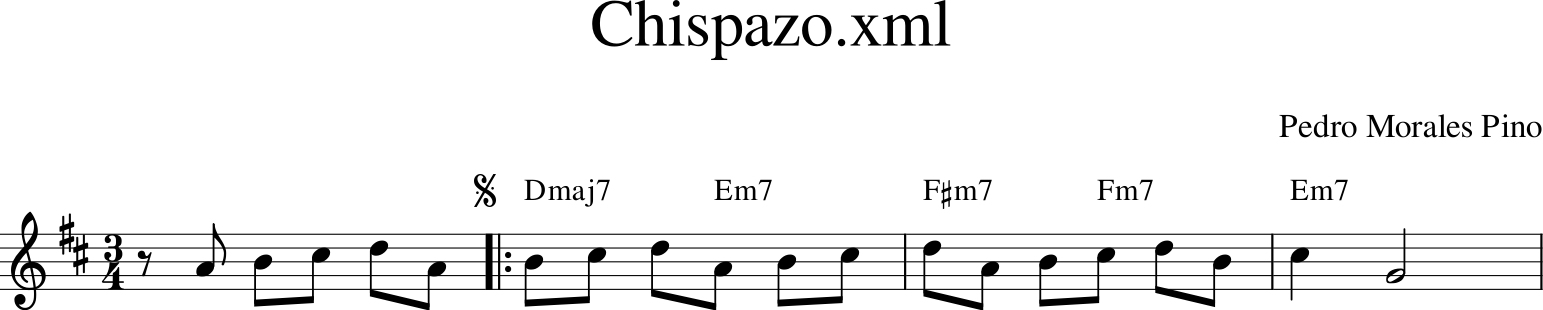

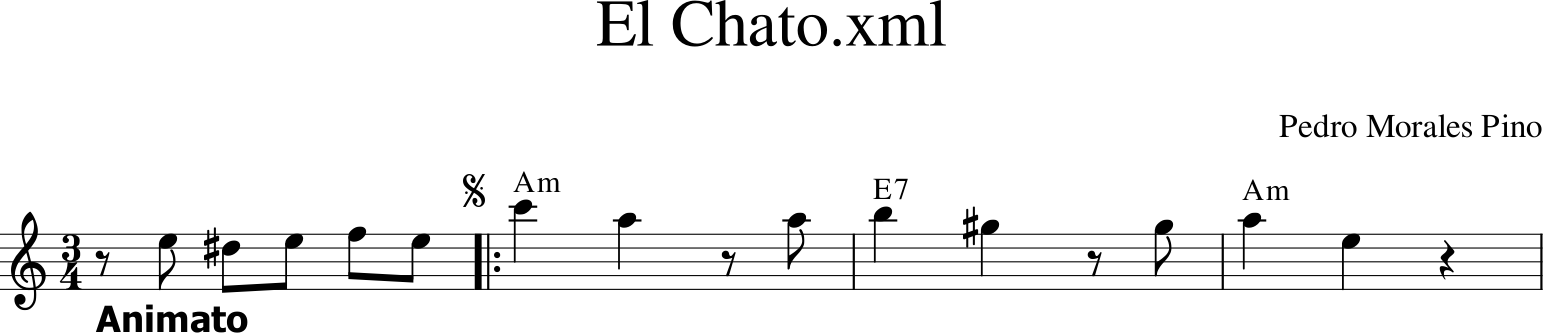

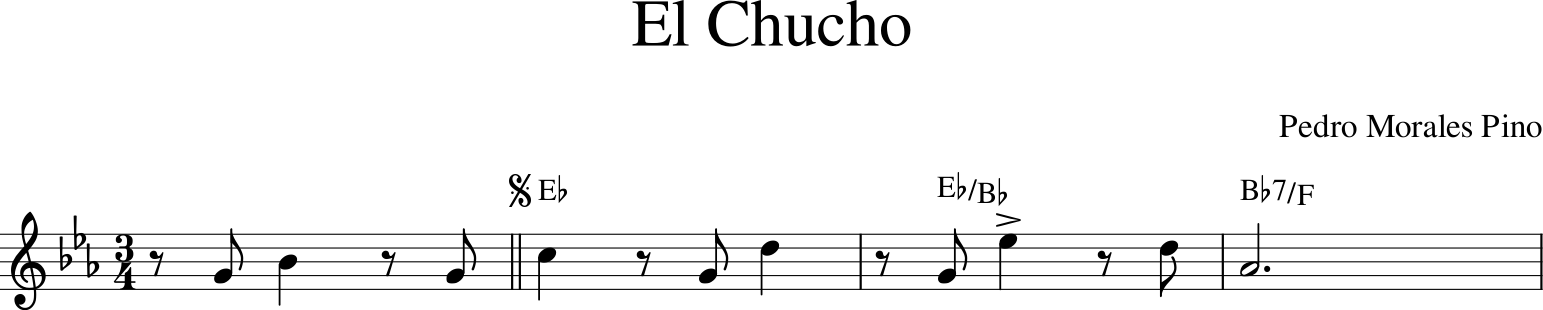

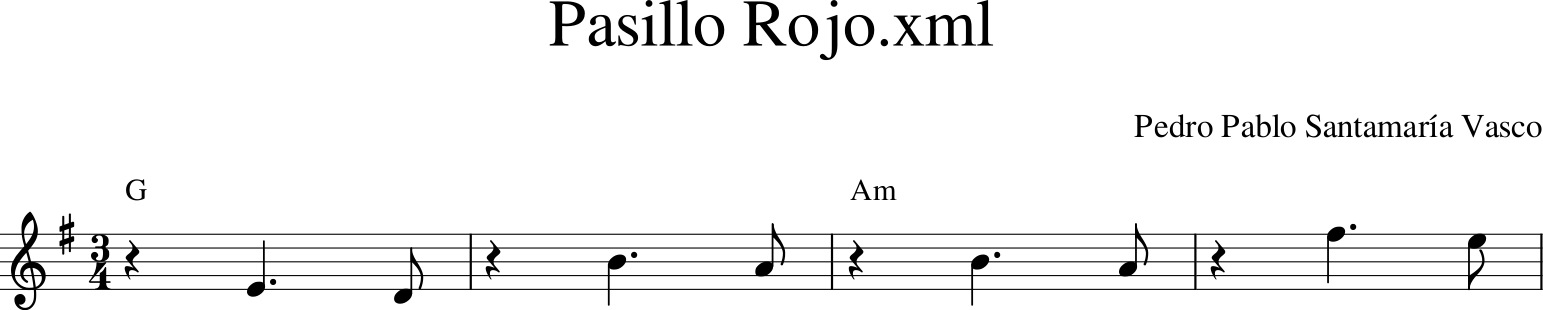

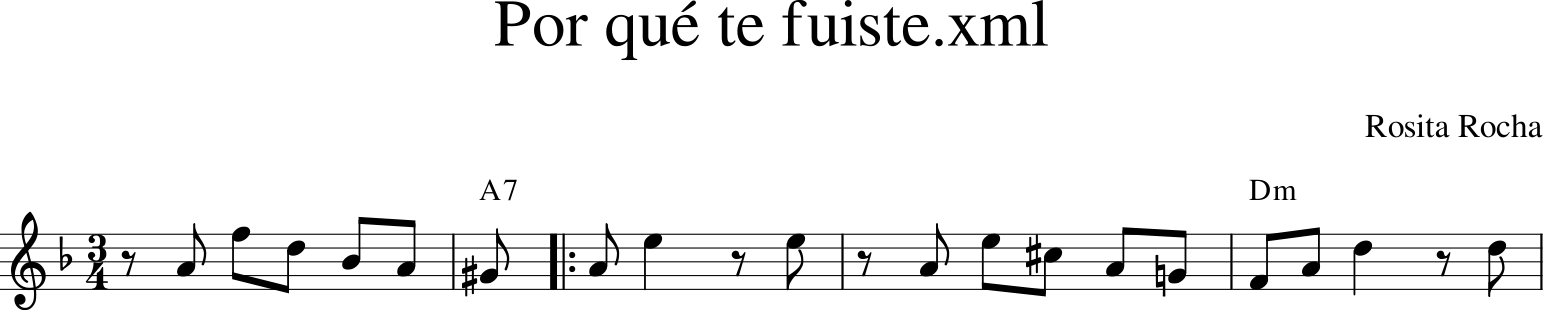

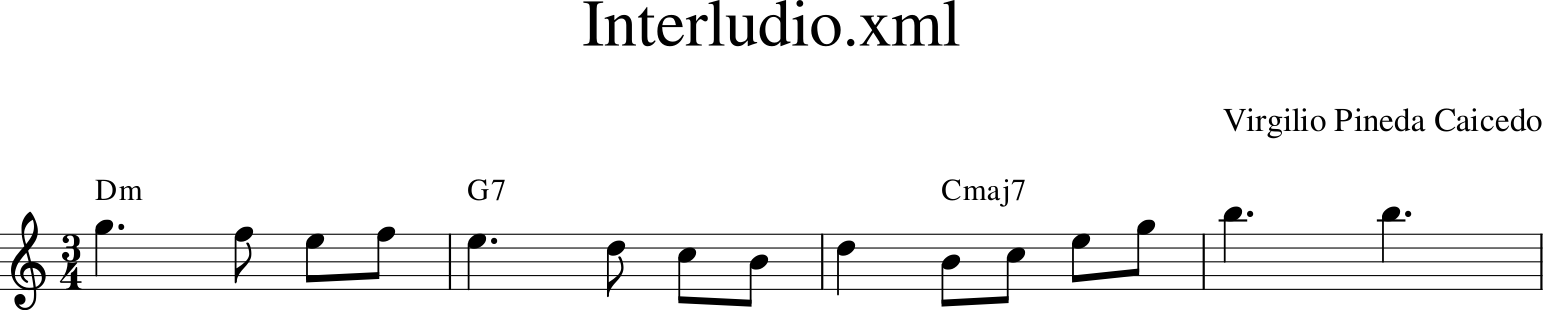

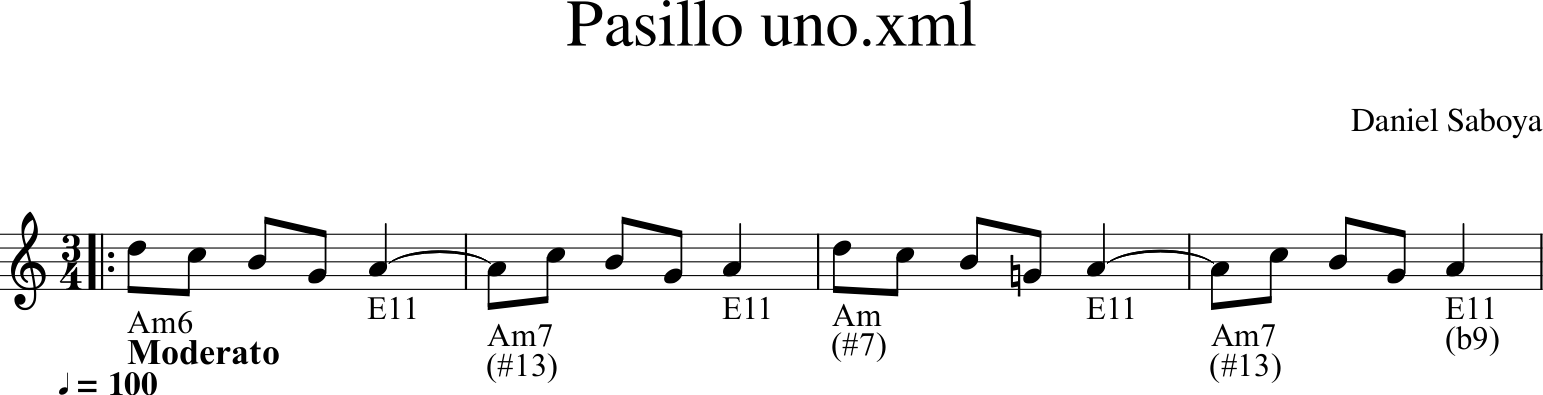

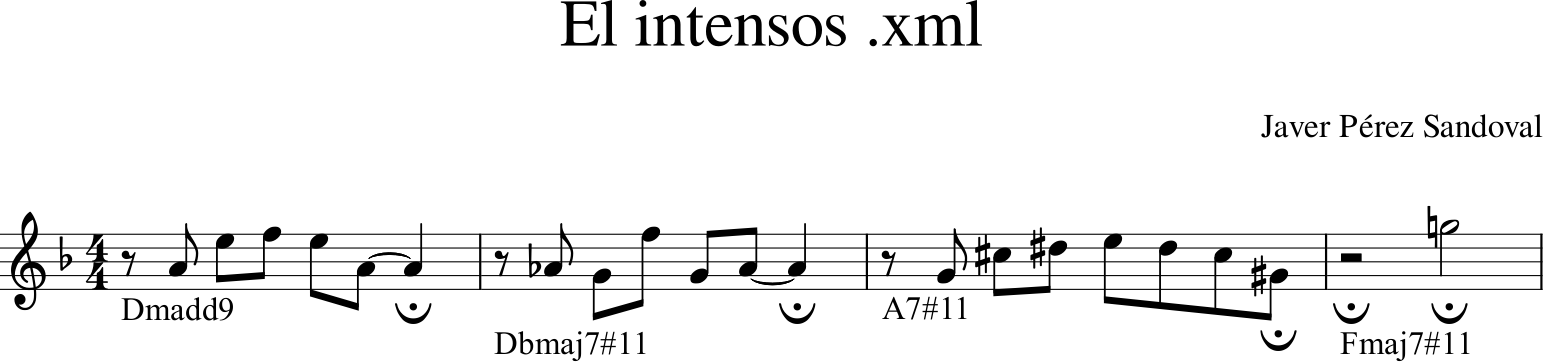

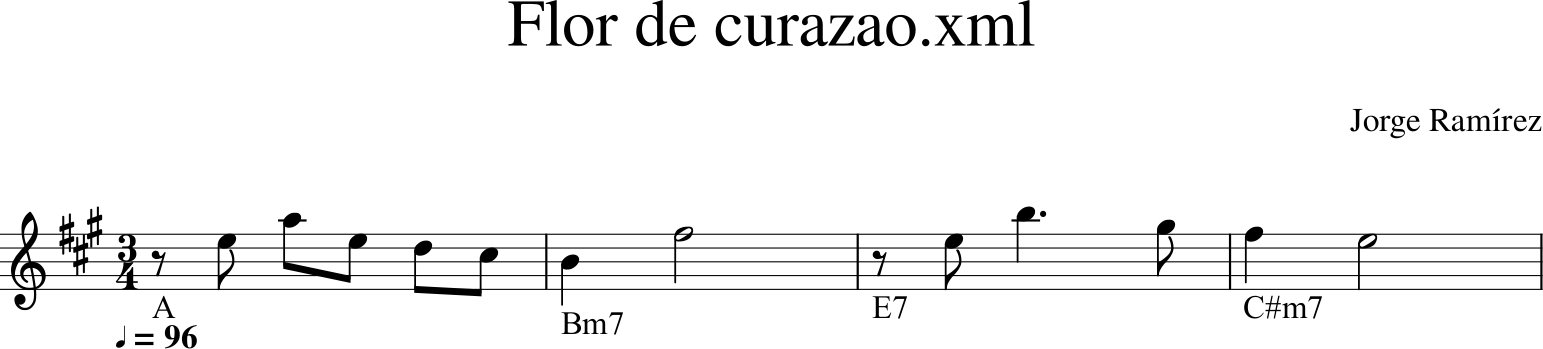

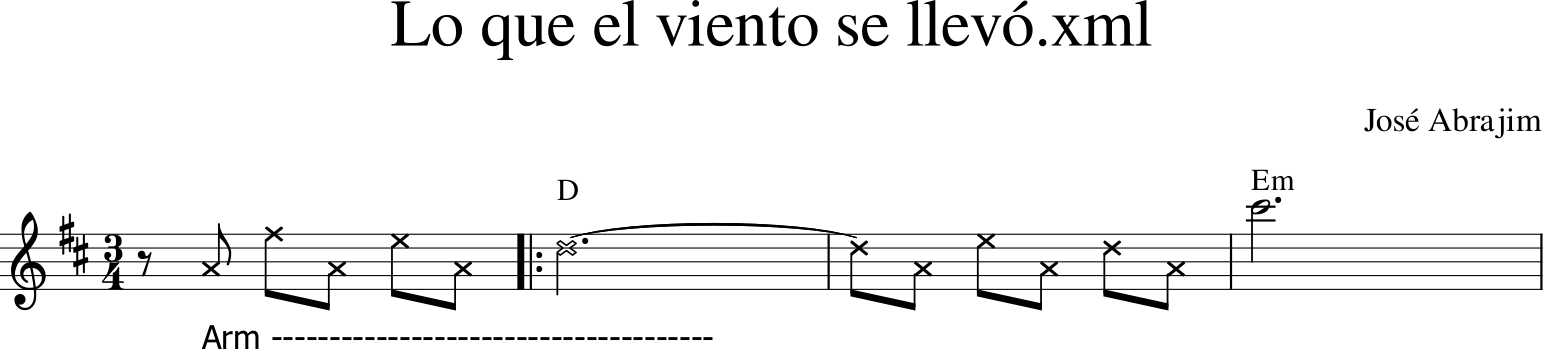

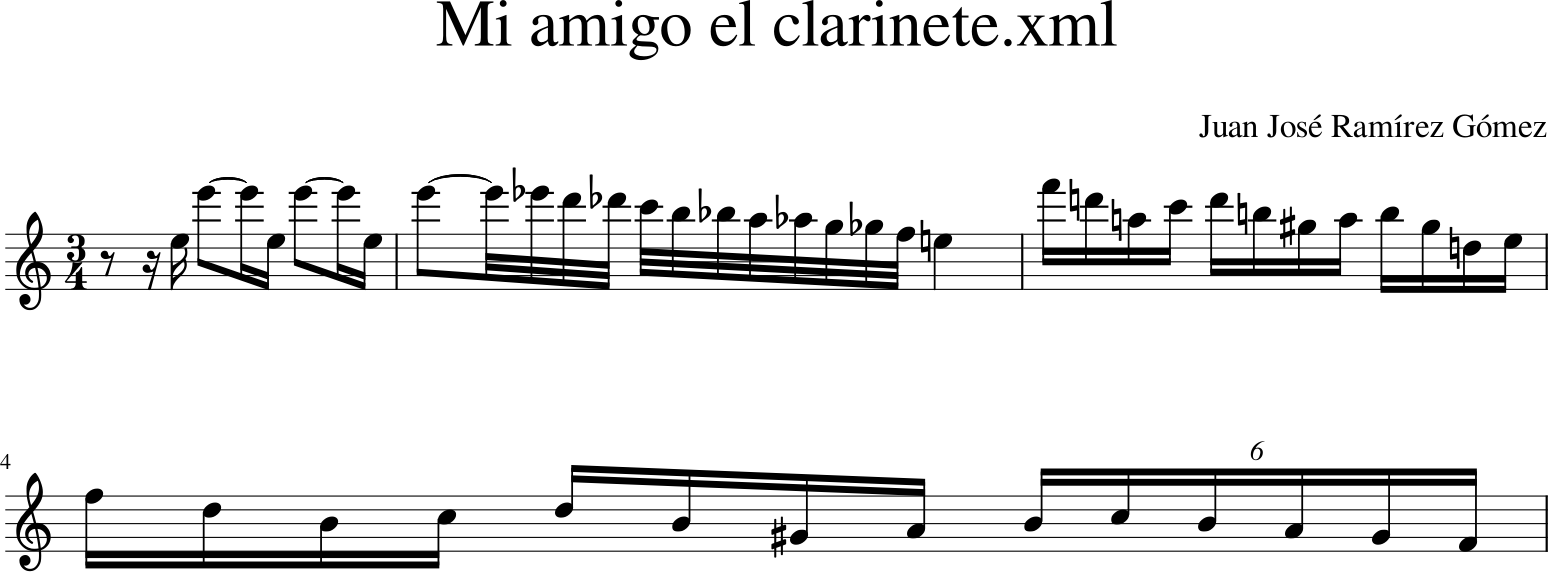

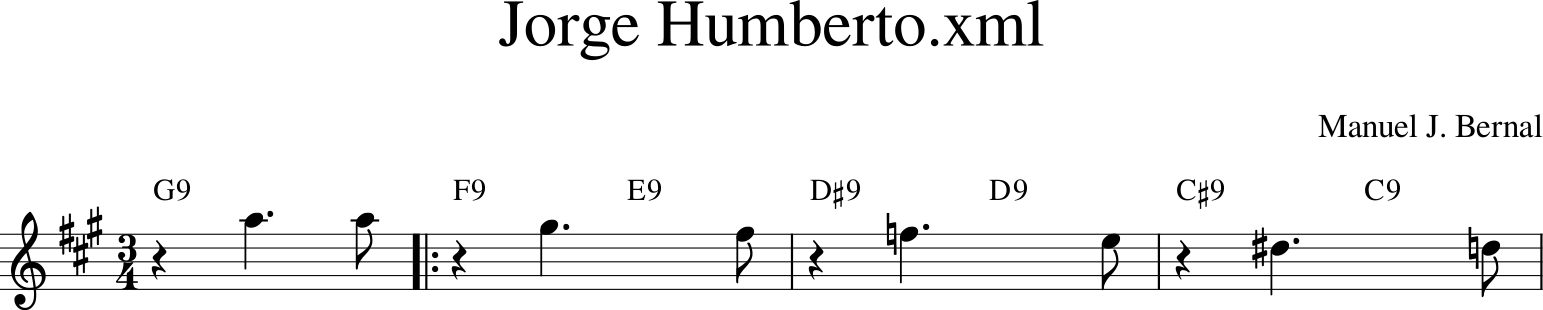

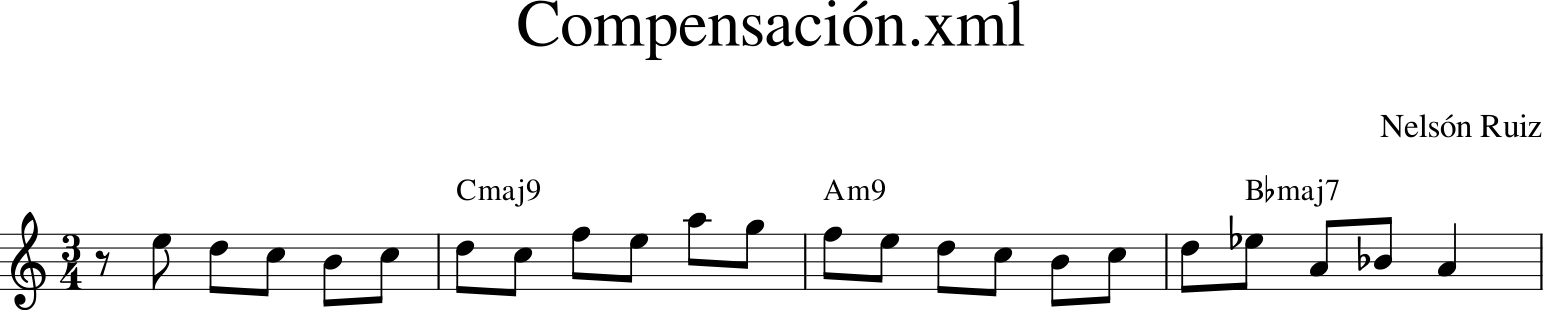

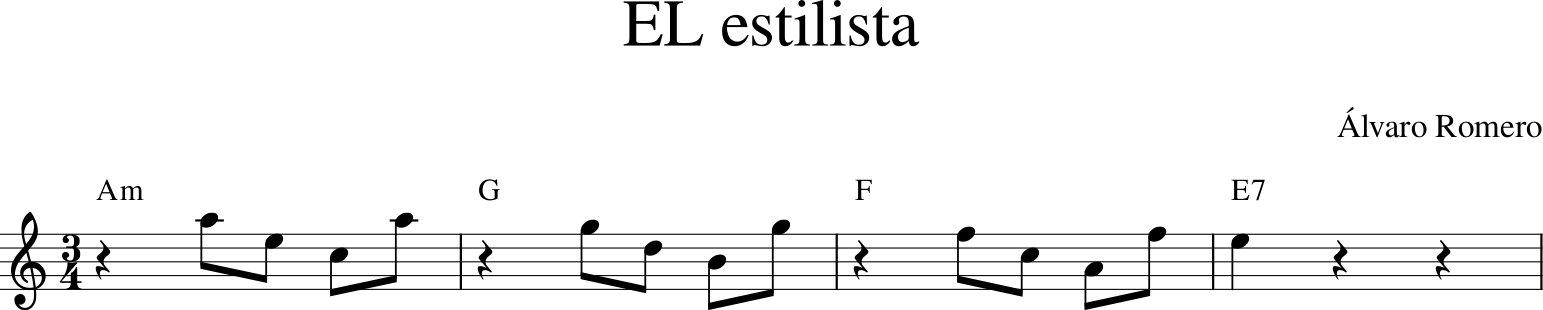

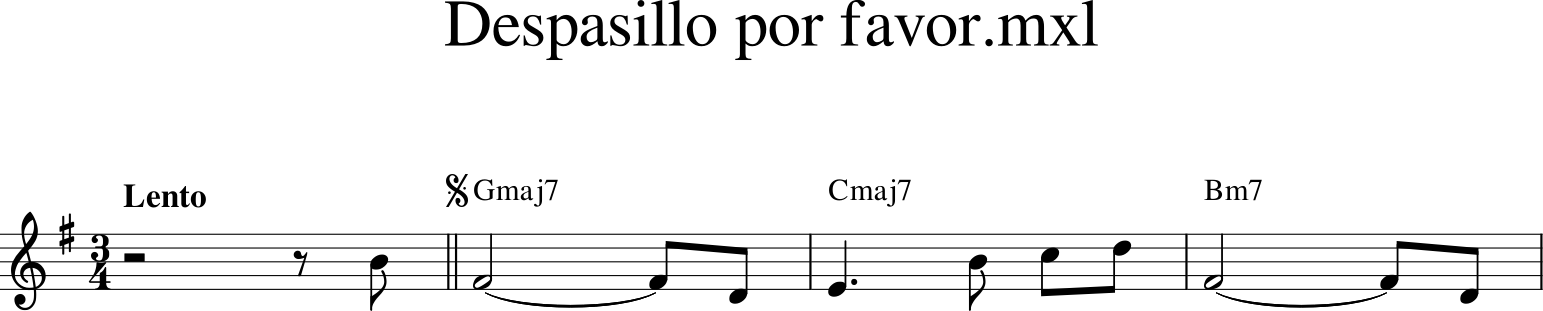

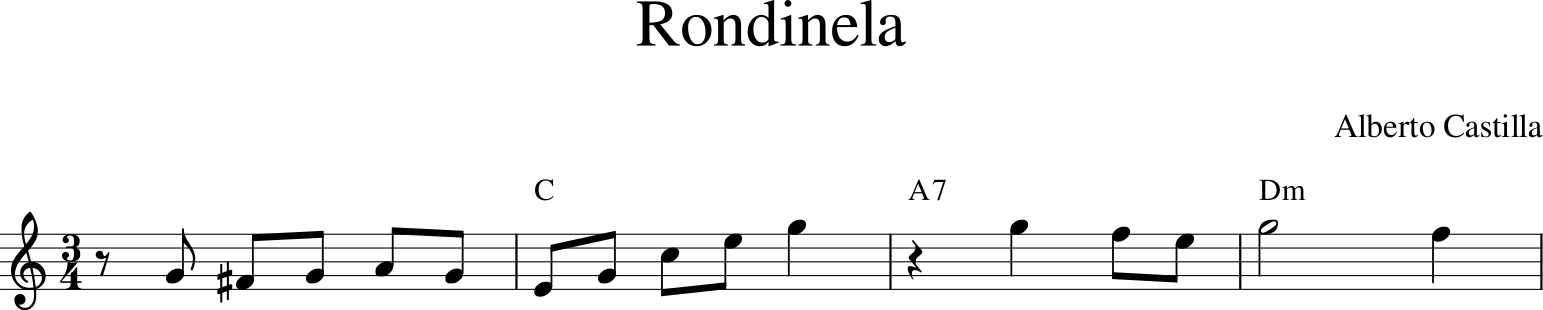

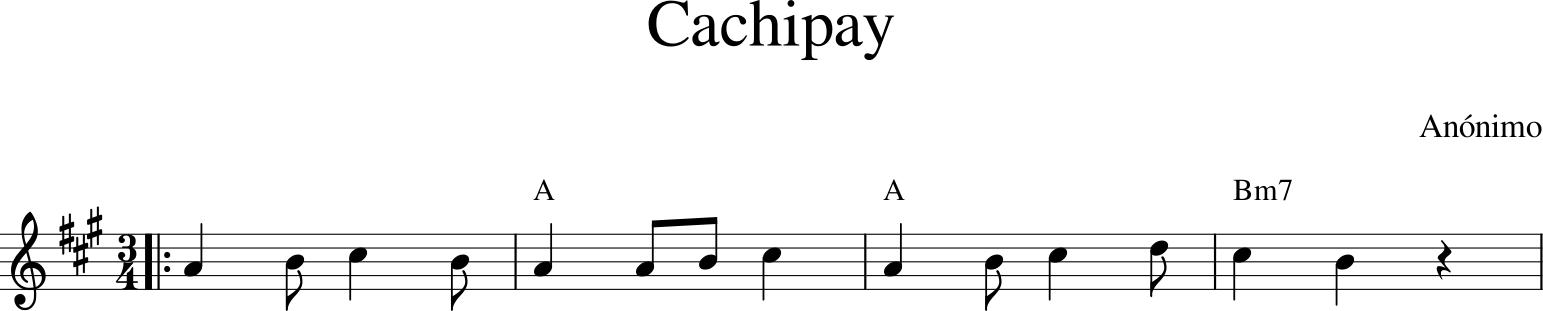

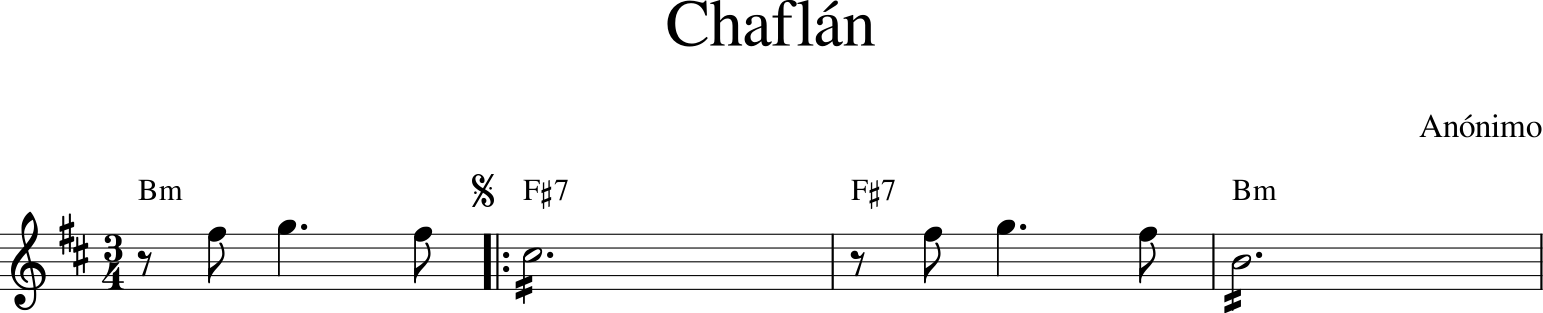

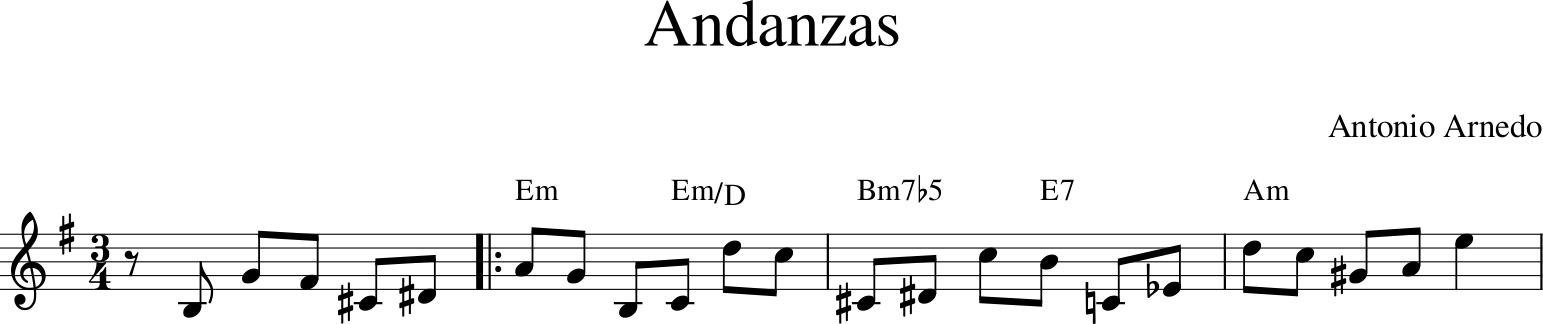

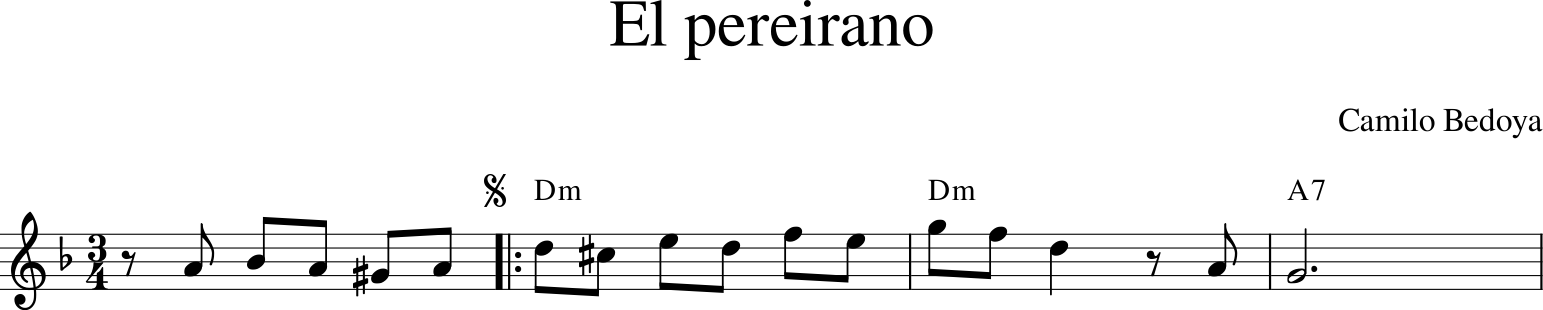

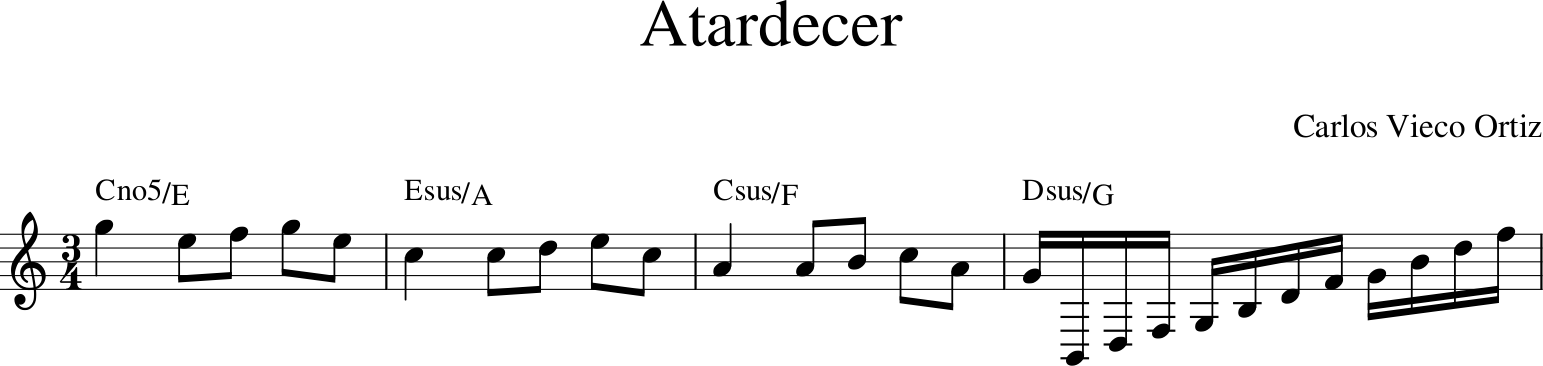

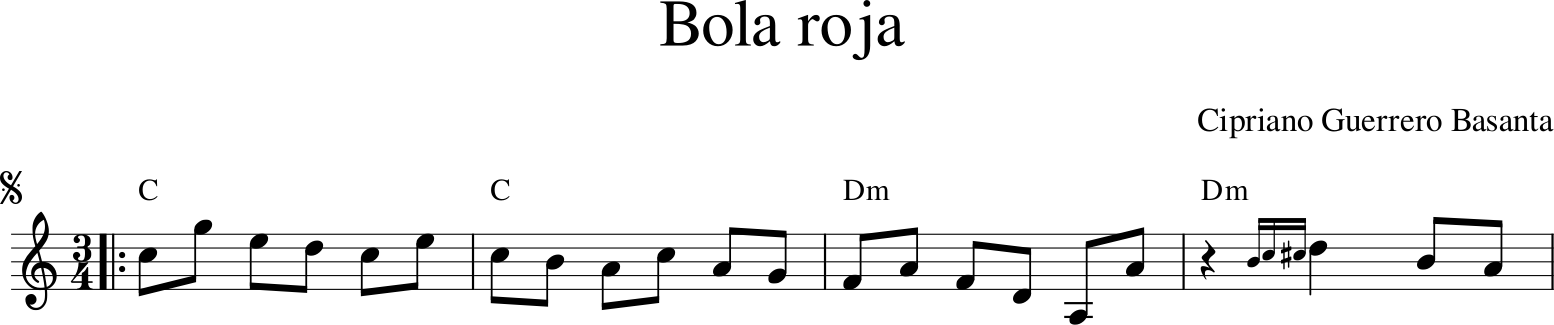

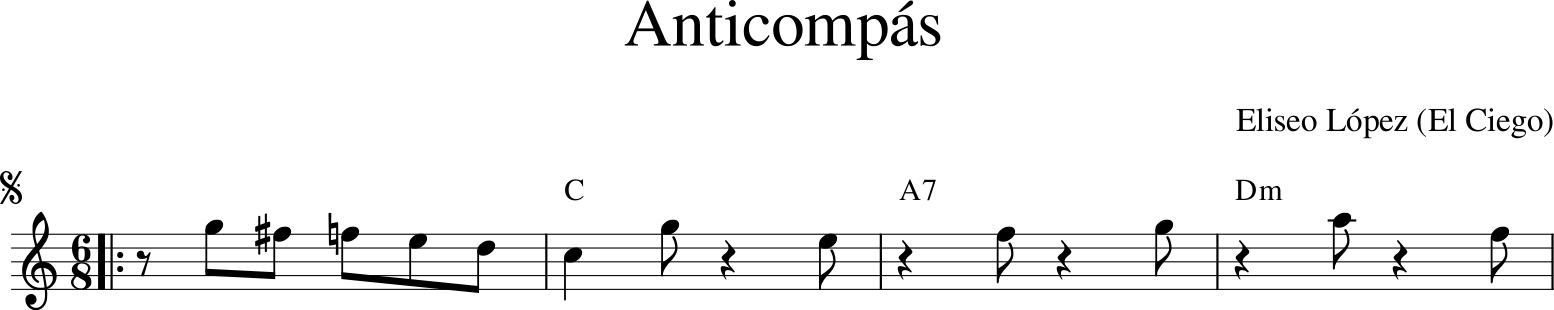

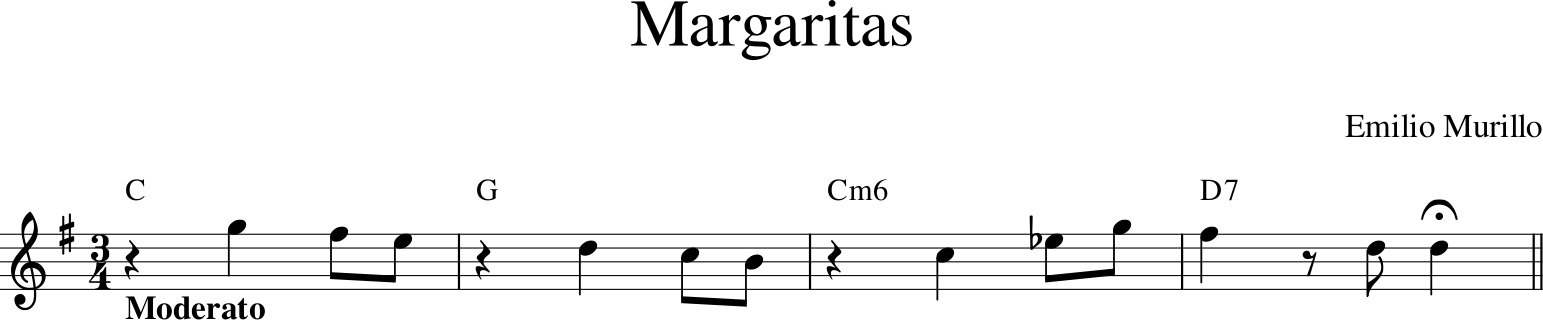

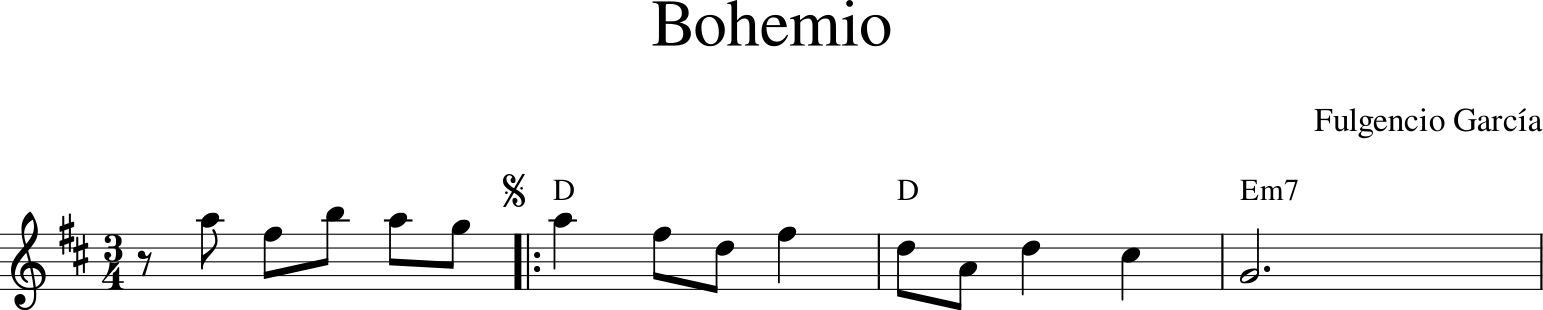

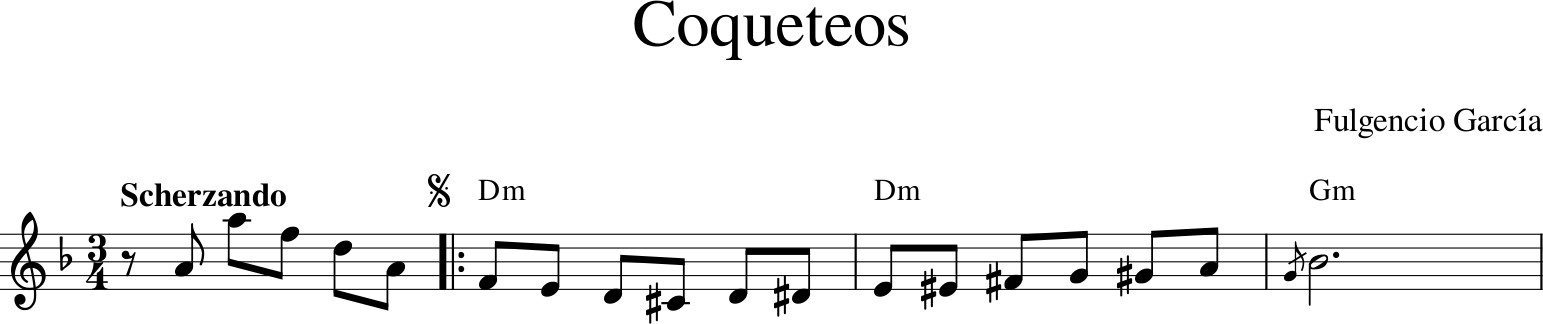

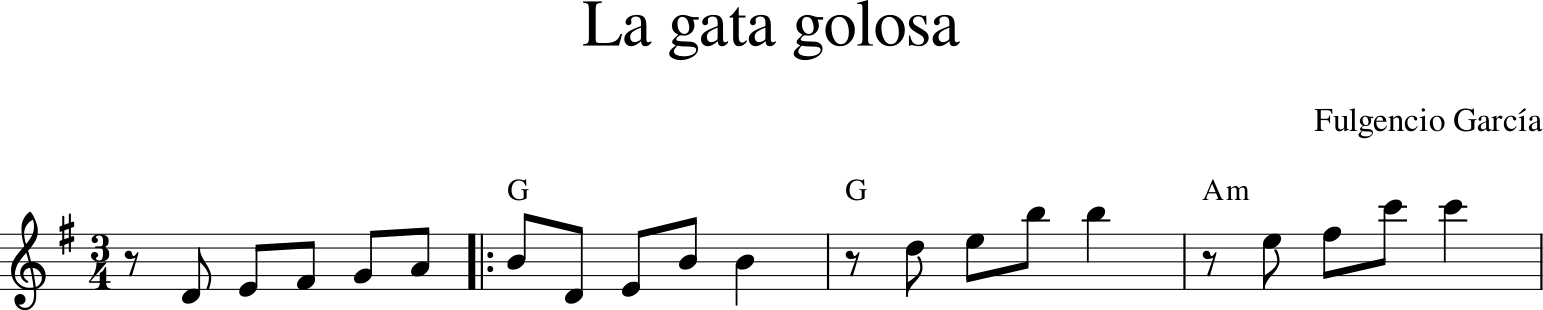

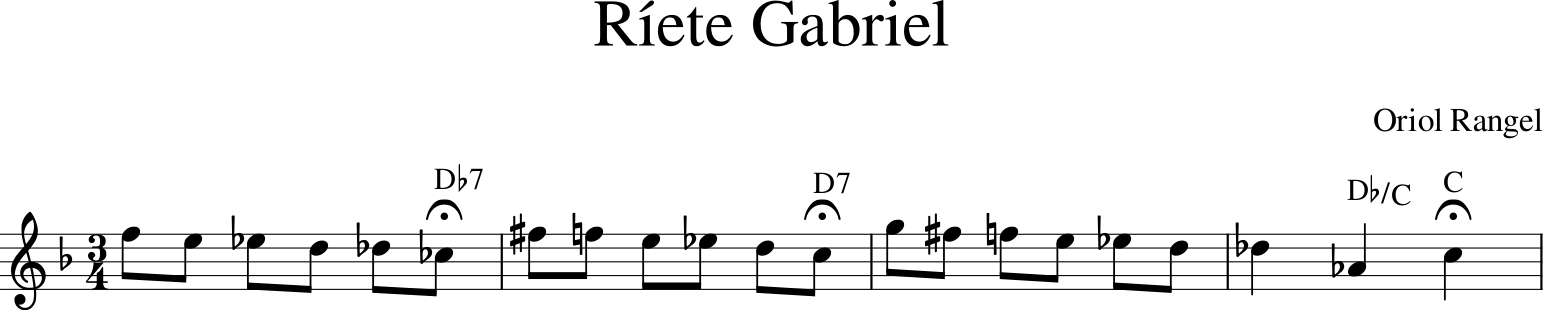

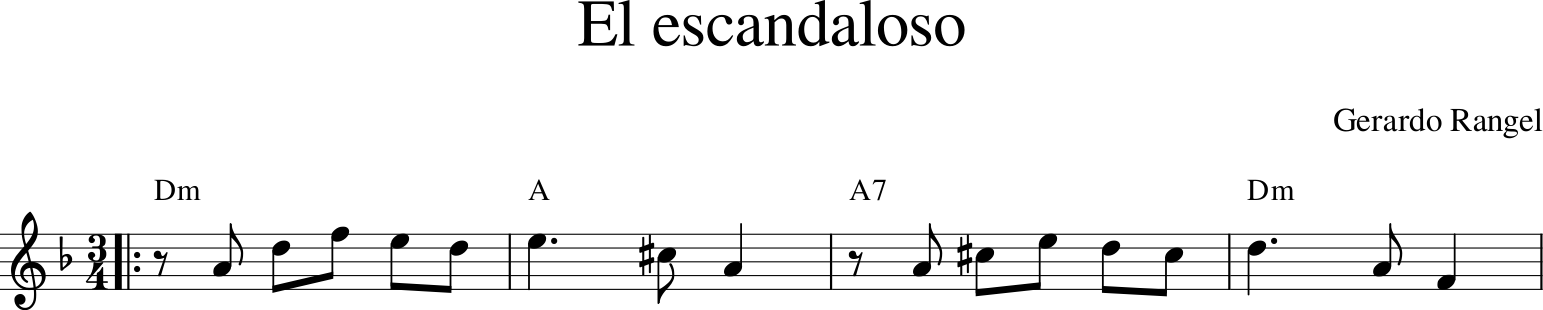

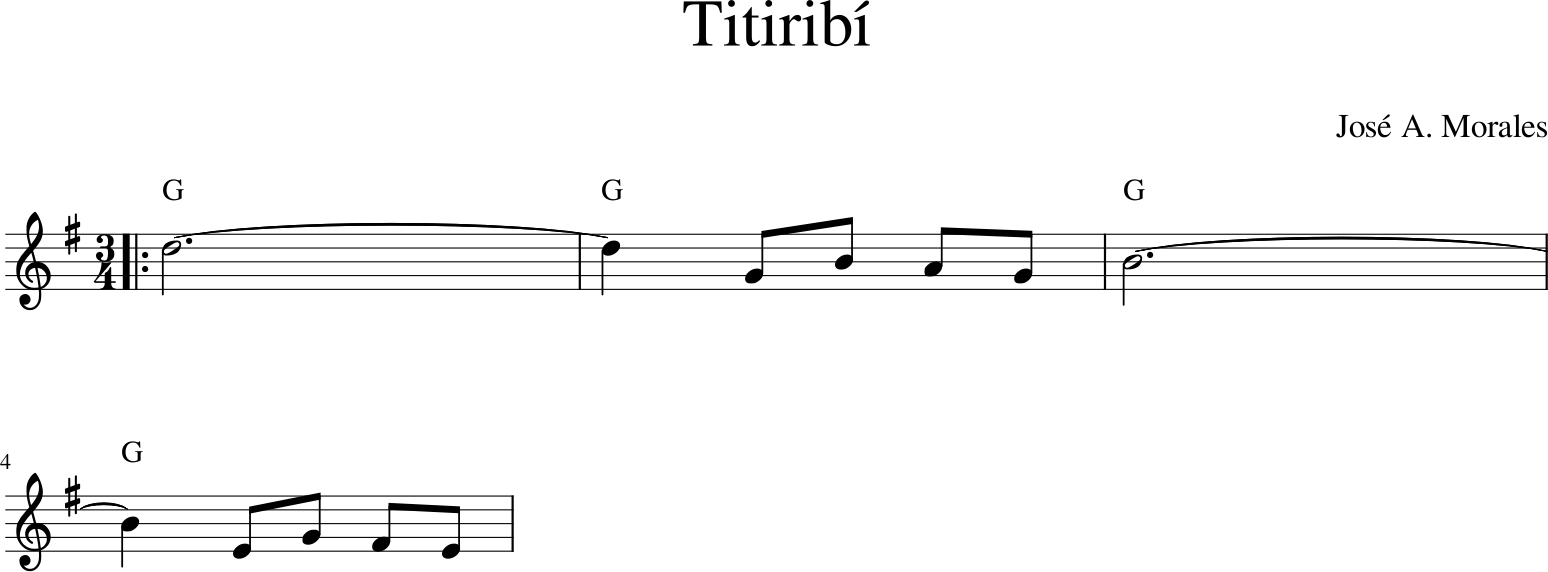

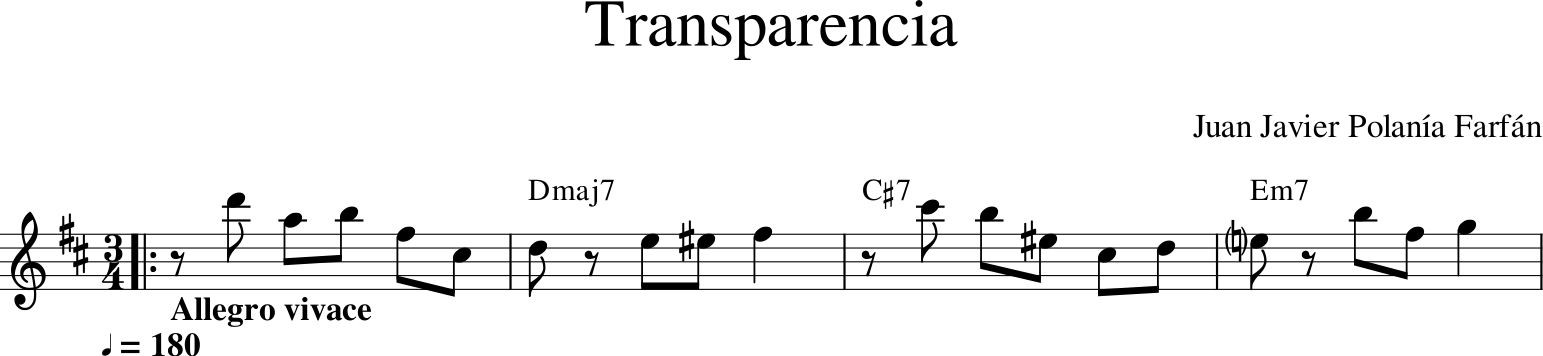

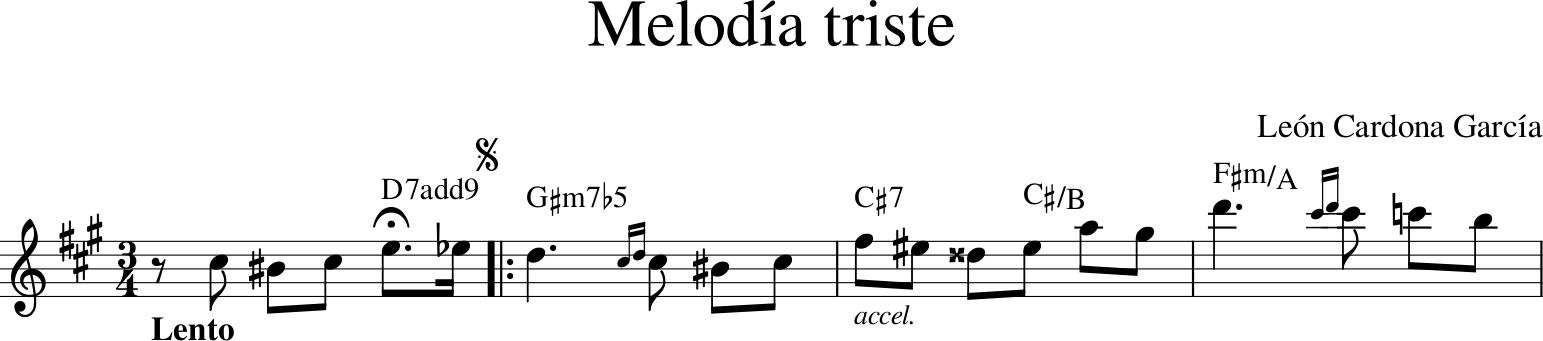

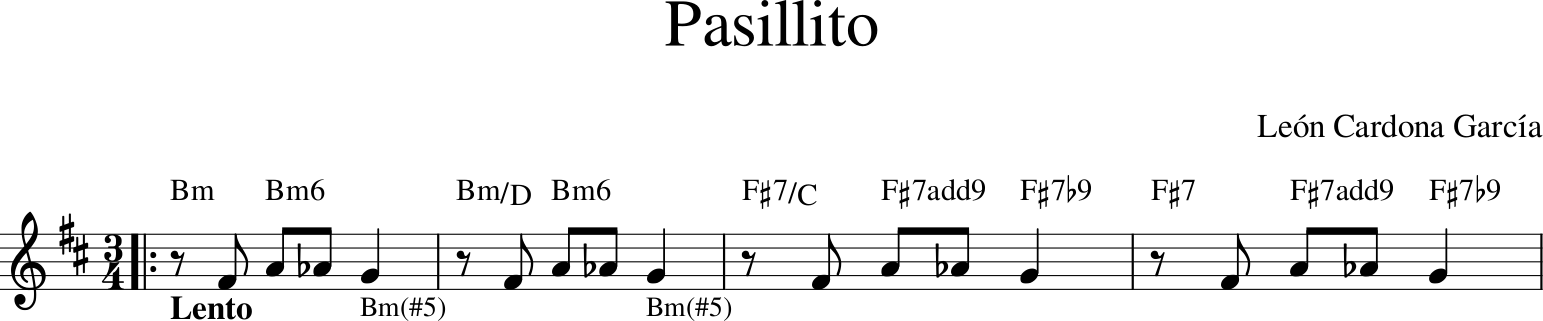

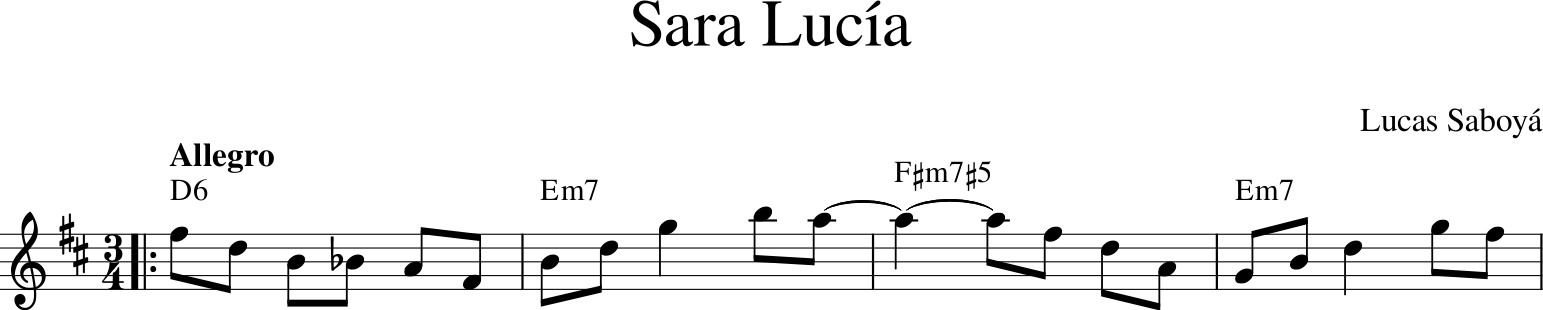

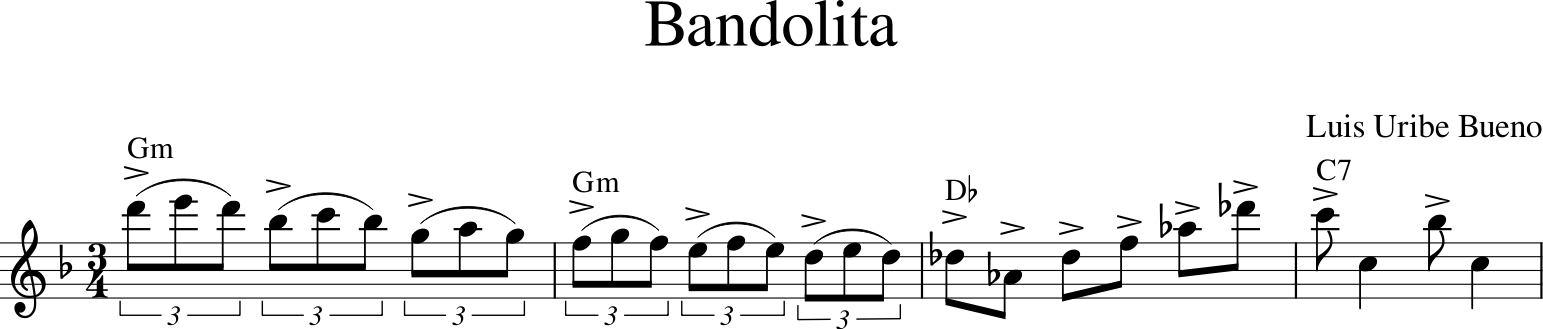

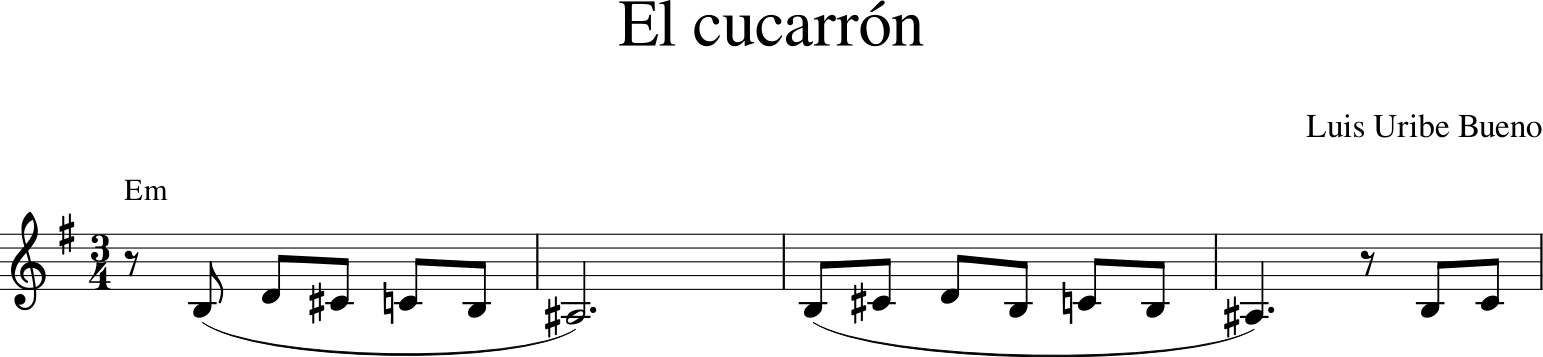

Error en  Rocío


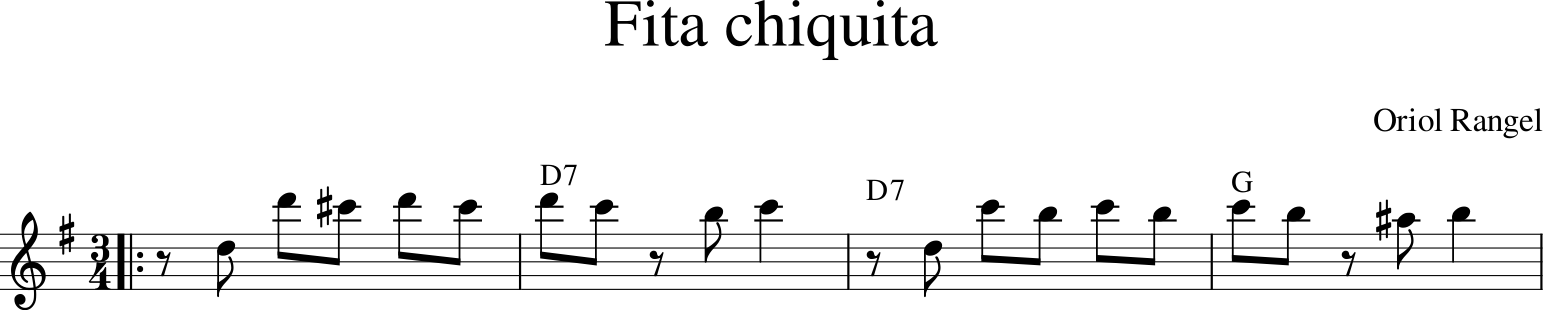

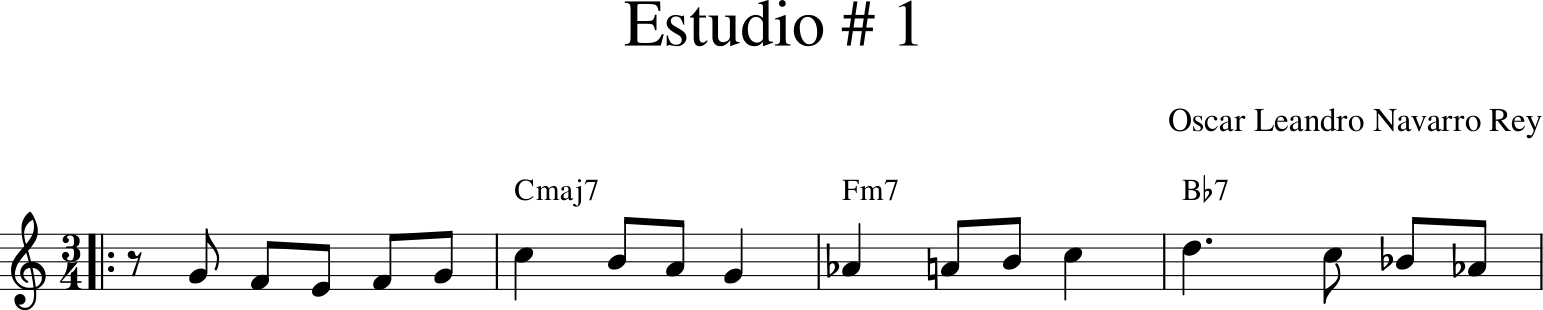

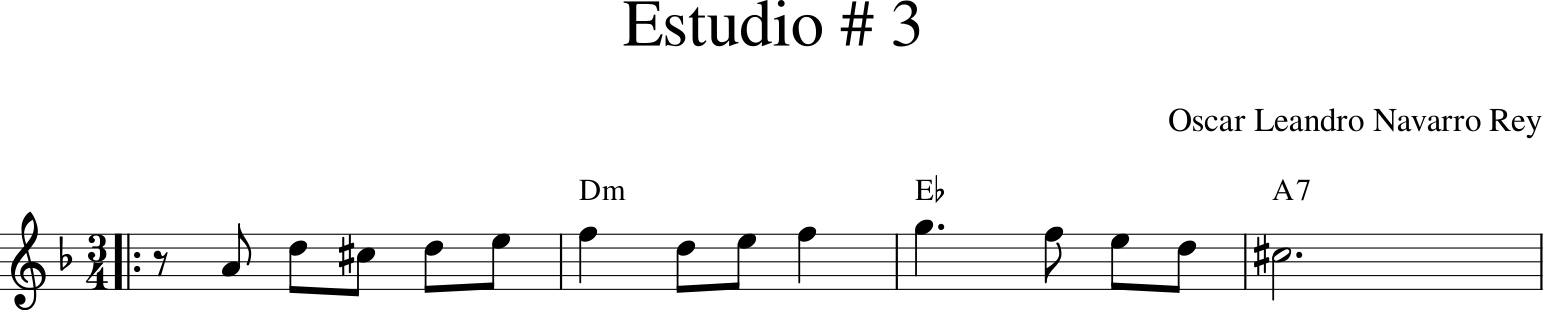

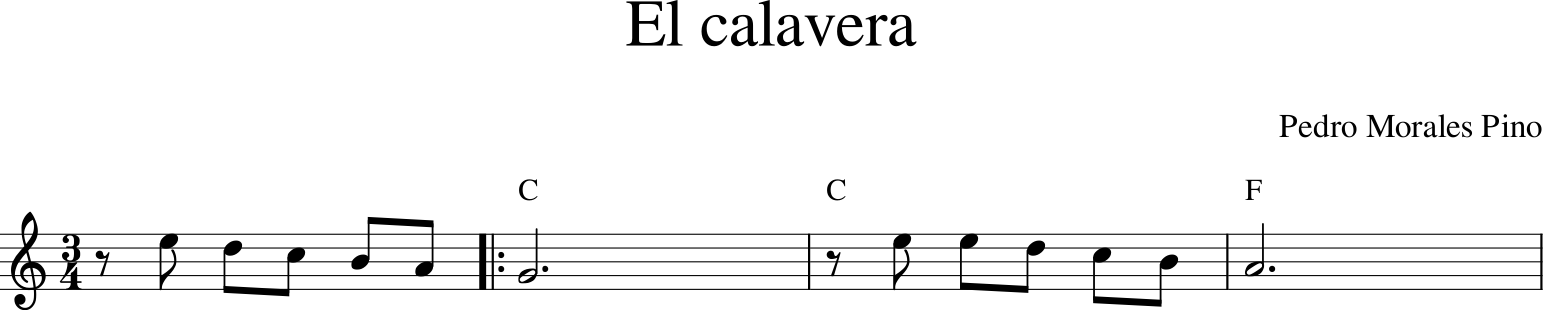

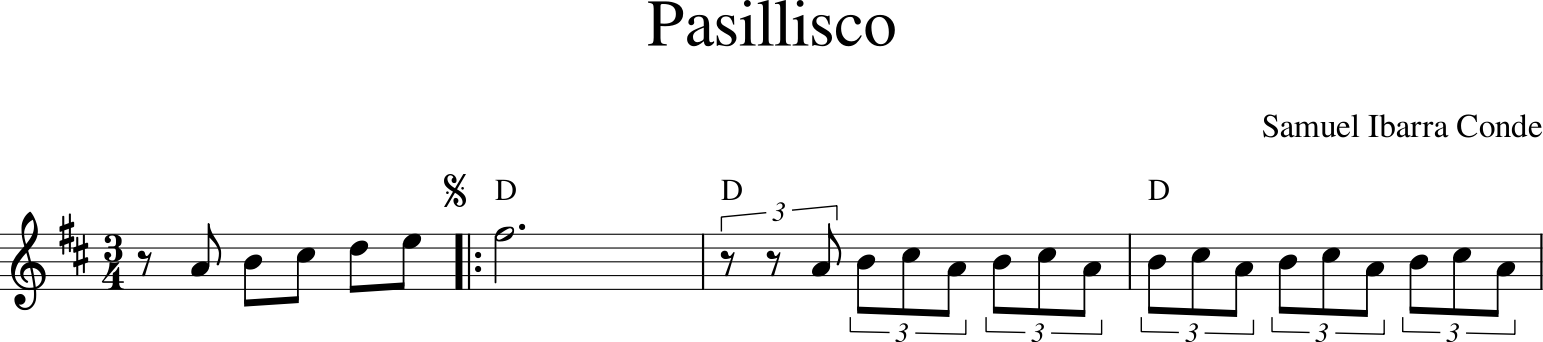

In [38]:
#Recuperar índice tomando datos de la tabla
filtred=merged_inner[(merged_inner['Género'].str.contains('Pasillo', case=False))]
a=pd.unique(filtred['Título'])
#a=a[30:50]
for i in a:
    try:
        s = music21.corpus.getWork(i)
        source=music21.converter.parse(s)
        source.measures(1,4).show()
    except:
        print('Error en ', i)

# Crear índice de patrones

00001


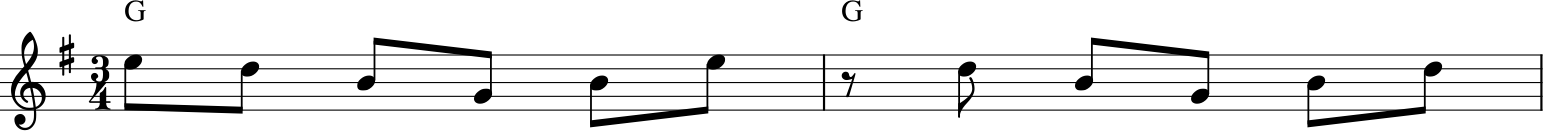

00002


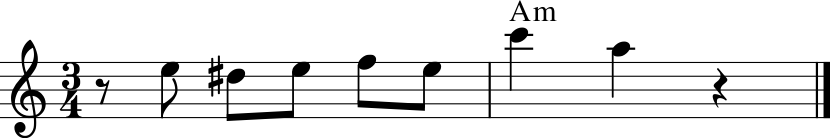

00003


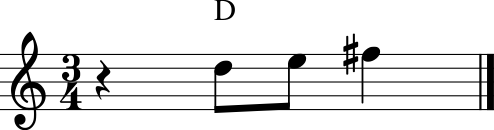

00004


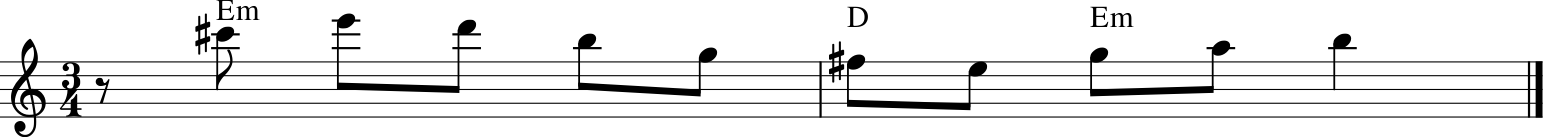

00005


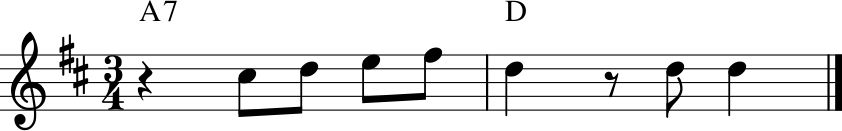

00006


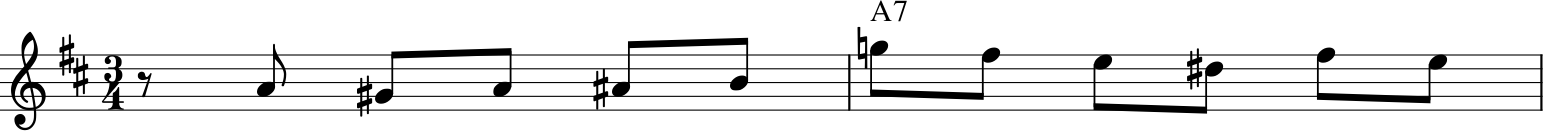

00007


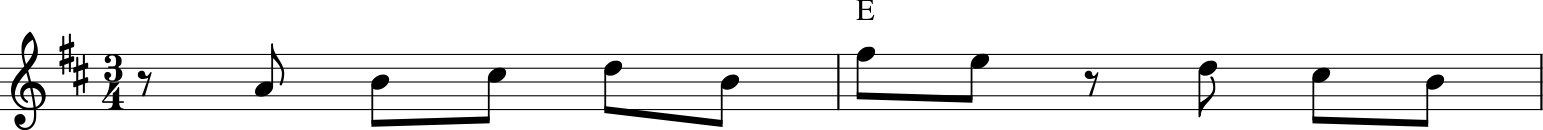

00008


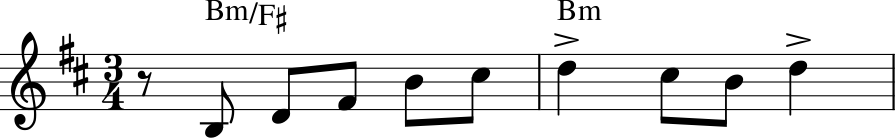

00009


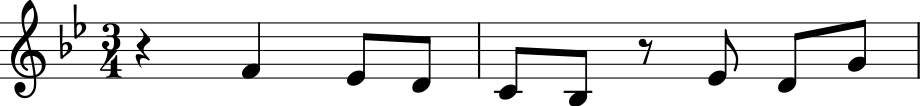

00010


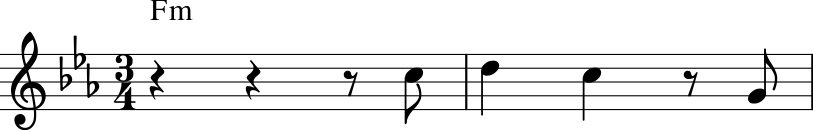

00011


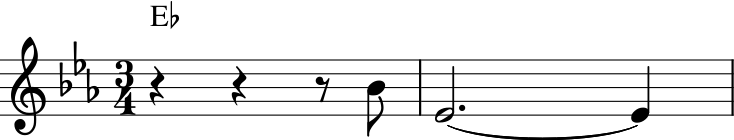

00012


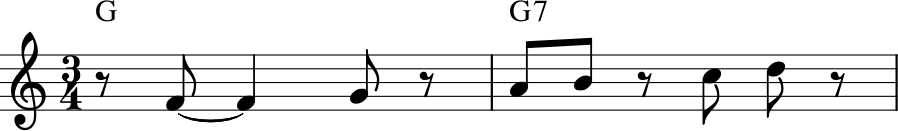

00013


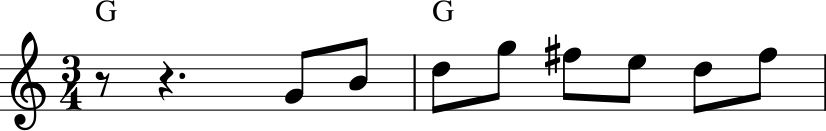

00014


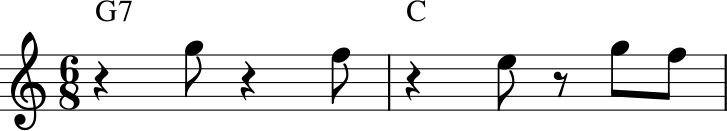

00015


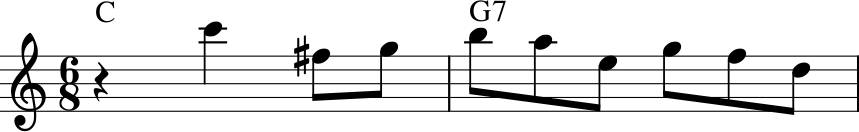

00016


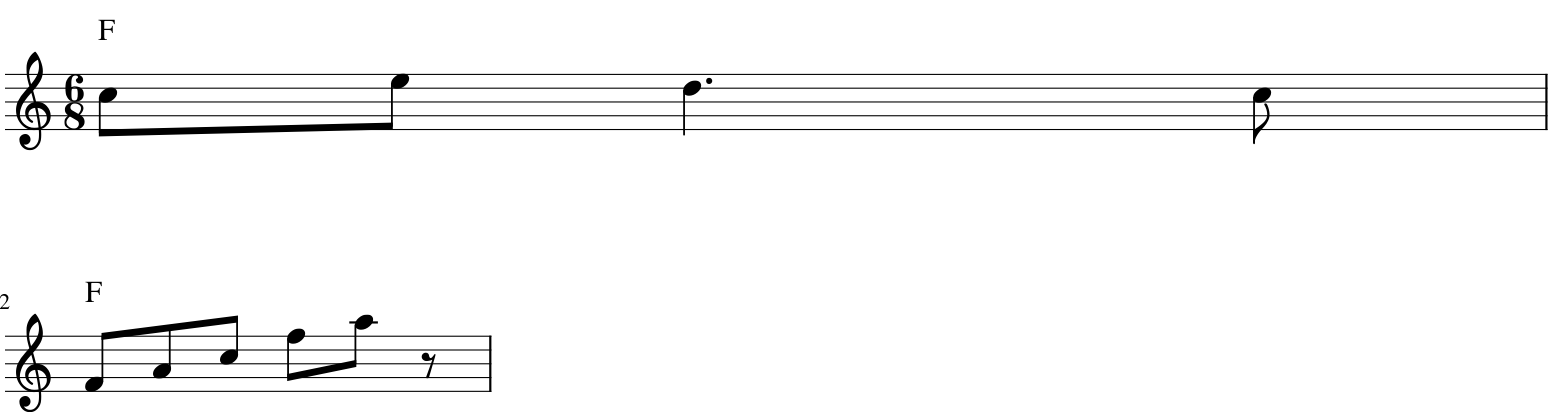

00017


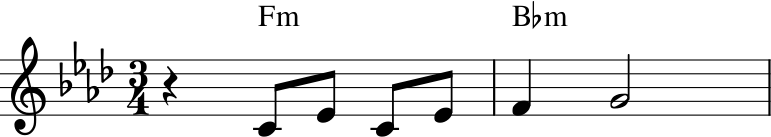

00018


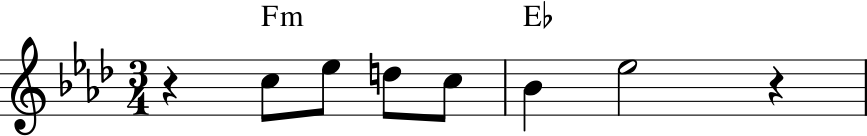

00019


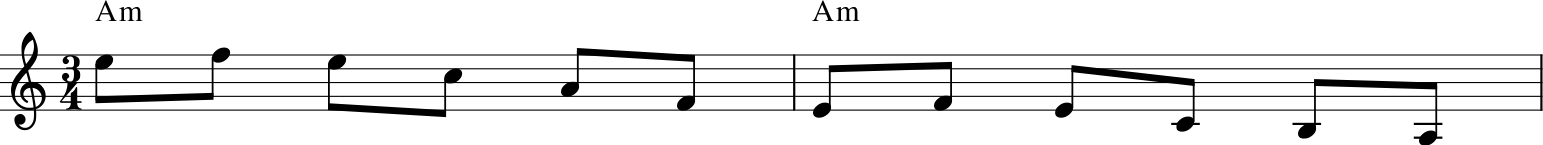

00020


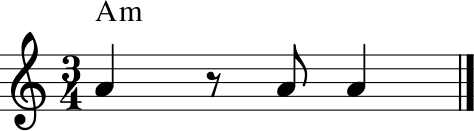

00021


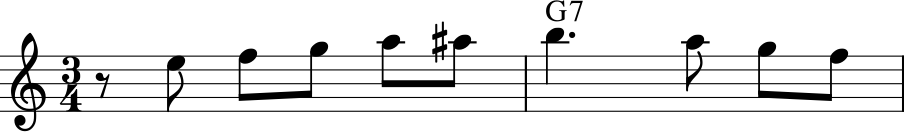

00022


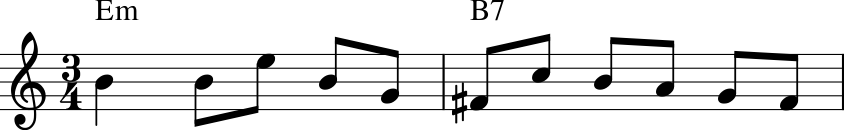

00023


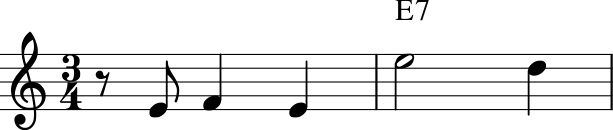

00024


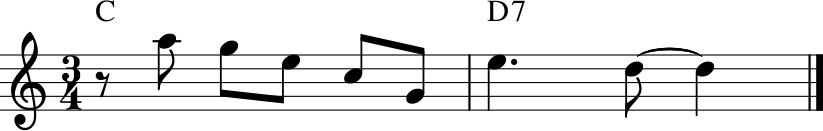

00025


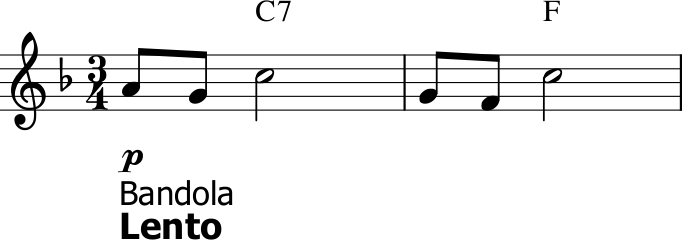

00026


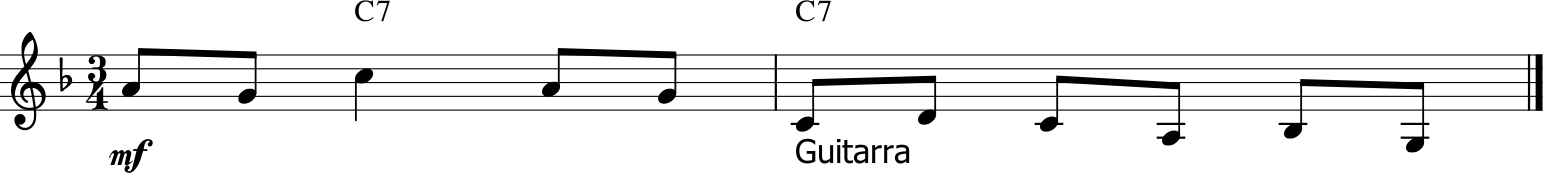

00027


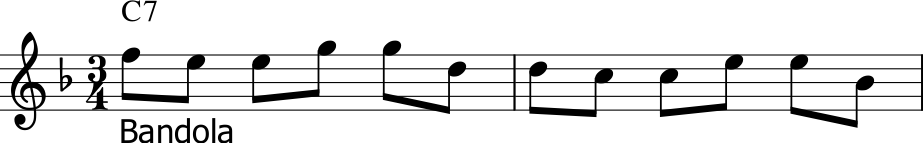

00028


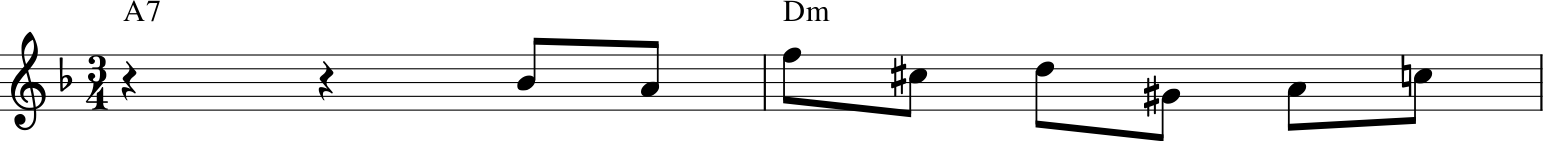

00029


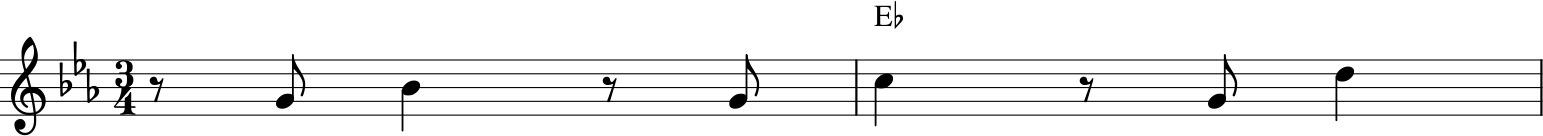

00030


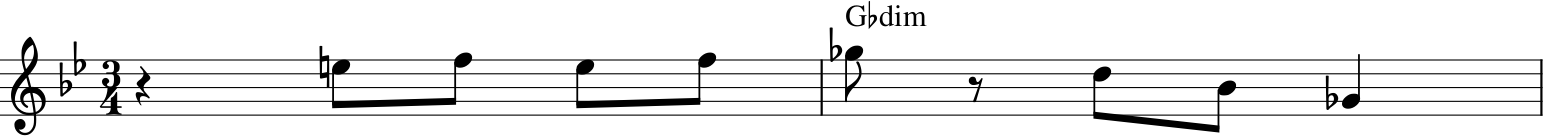

00031


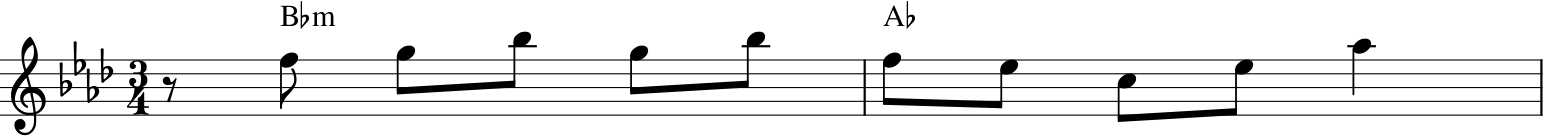

00032


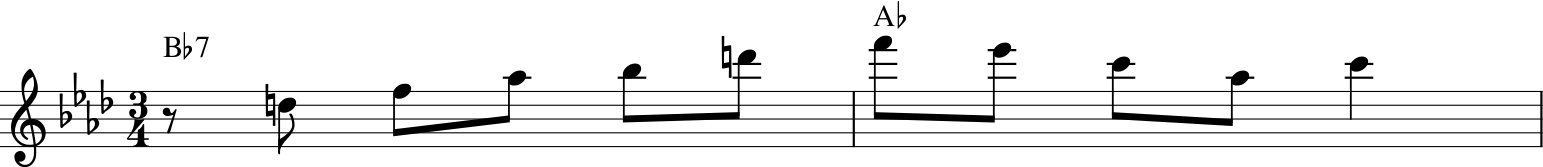

00033


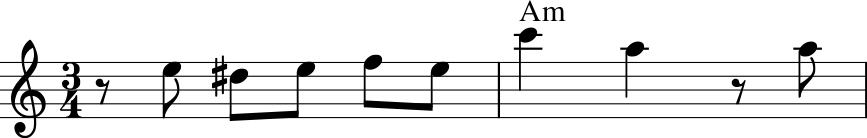

00034


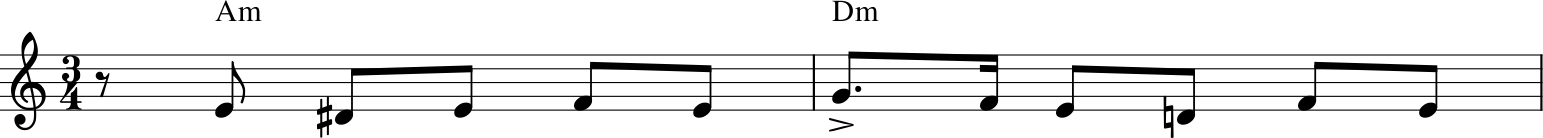

00035


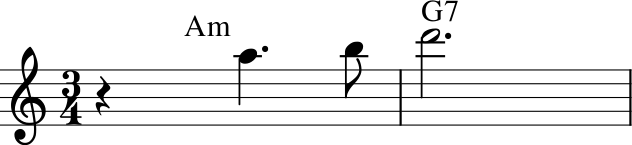

00036


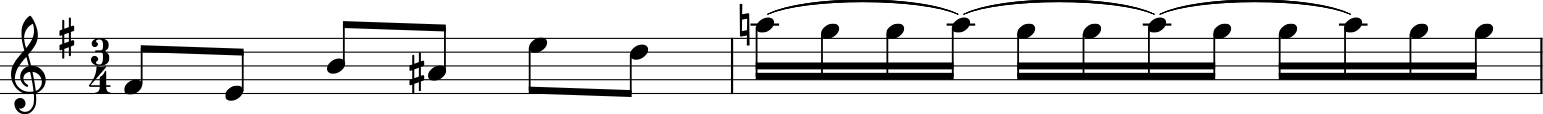

00037


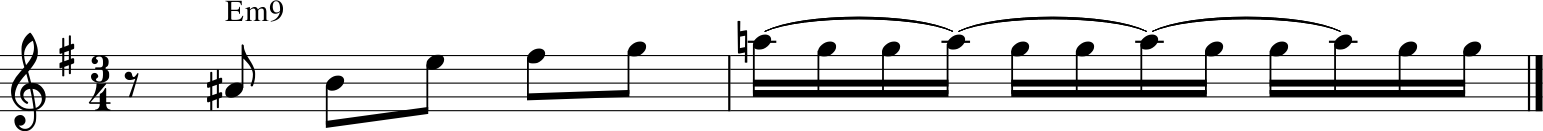

00038


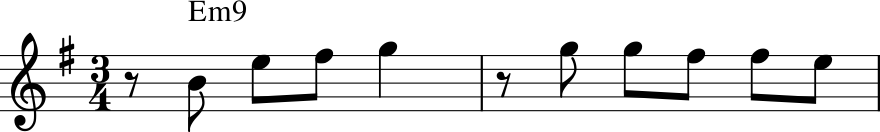

00039
Error en  39
00040
Error en  40
00041
Error en  41
00042
Error en  42
00043
Error en  43
00044


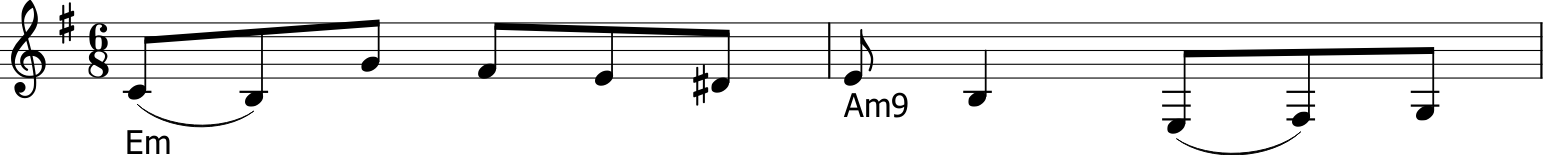

00045


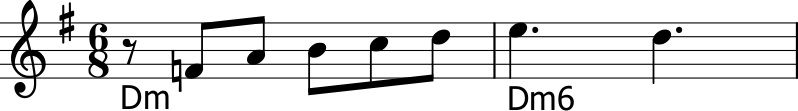

00046


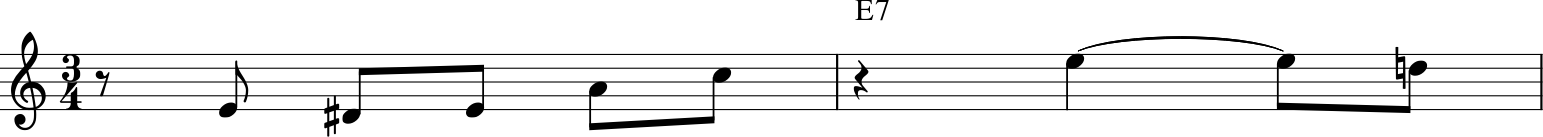

00047


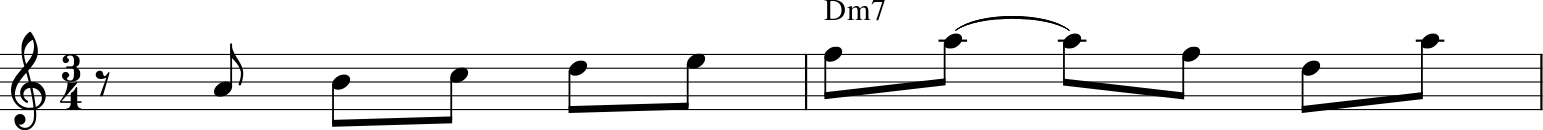

00048


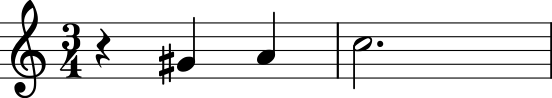

00049


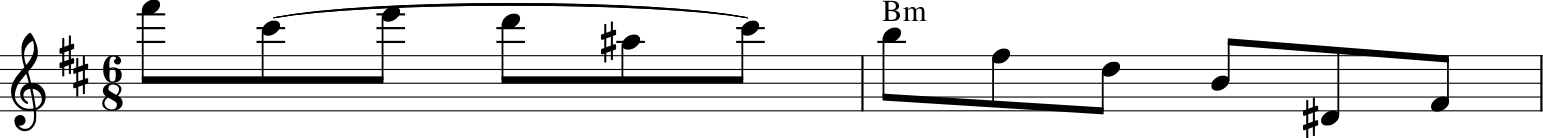

00050


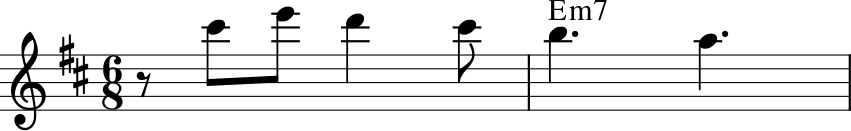

00051


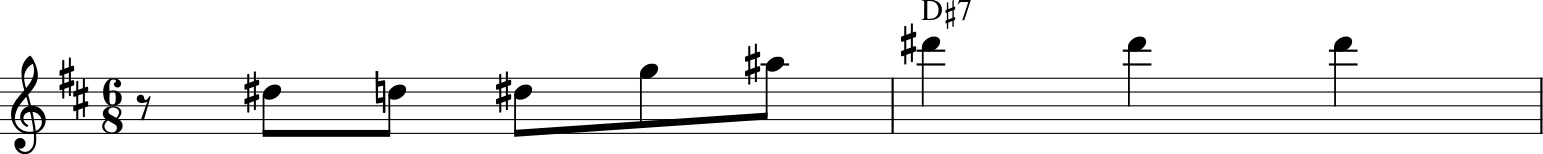

00052


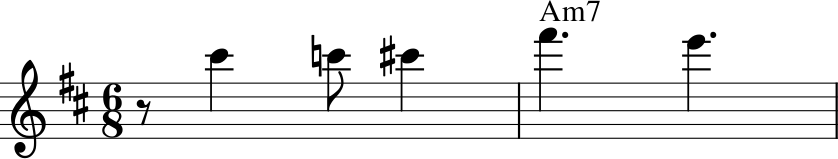

00053


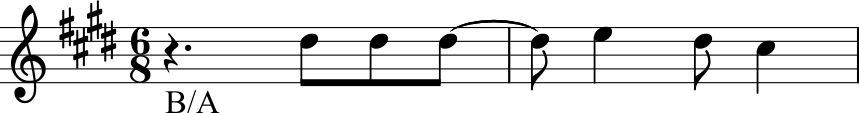

00054


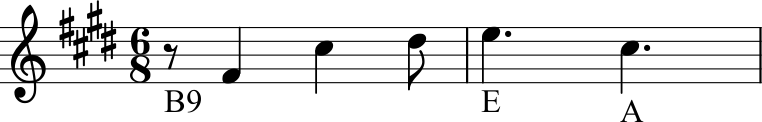

00055


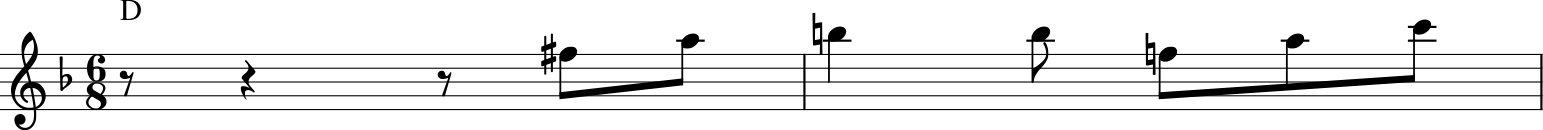

00056


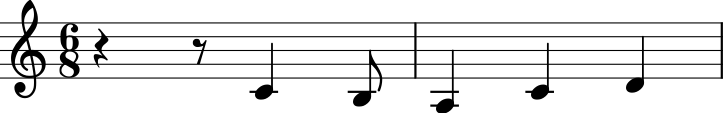

00057


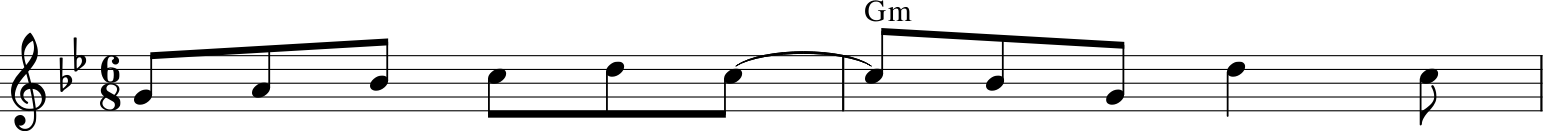

00058


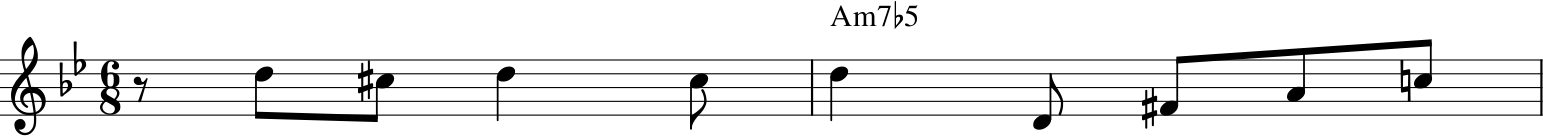

00059


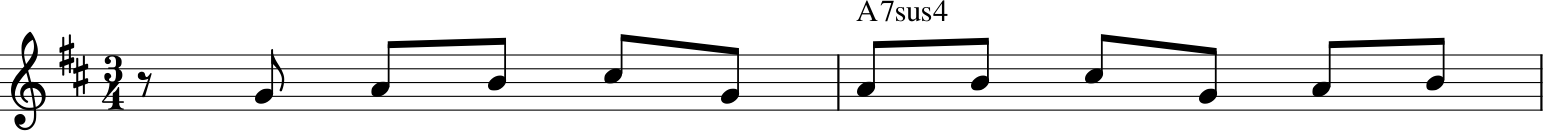

00060


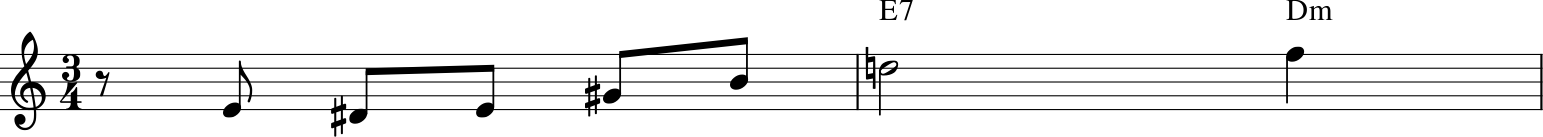

00061


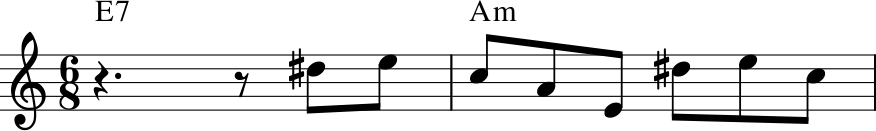

00062


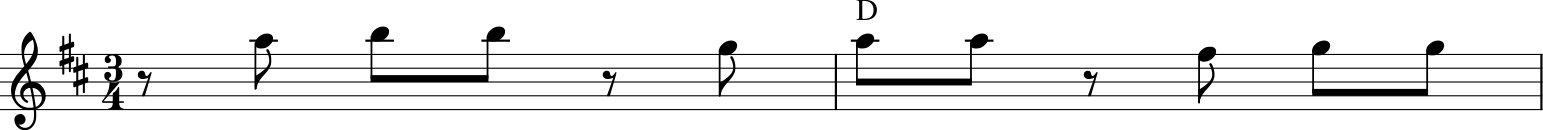

00063


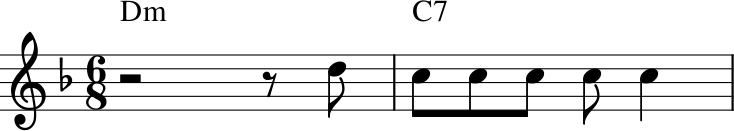

00064


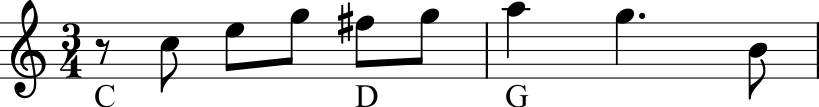

00065


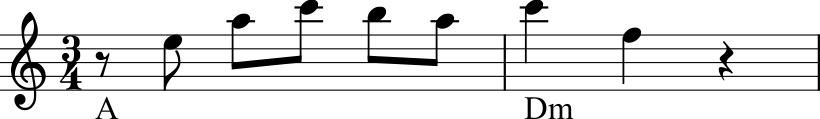

00066


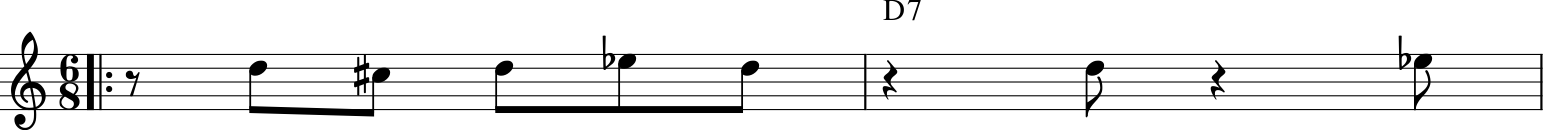

00067


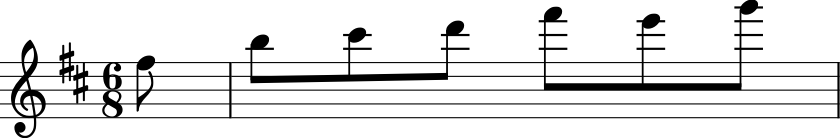

00068


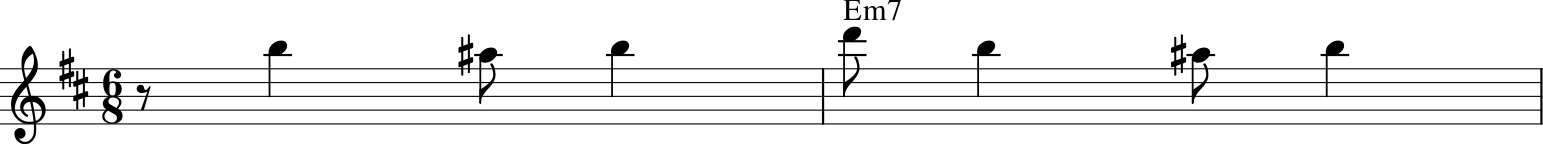

00069


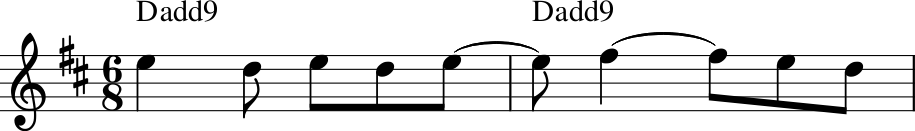

00070


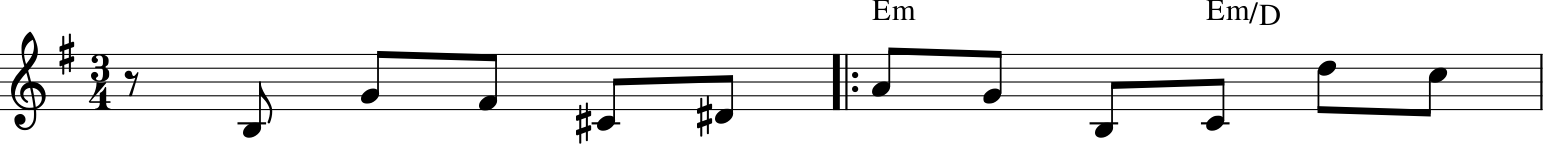

00071


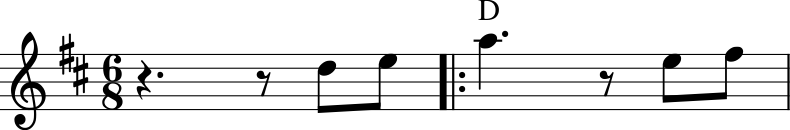

00072


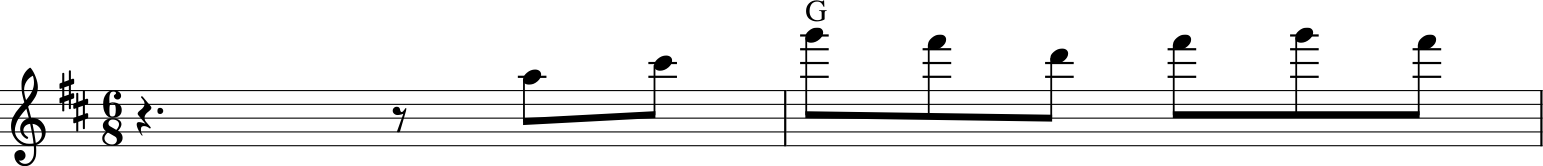

00073


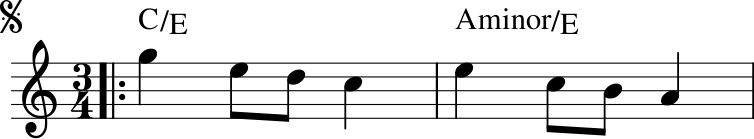

00074


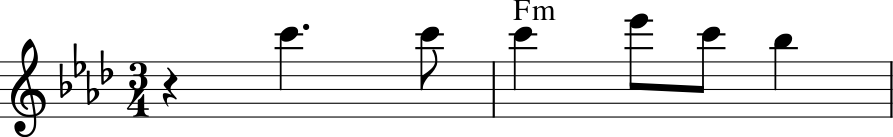

00075


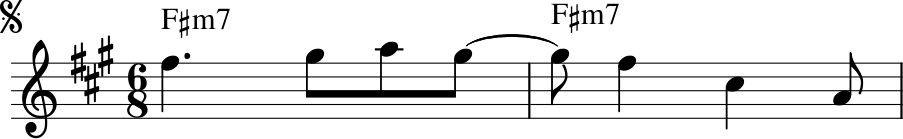

00076


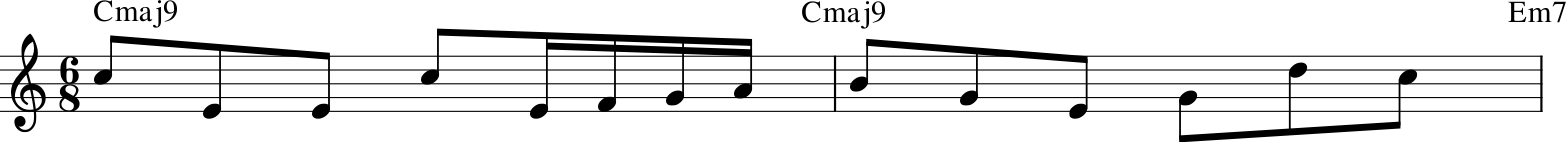

00077


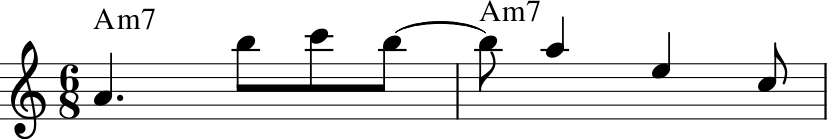

00078


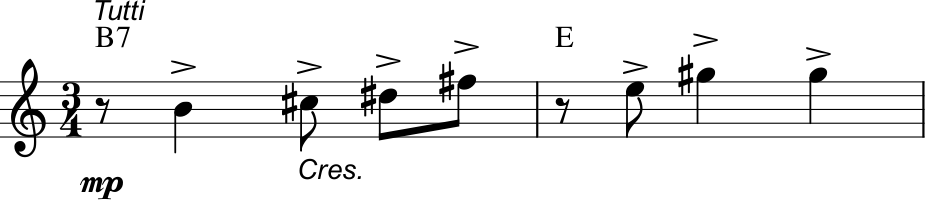

00079


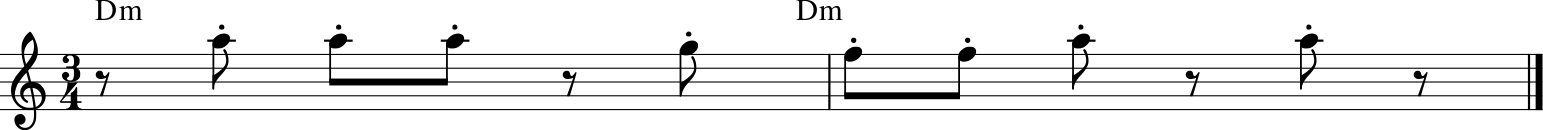

00080


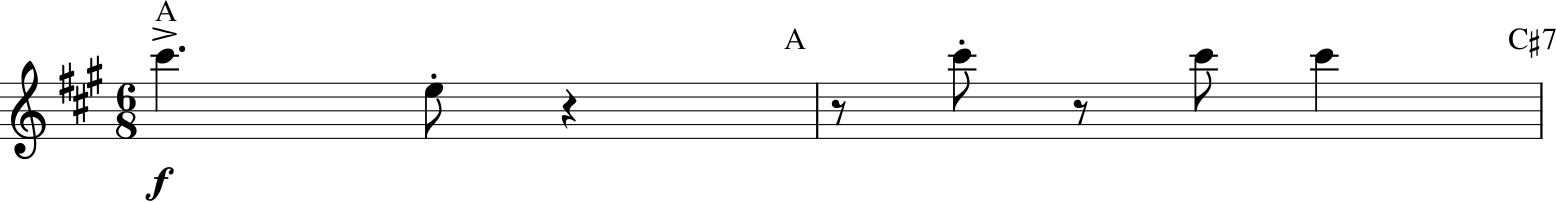

00081


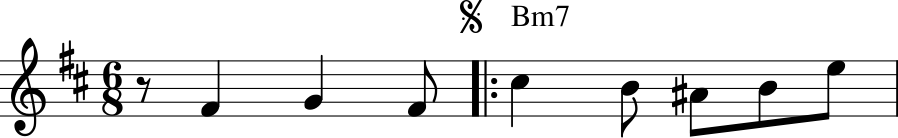

00082


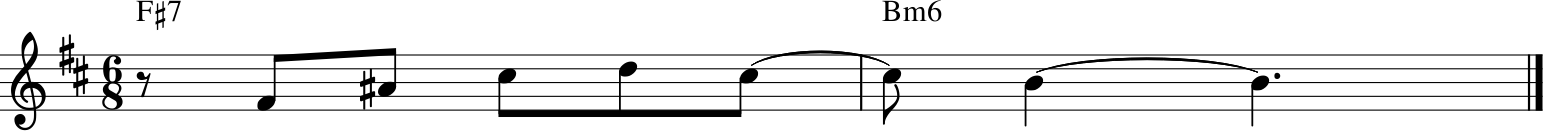

00083


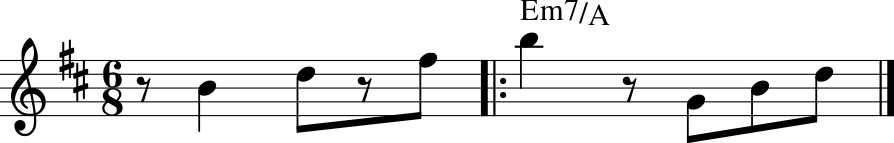

00084


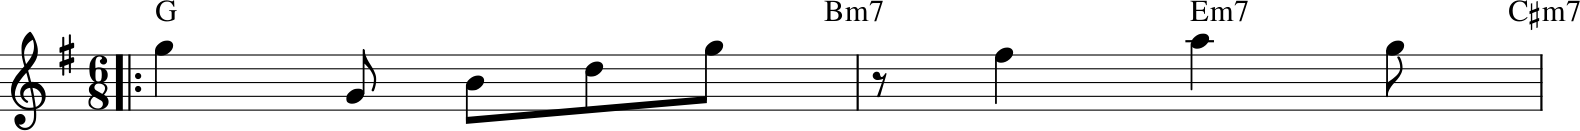

00085


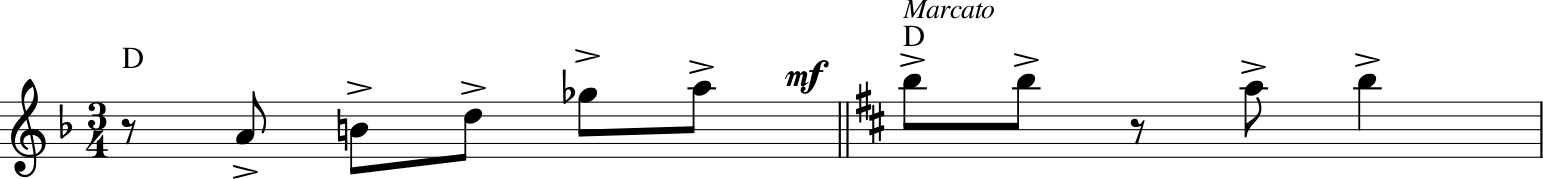

00086


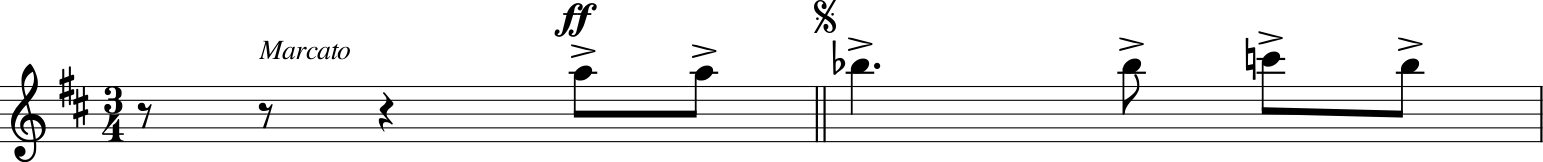

00087


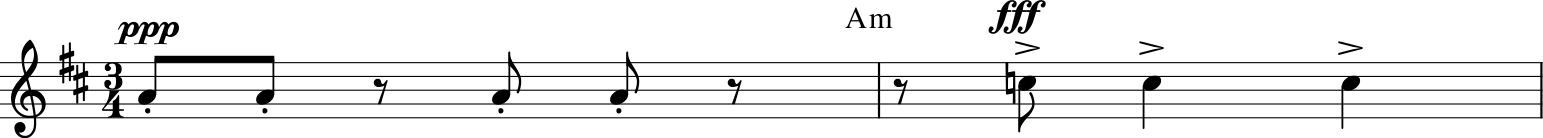

00088


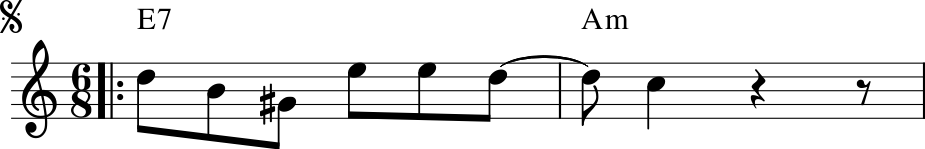

00089


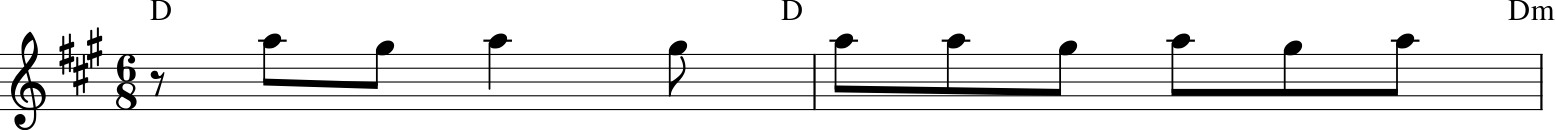

00090


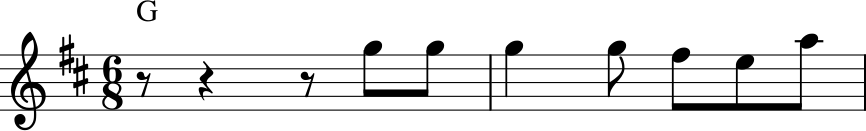

00091


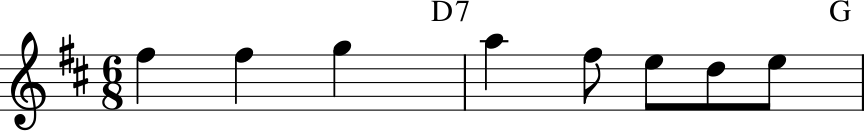

00092


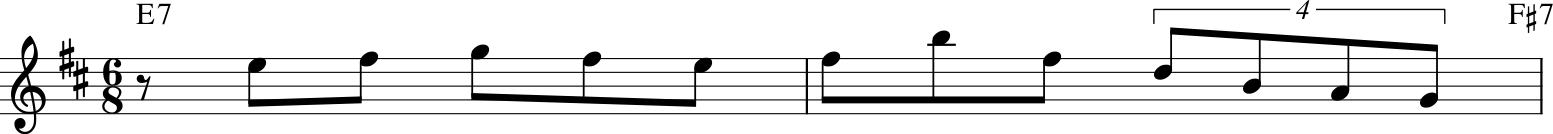

00093


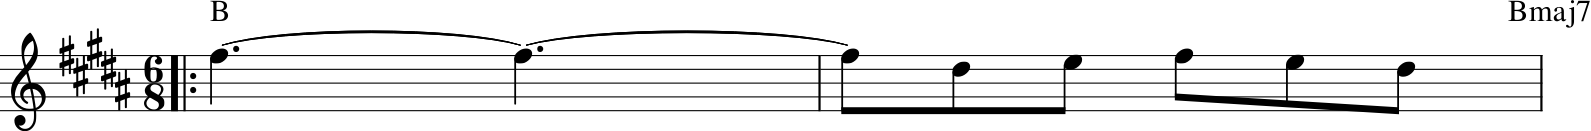

00094


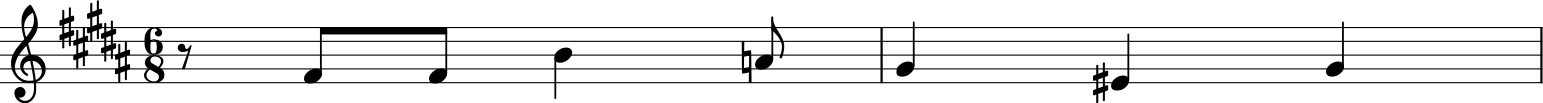

00095


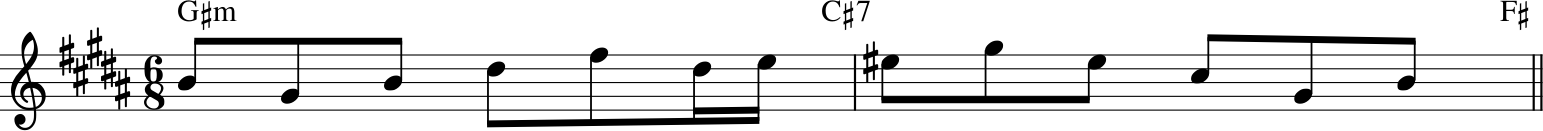

00096


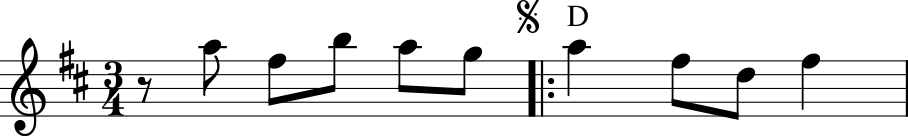

00097


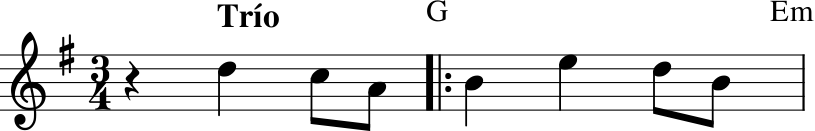

00098


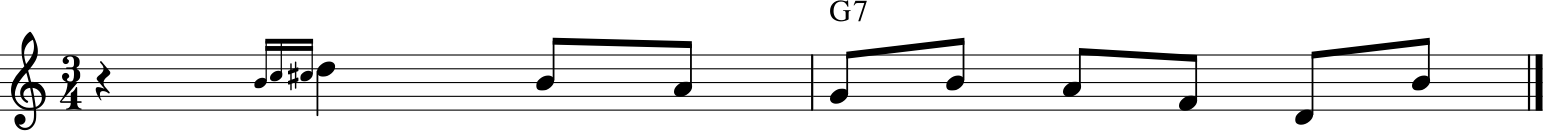

00099


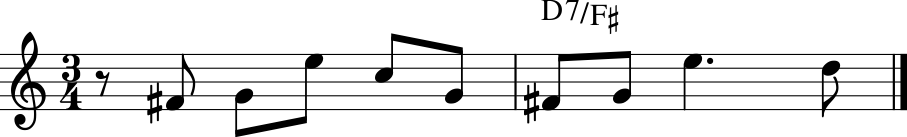

00100


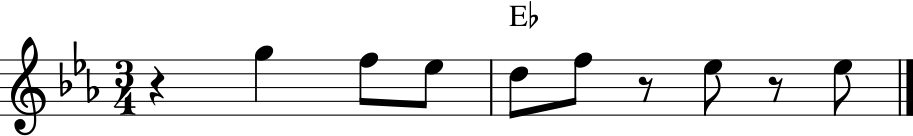

00101


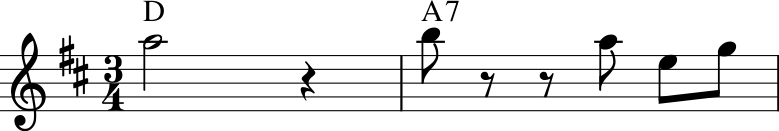

00102


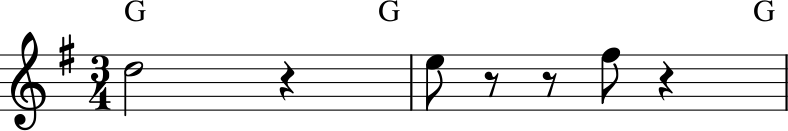

00103


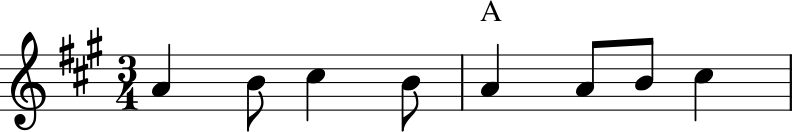

00104


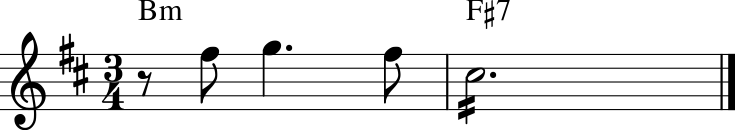

00105


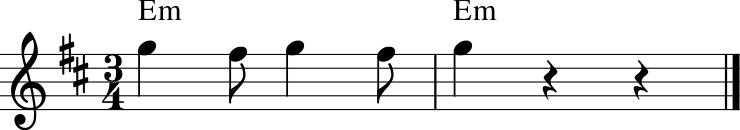

00106


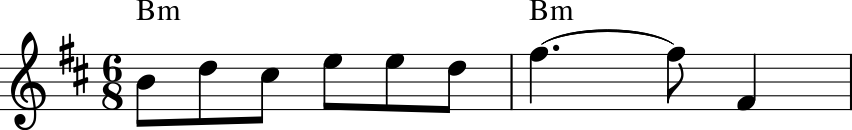

00107


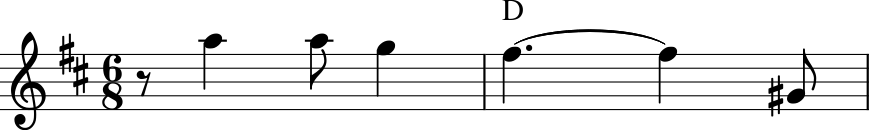

00108


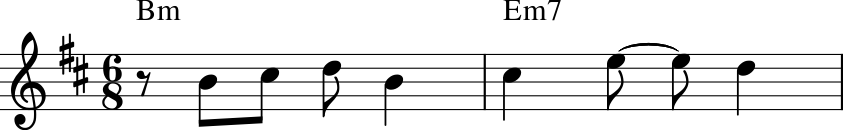

00109


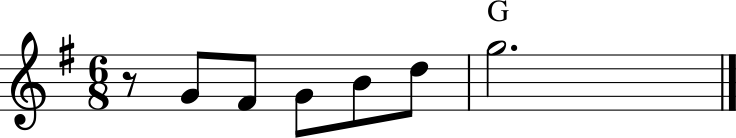

00110


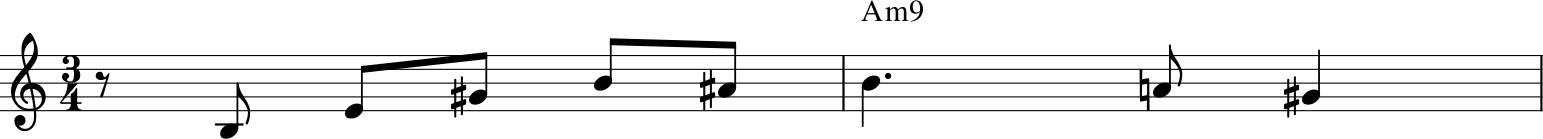

00111


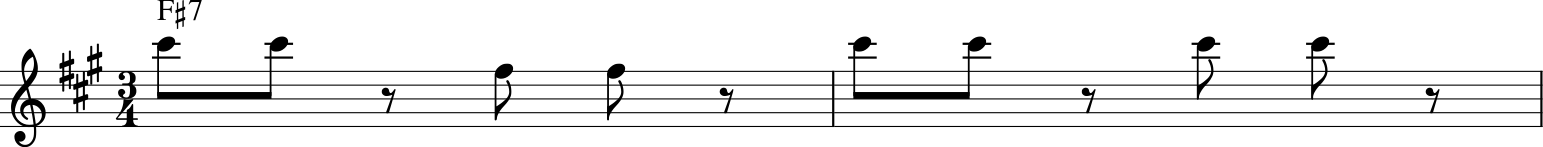

00112


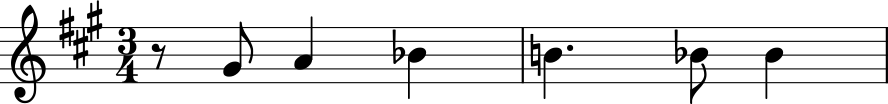

00113


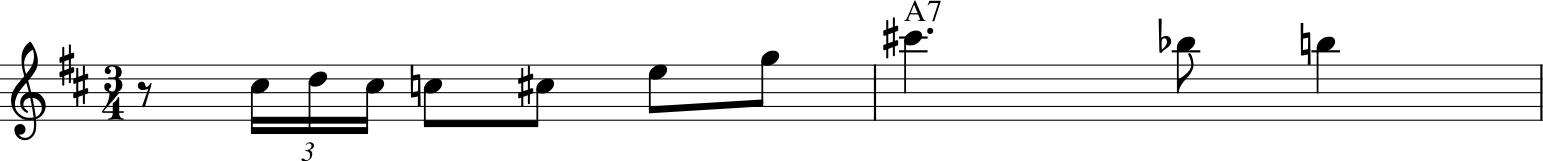

00114


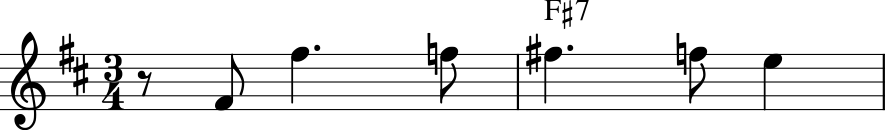

00115


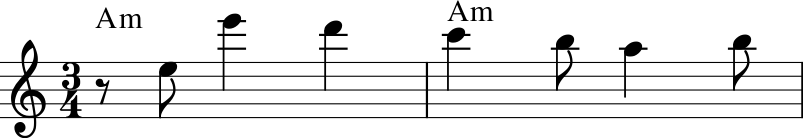

00116


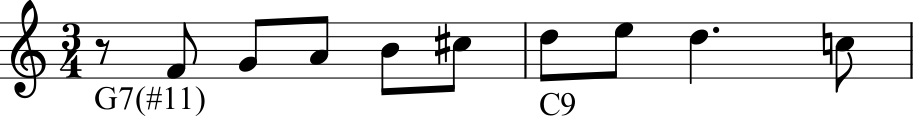

00117


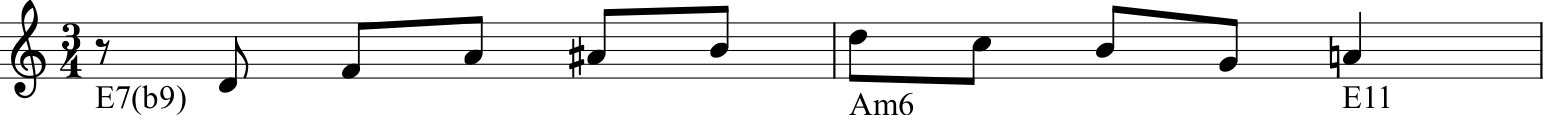

00118
Error en  118
00119


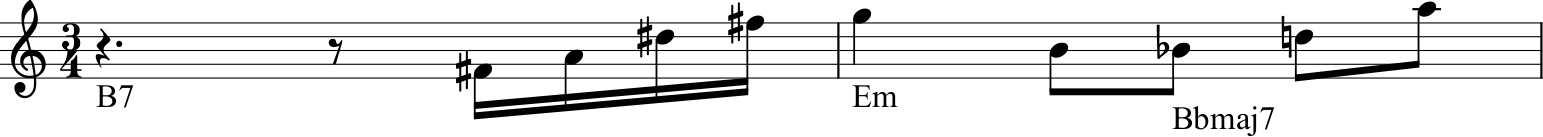

00120


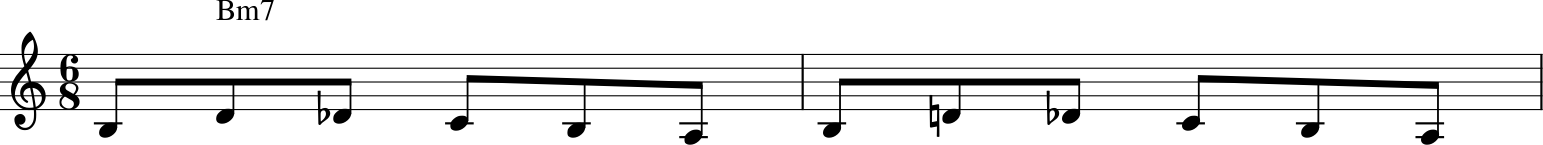

00121


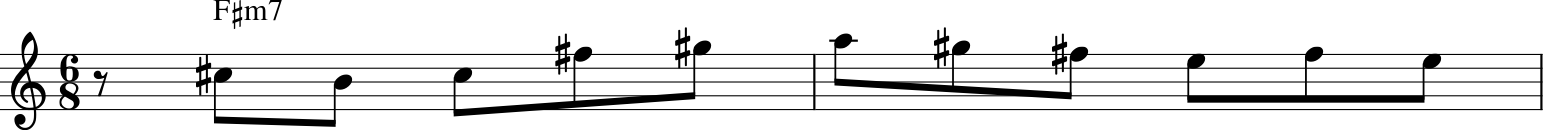

00122


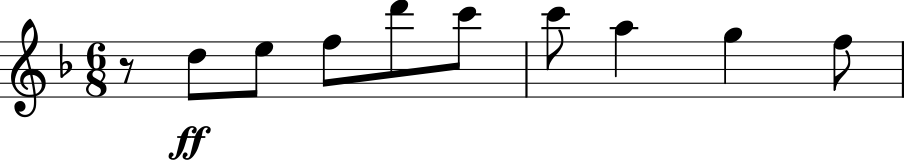

00123


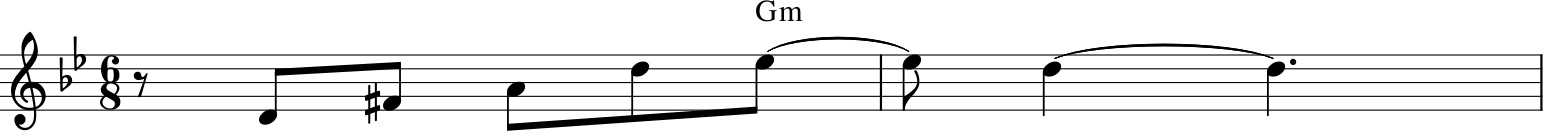

00124


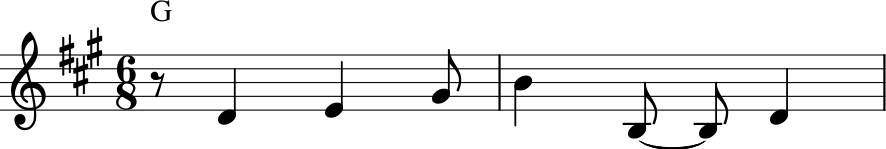

00125


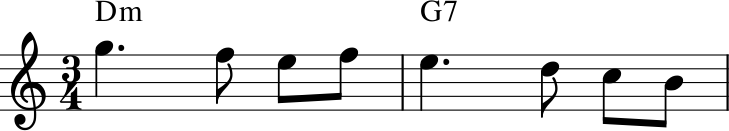

00126


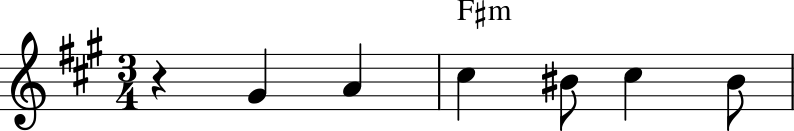

00127


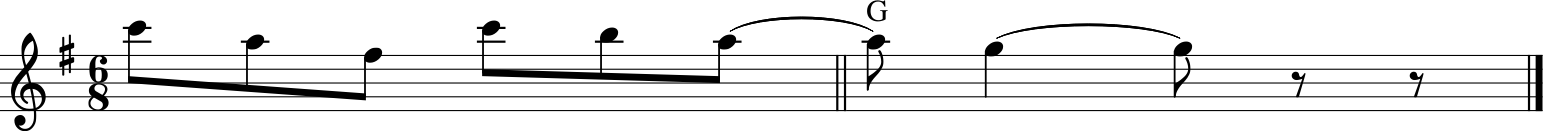

00128


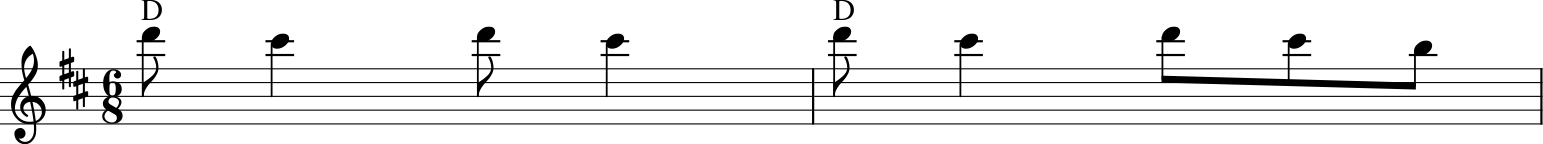

00129


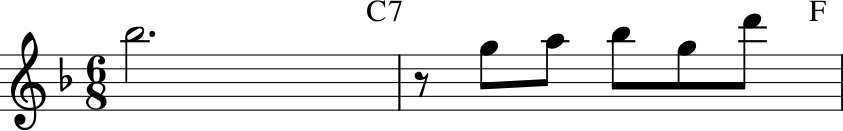

00130


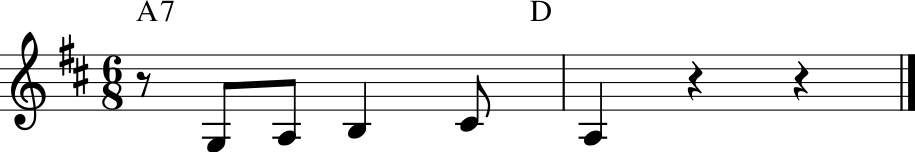

00131


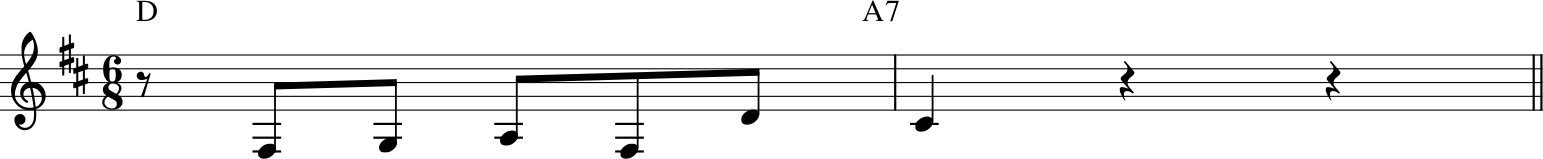

00132


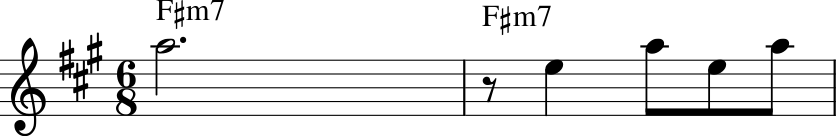

00133


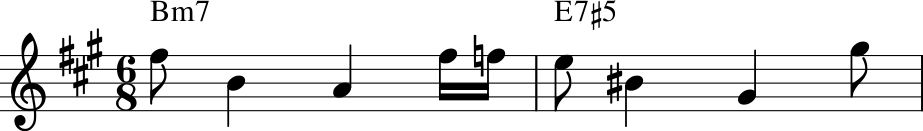

00134


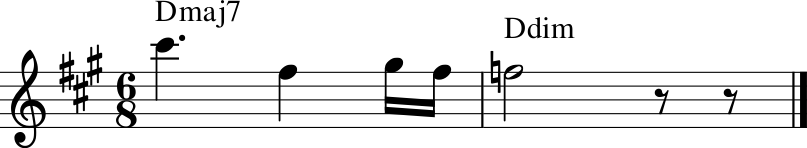

00135


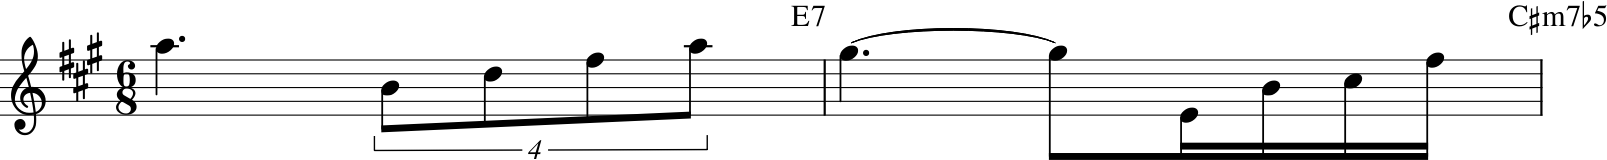

00136


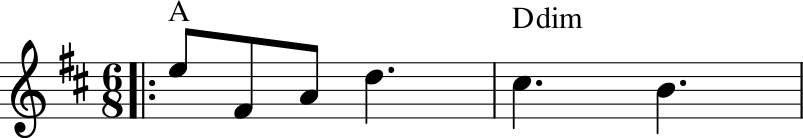

00137


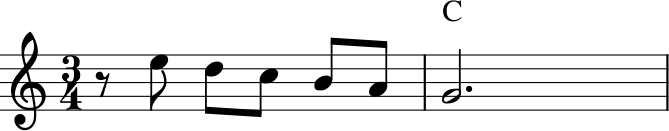

00138


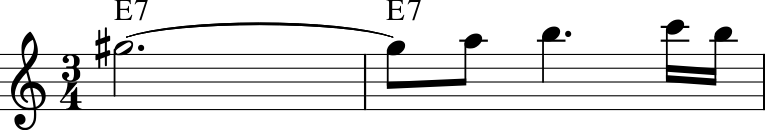

00139


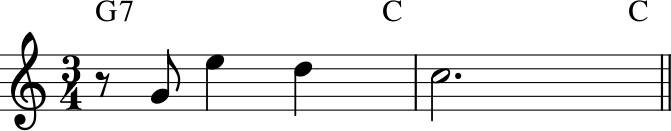

00140


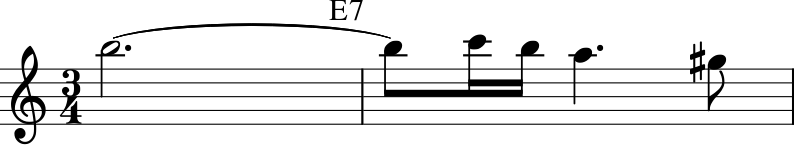

00141
Error en  141
00142


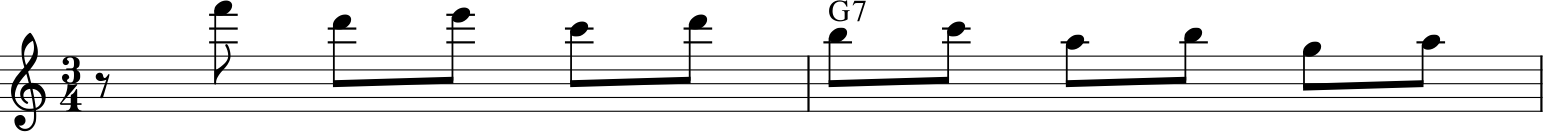

00143


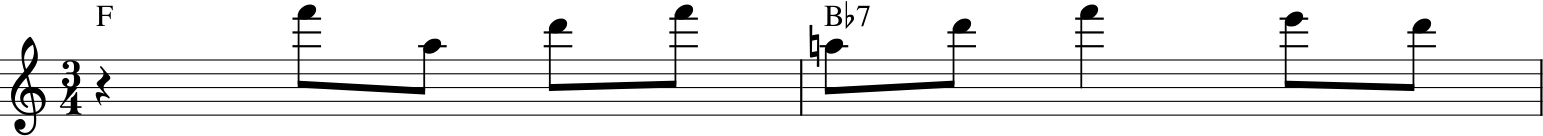

00144


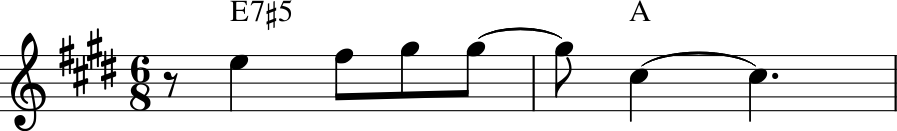

00145


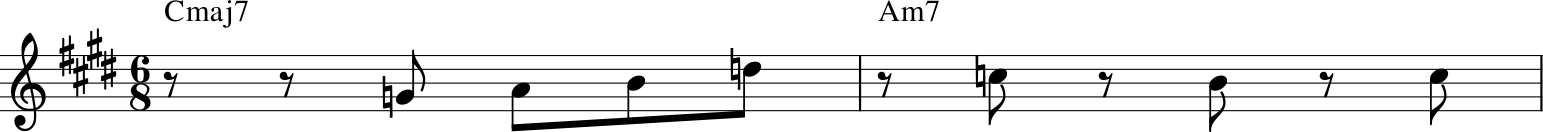

00146


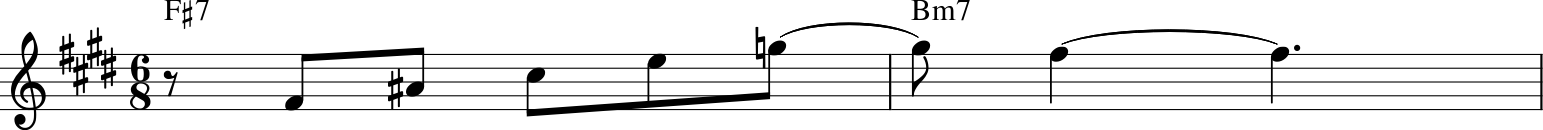

00147


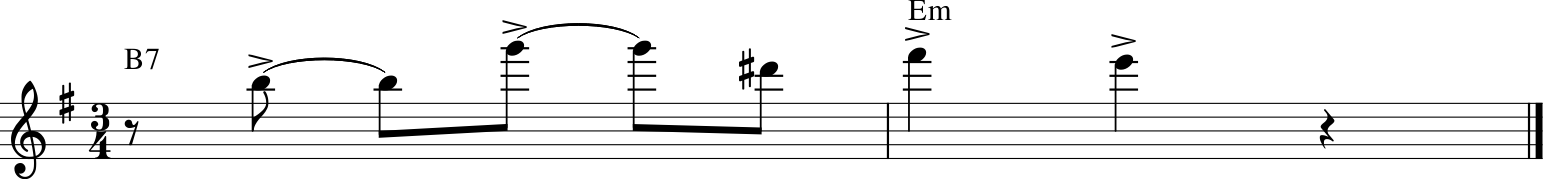

00148


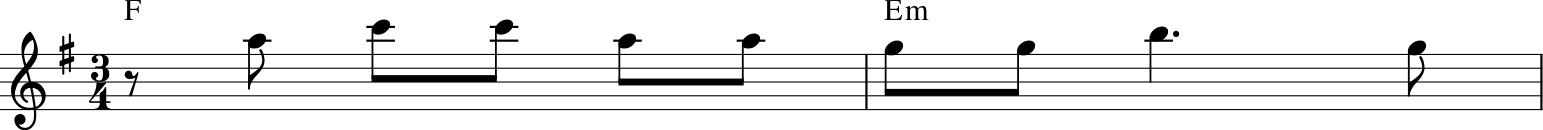

00149


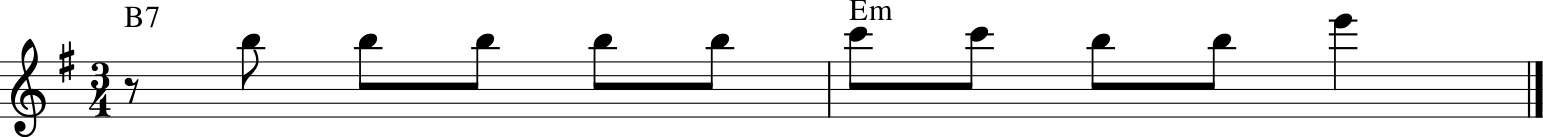

00150


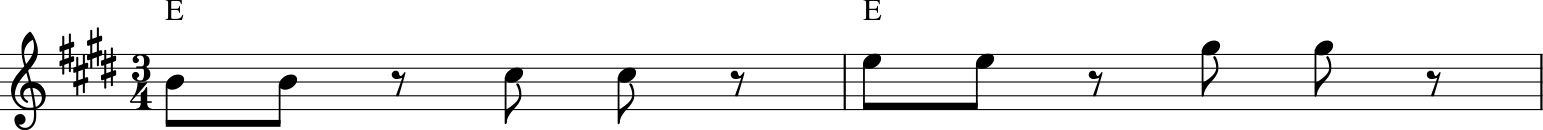

00151


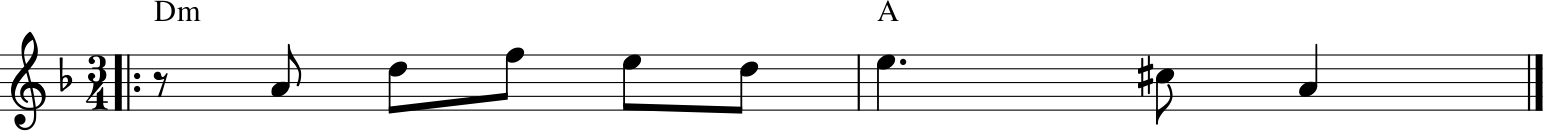

00152


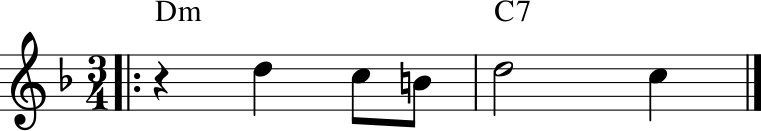

00153


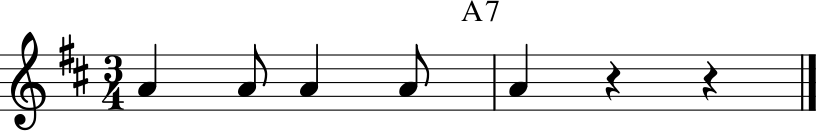

00154


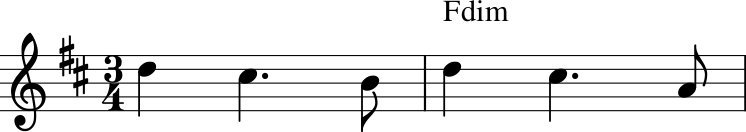

00155


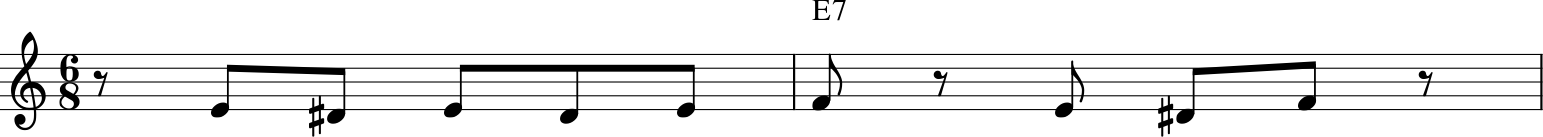

00156


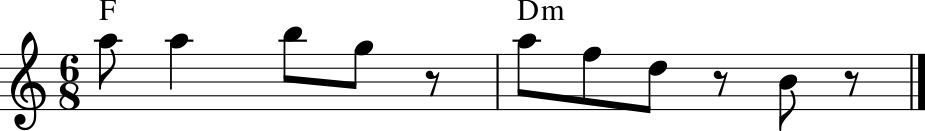

00157


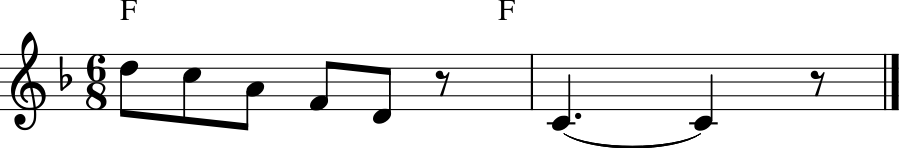

00158


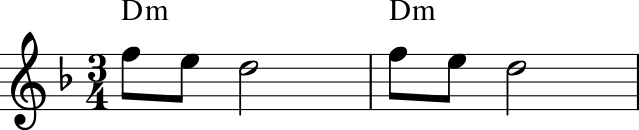

00159


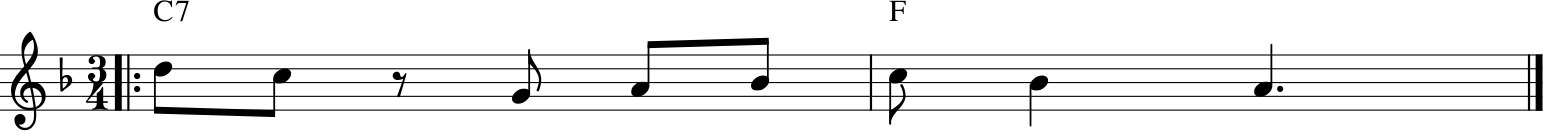

00160


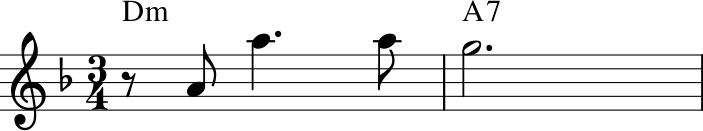

00161


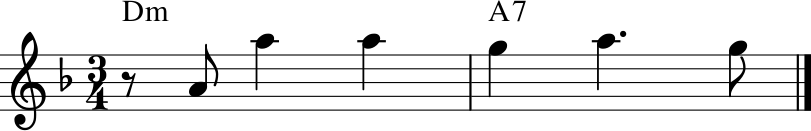

00162


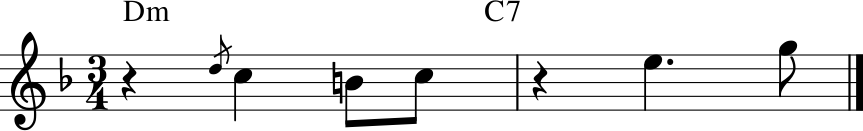

00163


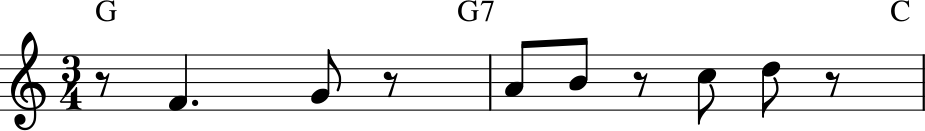

00164


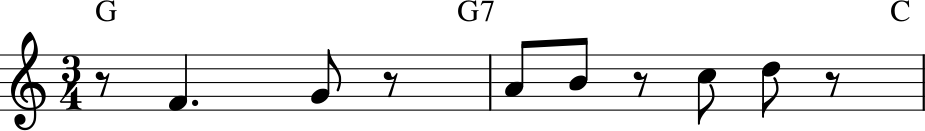

00165


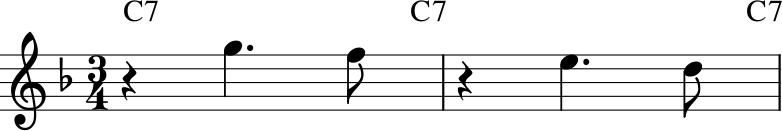

00166


In [39]:
for i in range(1,329):
    try:
        if i<10:
            name="0000"+str(i)
        if i>=10 and i<100:
            name="000"+str(i)
        if i>=100:
            name="00"+str(i)
        print(name)
        pattern = music21.corpus.getWork(name)
        pattern=music21.converter.parse(pattern)
        pattern.removeByClass(music21.metadata.Metadata)
        #pattern.removeByClass(music21.chord.ChordSymbol)
        pattern = pattern.measures(1,2)
        pattern.show()
    except:
        print('Error en ', i)

Buscar patrón en un conjunto de obras

In [1]:
import traceback
#filtred=merged_inner[(merged_inner['Género'].str.contains('Pasillo', case=False))]
filtred=merged_inner
a=pd.unique(filtred['Título'])
#a=a[60:80]
pattern = music21.corpus.getWork('00005')
pattern=music21.converter.parse(pattern)
pattern = pattern.measures(2,2)
pattern.show()
occurences=0
errores=0
for i in a:
    try:
        s = music21.corpus.getWork(i)
        source=music21.converter.parse(s)
        #source=source.measures(2,5)
        #source.measures(2,5).show()
        finder = Finder(pattern, 
        source, 
        algorithm='P1',
        threshold = 1,
        #scale = 'warped',
        #Only accepts occurrences of a particular 
        #interval_func='generic',
        #'semitones'
        pattern_window = 1,
        #Similar to 'source_window' but applies to the number of missing notes between any two matched pattern notes.
        source_window = 1
        #Limits the search space by limiting the number of intervening notes allowed between any two source notes within the occurrence
        )
        for occ in finder:
            occurences=occurences+1
            ex=occ.get_excerpt(left_padding=1, right_padding=1, color='red')
            ex.metadata.title= str(i)+ " "+ex.metadata.title
            ex.show()
    except Exception as e:
        exc_type, exc_value, exc_traceback = sys.exc_info()
        #dfExc.loc[i]=[exc_value]
        #print('Error en ', i+ " ",exc_value)
        errores=errores+1
print (occurences," Ocurrencias")
print (errores," Errores")

NameError: name 'merged_inner' is not defined

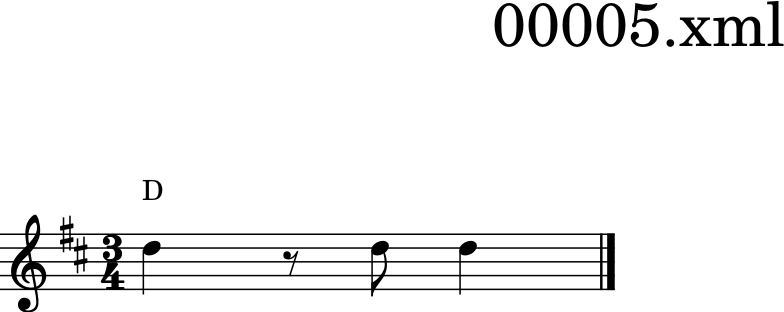

37  Ocurrencias
57  Pasillos
64  Bambucos
21  Ocurrencias de Pasillos
16  Ocurrencias de Bambucos
5  Errores


In [55]:
import traceback
#filtred=merged_inner[(merged_inner['Género'].str.contains('Pasillo', case=False))]
filtred=merged_inner
a=pd.unique(filtred['Título'])
#a=a[60:80]
pattern = music21.corpus.getWork('00005')
pattern=music21.converter.parse(pattern)
pattern = pattern.measures(2,2)
pattern.show()
occurences=0
pasillos=0
bambucos=0
occPasillos=0
occBambucos=0
errores=0
j=0
for i in a:
    if filtred.iloc[j,2]=='Pasillo':
        pasillos=pasillos+1
    if filtred.iloc[j,2]=='Bambuco':
        bambucos=bambucos+1   
    try:
        s = music21.corpus.getWork(i)
        source=music21.converter.parse(s)
        #source=source.measures(2,5)
        #source.measures(2,5).show()
        finder = Finder(pattern, 
        source, 
        algorithm='P1',
        threshold = 0.9,
        #scale = 'warped',
        #Only accepts occurrences of a particular 
        #interval_func='generic',
        #'semitones'
        pattern_window = 1,
        #Similar to 'source_window' but applies to the number of missing notes between any two matched pattern notes.
        source_window = 1
        #Limits the search space by limiting the number of intervening notes allowed between any two source notes within the occurrence
        )
        for occ in finder:
            occurences=occurences+1
            ex=occ.get_excerpt(left_padding=1, right_padding=1, color='red')
            ex.metadata.title= str(i)+ " "+ex.metadata.title
            if filtred.iloc[j,2]=='Pasillo':
                occPasillos=occPasillos+1
            if filtred.iloc[j,2]=='Bambuco':
                occBambucos=occBambucos+1  
            #ex.show()
            j=j+1
    except Exception as e:
        exc_type, exc_value, exc_traceback = sys.exc_info()
        #dfExc.loc[i]=[exc_value]
        #print('Error en ', i+ " ",exc_value)
        errores=errores+1
print (occurences," Ocurrencias")
print (pasillos," Pasillos")
print (bambucos," Bambucos")
print (occPasillos," Ocurrencias de Pasillos")
print (occBambucos," Ocurrencias de Bambucos")
print (errores," Errores")


In [87]:
def contarPatronesEnCorpus(nombre):
    #results = pd.DataFrame(columns=['patron','genero','periodo','moda'])
    import traceback
    errores=0
    try:
        #filtred=merged_inner[(merged_inner['Género'].str.contains('Pasillo', case=False))]
        filtred=merged_inner
        a=pd.unique(filtred['Título'])
        #a=a[60:80]
        pattern = music21.corpus.getWork(nombre)
        pattern=music21.converter.parse(pattern)
        #pattern = pattern.measures(2,2)
        pattern.removeByClass(music21.metadata.Metadata)
        #pattern.show()

        j=0
        for i in a:
            try:
                s = music21.corpus.getWork(i)
                source=music21.converter.parse(s)
                #source=source.measures(2,5)
                #source.measures(2,5).show()
                finder = Finder(pattern, 
                source, 
                algorithm='P1',
                threshold = 0.9,
                #scale = 'warped',
                #Only accepts occurrences of a particular 
                #interval_func='generic',
                #'semitones'
                pattern_window = 1,
                #Similar to 'source_window' but applies to the number of missing notes between any two matched pattern notes.
                source_window = 1
                #Limits the search space by limiting the number of intervening notes allowed between any two source notes within the occurrence
                )
                for occ in finder:
                    patron=int(nombre)
                    genero=filtred.iloc[j,2]
                    periodo=filtred.iloc[j,5]
                    moda=filtred.iloc[j,15]
                    ex=occ.get_excerpt(left_padding=1, right_padding=1, color='red')
                    ex.metadata.title= str(i)+ " "+ex.metadata.title
                    results2.loc[j]=[patron,genero,periodo,moda]
                    #print(patron,genero,periodo,moda)
                    #ex.show()
                j=j+1
            except Exception as e:
                exc_type, exc_value, exc_traceback = sys.exc_info()
                #dfExc.loc[i]=[exc_value]
                #print('Error en ', i+ " ",exc_value)
                errores=errores+1
        
        return results  
    except Exception as e:
        exc_type, exc_value, exc_traceback = sys.exc_info()
        #dfExc.loc[i]=[exc_value]
        print(exc_value)
        
     

In [ ]:
def contarPatronesEnCorpusResumen(nombre):
    import traceback
    occurences=0
    pasillos=0
    bambucos=0
    genero=''
    occPasillos=0
    occBambucos=0
    occPeriodo1=0
    occPeriodo2=0
    occPeriodo3=0
    errores=0
    try:
        #filtred=merged_inner[(merged_inner['Género'].str.contains('Pasillo', case=False))]
        filtred=merged_inner
        a=pd.unique(filtred['Título'])
        #a=a[60:80]
        pattern = music21.corpus.getWork(nombre)
        pattern=music21.converter.parse(pattern)
        #pattern = pattern.measures(2,2)
        pattern.removeByClass(music21.metadata.Metadata)
        #pattern.show()
        
        j=0
        for i in a:
            if filtred.iloc[j,2]=='Pasillo':
                pasillos=pasillos+1
            if filtred.iloc[j,2]=='Bambuco':
                bambucos=bambucos+1   
            try:
                s = music21.corpus.getWork(i)
                source=music21.converter.parse(s)
                #source=source.measures(2,5)
                #source.measures(2,5).show()
                finder = Finder(pattern, 
                source, 
                algorithm='P1',
                threshold = 0.9,
                #scale = 'warped',
                #Only accepts occurrences of a particular 
                #interval_func='generic',
                #'semitones'
                pattern_window = 1,
                #Similar to 'source_window' but applies to the number of missing notes between any two matched pattern notes.
                source_window = 1
                #Limits the search space by limiting the number of intervening notes allowed between any two source notes within the occurrence
                )
                for occ in finder:
                    occurences=occurences+1
                    ex=occ.get_excerpt(left_padding=1, right_padding=1, color='red')
                    ex.metadata.title= str(i)+ " "+ex.metadata.title
                    genero=filtred.iloc[j,2]
                    if filtred.iloc[j,2]=='Pasillo':
                        occPasillos=occPasillos+1
                    if filtred.iloc[j,2]=='Bambuco':
                        occBambucos=occBambucos+1  
                    if filtred.iloc[j,5]==1:
                        occPeriodo1=occPeriodo1+1
                    if filtred.iloc[j,5]==2:
                        occPeriodo2=occPeriodo2+1
                    if filtred.iloc[j,5]==3:
                        occPeriodo3=occPeriodo3+1
                    #ex.show()
                j=j+1
            except Exception as e:
                exc_type, exc_value, exc_traceback = sys.exc_info()
                #dfExc.loc[i]=[exc_value]
                #print('Error en ', i+ " ",exc_value)
                errores=errores+1
        result=[pasillos,bambucos,occPasillos,occBambucos,occPeriodo1,occPeriodo2,occPeriodo3, errores]
        return result  
    except Exception as e:
        exc_type, exc_value, exc_traceback = sys.exc_info()
        #dfExc.loc[i]=[exc_value]
        print(exc_value)
 
        
     

 ## Buscar conjunto de patrones en corpus

In [ ]:
results = pd.DataFrame(columns=['Patrón','Pasillos','Bambucos','Ocurrencias Pasillos',
'Ocurrencias Bambucos','Ocurrencias totales','Período 1','Período 2','Período 3', 'errores'])

for i in range(1,10):
    if i<10:
        name="0000"+str(i)
    if i>=10 and i<100:
        name="000"+str(i)
    if i>=100:
        name="00"+str(i)
    p=contarPatronesEnCorpusResumen(name)
    try: 
        if p!=None:
            results.loc[i]=[name,p[0],p[1],p[2],p[3],p[3]+p[4],p[4],p[5],p[6],p[7]]
    except:
        print("error")
results

In [141]:
import traceback

#Imprimir fragmento de cada archivo en el directorio
os.path.supports_unicode_filenames
patternList=sorted(os.listdir("G:/Unidades compartidas/MUCOSIMBANDES/Corpus/Archivos MusicXML/Patrones/"))
#patternList=patternList[0:40]
results2 = pd.DataFrame(columns=['patron','genero','periodo','moda'])

for file in patternList:
    if os.path.splitext(file)[1]==".xml":
        name=os.path.splitext(file)[0]
        try: 
            print("procesando ",name)
            contarPatronesEnCorpus(name)
        except Exception as e:
            exc_type, exc_value, exc_traceback = sys.exc_info()
            print(exc_value,exc_traceback)
    
results2

procesando  00001
procesando  00002
procesando  00003
procesando  00004
procesando  00005
procesando  00006
procesando  00007
procesando  00008
procesando  00009
procesando  00010
procesando  00011
procesando  00012
procesando  00013
procesando  00014
procesando  00015
procesando  00016
procesando  00017
procesando  00018
procesando  00019
procesando  00020
procesando  00021
procesando  00022
procesando  00023
procesando  00024
procesando  00025
procesando  00026
procesando  00027
procesando  00028
procesando  00029
procesando  00030
procesando  00031
procesando  00032
procesando  00033
procesando  00034
procesando  00035
procesando  00036
procesando  00037
procesando  00038
procesando  00044
procesando  00045
procesando  00046
procesando  00047
procesando  00048
procesando  00049
procesando  00050
procesando  00051
procesando  00052
procesando  00053
procesando  00054
procesando  00055
procesando  00056
procesando  00057
procesando  00058
procesando  00059
procesando  00060
procesando

patron   genero  periodo  moda
97       13  Bambuco        2   3.0
32       35  Bambuco        2   2.0
1         9  Pasillo        1   3.0
21      279  Bambuco        3   2.0
27      332  Pasillo        1   3.0
51        3  Pasillo        3   NaN
64        3  Bambuco        2   2.0
71        3  Bambuco        1   1.0
72        3  Bambuco        1   1.0
89        3  Bambuco        3   1.0
101       3  Pasillo        2   2.0
0        11  Bambuco        1   1.0
67       16  Bambuco        2   1.0
4        62  Bambuco        2   2.0
5        60  Pasillo        2   1.0
10      282  Pasillo        1   1.0
16       38  Pasillo        2   2.0
20      276  Bambuco        3   3.0
36      270  Pasillo        1   1.0
50       20  Pasillo        1   1.0
53       20  Bambuco        3   3.0
59       20  Pasillo        2   2.0
60       20  Pasillo        1   1.0
80       20  Bambuco        2   2.0
90       20  Bambuco        3   3.0
110      20  Bambuco        3   3.0
9        28  Bambuco        2   2.0
33       32  Pasillo        1   2.0
41       45  Pasillo        2   2.0
15       48  Bambuco        1   1.0
7        52  Pasillo        1   1.0
42       54  Pasillo        3   3.0
30       58  Pasillo        3   3.0
31       59  Pasillo        1   2.0
3        61  Pasillo        1   2.0
34       63  Bambuco        2   2.0
43       65  Bambuco        3   3.0
24       68  Pasillo        3   3.0
47      110  Pasillo        3   3.0
46      112  Bambuco        3   3.0
44      114  Pasillo        3   NaN
45      115  Bambuco        3   3.0
38      117  Bambuco        1   1.0
39      119  Pasillo        2   1.0
17      122  Pasillo        3   3.0
13      124  Bambuco        2   1.0
37      125  Pasillo        1   1.0
29      126  Bambuco        2   2.0
25      146  Bambuco        3   3.0
11      260  Pasillo        2   1.0
35      263  Pasillo        1   2.0
19      265  Bambuco        3   3.0
28      268  Bambuco        2   2.0
26      285  Pasillo        1   2.0
14      288  Bambuco        1   2.0
22      290  Pasillo        3   3.0
2       335  Pasillo        1   1.0
40      339  Pasillo        1   2.0

In [142]:
print('Row count is:',len(results2.index))

Row count is: 58


<AxesSubplot:xlabel='Count', ylabel='moda'>

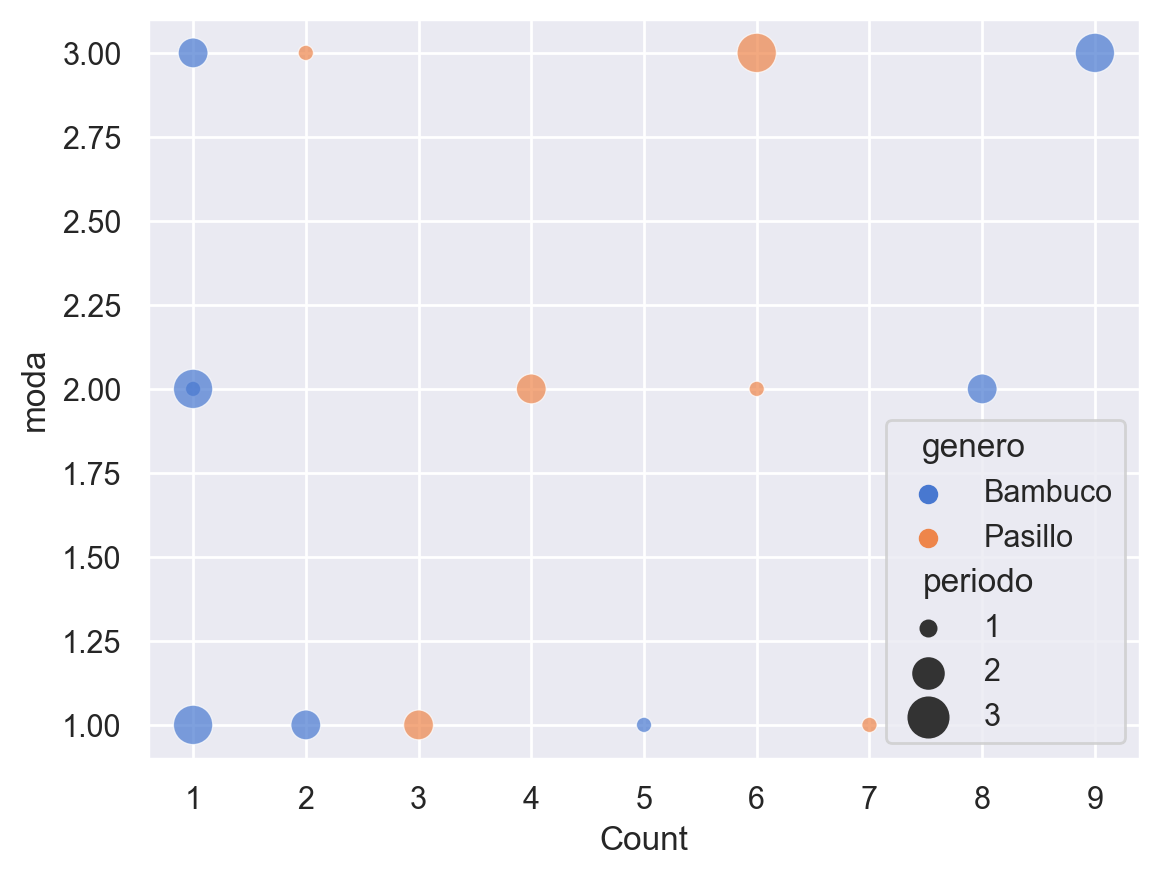

In [145]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme(style="darkgrid", palette="muted")

# Create a visualization
counts = results2.groupby(['genero','periodo','moda']).size().reset_index(name='Count')
sns.scatterplot(data=counts, x="Count", y="moda", hue="genero", size='periodo',sizes=(30, 200),alpha=0.7,legend = True)
#counts